# Thesis Plotter

## Imports and Methods

In [57]:
import ROOT
import my_library.common_analysis_tools as tools
import my_library.kinematic_cuts as cuts
import my_library.constants as constants
import my_library.gluex_style as gxs
import numpy as np
import pandas as pd
import os

In [58]:
def title_hists(hist: list, xtitle, ytitle, yoffset=None):
    for hist in hist:
        hist.GetXaxis().SetTitle(xtitle)
        hist.GetYaxis().SetTitle(ytitle)
        if yoffset:
            hist.GetYaxis().SetTitleOffset(yoffset)

    

# Make Plots for My Thesis 

In [59]:
ROOT.EnableImplicitMT()
os.nice(18)
ROOT.TGaxis.SetMaxDigits(4)

In [60]:
df_pipkmks = tools.get_dataframe('pipkmks', 'gluex1', 'data', filtered=False)
df_pimkpks = tools.get_dataframe('pimkpks', 'gluex1', 'data', filtered=False)

df_pipkmks = df_pipkmks.Define('kmpip_m2', 'kmpip_m * kmpip_m').Define('kspip_m2', 'kspip_m * kspip_m')
df_pimkpks = df_pimkpks.Define('kppim_m2', 'kppim_m * kppim_m').Define('kspim_m2', 'kspim_m * kspim_m')

## Kinfit $\chi^2/ndf$ and Kinfit Confidence Level

In [61]:
kcl_bins, kcl_xlow, kcl_xhigh = 100, 1e-12, 1e-3
x2ndf_bins, x2ndf_xlow, x2ndf_xhigh = 100, 0, 10

hist_kcl_pipkmks = df_pipkmks.Histo1D(('h_kcl_pipkmks', 'KCL for #pi^{+}K^{-}K_{S}^{0}', kcl_bins, kcl_xlow, kcl_xhigh), 'kinfit_cl')
hist_kcl_pimkpks = df_pimkpks.Histo1D(('h_kcl_pimkpks', 'KCL for #pi^{-}K^{+}K_{S}^{0}', kcl_bins, kcl_xlow, kcl_xhigh), 'kinfit_cl')

hist_kcl_pipkmks_cut = df_pipkmks.Filter(cuts.KINFIT_CL_CUT).Histo1D(('h_kcl_pipkmks_cut', 'KCL for #pi^{+}K^{-}K_{S}^{0}', kcl_bins, kcl_xlow, kcl_xhigh), 'kinfit_cl')
hist_kcl_pimkpks_cut = df_pimkpks.Filter(cuts.KINFIT_CL_CUT).Histo1D(('h_kcl_pimkpks_cut', 'KCL for #pi^{-}K^{+}K_{S}^{0}', kcl_bins, kcl_xlow, kcl_xhigh), 'kinfit_cl')

hist_x2ndf_pipkmks = df_pipkmks.Histo1D(('h_x2ndf_pipkmks', 'x2ndf for #pi^{+}K^{-}K_{S}^{0}', x2ndf_bins, x2ndf_xlow, x2ndf_xhigh), "chi2ndf")
hist_x2ndf_pimkpks = df_pimkpks.Histo1D(('h_x2ndf_pimkpks', 'x2ndf for #pi^{-}K^{+}K_{S}^{0}', x2ndf_bins, x2ndf_xlow, x2ndf_xhigh), "chi2ndf")


In [62]:
df_pipkmks = df_pipkmks.Filter(cuts.KINFIT_CL_CUT)
df_pimkpks = df_pimkpks.Filter(cuts.KINFIT_CL_CUT)

## $M^{2}_{x}(pKK\pi)$

In [63]:
mx2_all_bins, mx2_all_xlow, mx2_all_xhigh = 1000, -0.1, 0.1
hist_mx2all_pipkmks = df_pipkmks.Histo1D(('mx2_all_pipkmks', 'mx2_all_pipkmks', mx2_all_bins, mx2_all_xlow, mx2_all_xhigh ), 'mx2_ppipkmks')
hist_mx2all_pimkpks = df_pimkpks.Histo1D(('mx2_all_pimkpks', 'mx2_all_pimkpks', mx2_all_bins, mx2_all_xlow, mx2_all_xhigh ), 'mx2_ppimkpks')

hist_mx2all_pipkmks_cut = df_pipkmks.Filter(cuts.MX2_PPIPKMKS_CUT).Histo1D(('mx2_all_pipkmks_cut', 'mx2_all_pipkmks_cut', mx2_all_bins, mx2_all_xlow, mx2_all_xhigh ), 'mx2_ppipkmks')
hist_mx2all_pimkpks_cut = df_pimkpks.Filter(cuts.MX2_PPIMKPKS_CUT).Histo1D(('mx2_all_pimkpks_cut', 'mx2_all_pimkpks_cut', mx2_all_bins, mx2_all_xlow, mx2_all_xhigh ), 'mx2_ppimkpks')

In [64]:
df_pipkmks = df_pipkmks.Filter(cuts.MX2_PPIPKMKS_CUT)
df_pimkpks = df_pimkpks.Filter(cuts.MX2_PPIMKPKS_CUT)


## $\vec{p}(p')$

In [65]:
pp_bins, pp_xlow, pp_xhigh = 200, 0, 1.9
hist_trange_pipkmks = df_pipkmks.Histo1D(('trange_pipkmks', 'trange_pipkmks', pp_bins, pp_xlow, pp_xhigh ), 'mand_t')
hist_trange_pimkpks = df_pimkpks.Histo1D(('trange_pimkpks', 'trange_pimkpks', pp_bins, pp_xlow, pp_xhigh ), 'mand_t')
hist_trange_pipkmks_cut = df_pipkmks.Filter(cuts.P_P_CUT).Histo1D(('trange_pipkmks_cut', 'trange_pipkmks_cut', pp_bins, pp_xlow, pp_xhigh ), 'mand_t')
hist_trange_pimkpks_cut = df_pimkpks.Filter(cuts.P_P_CUT).Histo1D(('trange_pimkpks_cut', 'trange_pimkpks_cut', pp_bins, pp_xlow, pp_xhigh ), 'mand_t')

In [66]:
df_pipkmks = df_pipkmks.Filter(cuts.P_P_CUT)
df_pimkpks = df_pimkpks.Filter(cuts.P_P_CUT)

## $K_s$ Pathlength $\Delta r/\sigma_r$

In [67]:
ks_bins, ks_xlow, ks_xhigh = 1000, 0.35, 0.65

hist_ks_pipkmks = df_pipkmks.Histo1D(('ks_pipkmks', 'ks_pipkmks', ks_bins, ks_xlow, ks_xhigh ), 'ks_m')
hist_ks_pimkpks = df_pimkpks.Histo1D(('ks_pimkpks', 'ks_pimkpks', ks_bins, ks_xlow, ks_xhigh ), 'ks_m')

hist_ks_pipkmks_cut = df_pipkmks.Filter(cuts.KS_PATHLENGTH_CUT).Histo1D(('ks_pipkmks_cut', 'ks_pipkmks_cut', ks_bins, ks_xlow, ks_xhigh ), 'ks_m')
hist_ks_pimkpks_cut = df_pimkpks.Filter(cuts.KS_PATHLENGTH_CUT).Histo1D(('ks_pimkpks_cut', 'ks_pimkpks_cut', ks_bins, ks_xlow, ks_xhigh ), 'ks_m')

## $K_s$ Mass Cut

In [68]:
hist_ks_pipkmks_cut_2 = df_pipkmks.Filter(cuts.KS_PATHLENGTH_CUT).Filter(cuts.KS_MASS_CUT).Histo1D(('ks_pipkmks_cut_2', 'ks_pipkmks_cut_2', ks_bins, ks_xlow, ks_xhigh ), 'ks_m')
hist_ks_pimkpks_cut_2 = df_pimkpks.Filter(cuts.KS_PATHLENGTH_CUT).Filter(cuts.KS_MASS_CUT).Histo1D(('ks_pimkpks_cut_2', 'ks_pimkpks_cut_2', ks_bins, ks_xlow, ks_xhigh ), 'ks_m')

## $\Delta$ and $N^*$

In [69]:
df_pipkmks = df_pipkmks.Filter(cuts.KS_PATHLENGTH_CUT).Filter(cuts.KS_MASS_CUT)
df_pimkpks = df_pimkpks.Filter(cuts.KS_PATHLENGTH_CUT).Filter(cuts.KS_MASS_CUT)

In [70]:
ppi_bins, ppi_xlow, ppi_xhigh = 200, 1.0, 3.0
hist_ppi_pipkmks = df_pipkmks.Histo1D(('ppi_pipkmks', 'ppi_pipkmks', ppi_bins, ppi_xlow, ppi_xhigh ), 'ppip_m')
hist_ppi_pimkpks = df_pimkpks.Histo1D(('ppi_pimkpks', 'ppi_pimkpks', ppi_bins, ppi_xlow, ppi_xhigh ), 'ppim_m')
hist_ppi_pipkmks_cut = df_pipkmks.Filter(cuts.PPIP_MASS_CUT).Histo1D(('ppi_pipkmks_cut', 'ppi_pipkmks_cut', ppi_bins, ppi_xlow, ppi_xhigh ), 'ppip_m')
hist_ppi_pimkpks_cut = df_pimkpks.Filter(cuts.PPIM_MASS_CUT).Histo1D(('ppi_pimkpks_cut', 'ppi_pimkpks_cut', ppi_bins, ppi_xlow, ppi_xhigh ), 'ppim_m')

## $\Lambda/\Sigma$

In [71]:
df_pipkmks = df_pipkmks.Filter(cuts.PPIP_MASS_CUT)
df_pimkpks = df_pimkpks.Filter(cuts.PPIM_MASS_CUT)

In [72]:
kp_bins, kp_xlow, kp_xhigh = 100, 1.2, 3.5
hist_pks_pipkmks = df_pipkmks.Histo1D(('pks_pipkmks', 'pks_pipkmks', kp_bins, kp_xlow, kp_xhigh ), 'ksp_m')
hist_pks_pimkpks = df_pimkpks.Histo1D(('pks_pimkpks', 'pks_pimkpks', kp_bins, kp_xlow, kp_xhigh ), 'ksp_m')
hist_pks_pipkmks_cut = df_pipkmks.Filter(cuts.KSP_MASS_CUT).Histo1D(('pks_pipkmks_cut', 'pks_pipkmks_cut', kp_bins, kp_xlow, kp_xhigh ), 'ksp_m')
hist_pks_pimkpks_cut = df_pimkpks.Filter(cuts.KSP_MASS_CUT).Histo1D(('pks_pimkpks_cut', 'pks_pimkpks_cut', kp_bins, kp_xlow, kp_xhigh ), 'ksp_m')

hist_pk_pipkmks = df_pipkmks.Histo1D(('pk_pipkmks', 'pk_pipkmks', kp_bins, kp_xlow, kp_xhigh ), 'kmp_m')
hist_pk_pimkpks = df_pimkpks.Histo1D(('pk_pimkpks', 'pk_pimkpks', kp_bins, kp_xlow, kp_xhigh ), 'kpp_m')
hist_pk_pipkmks_cut = df_pipkmks.Filter(cuts.KMP_MASS_CUT).Histo1D(('pk_pipkmks_cut', 'pk_pipkmks_cut', kp_bins, kp_xlow, kp_xhigh ), 'kmp_m')
hist_pk_pimkpks_cut = df_pimkpks.Filter(cuts.KPP_MASS_CUT).Histo1D(('pk_pimkpks_cut', 'pk_pimkpks_cut', kp_bins, kp_xlow, kp_xhigh ), 'kpp_m')

## $KK\pi$ After Kinematics Cuts and Before $K^*$ Selection 

In [73]:
df_pipkmks = df_pipkmks.Filter(cuts.KSP_MASS_CUT)
df_pimkpks = df_pimkpks.Filter(cuts.KSP_MASS_CUT)

df_pipkmks = df_pipkmks.Filter(cuts.KMP_MASS_CUT)
df_pimkpks = df_pimkpks.Filter(cuts.KPP_MASS_CUT)

In [74]:
kkpi_bins, kkpi_xlow, kkpi_xhigh = 70, 1.1, 1.8

hist_kkpi_no_kstar_pipkmks = df_pipkmks.Histo1D(('kkpi_no_kstar_pipkmks', 'kkpi_no_kstar_pipkmks', kkpi_bins, kkpi_xlow, kkpi_xhigh ), 'pipkmks_m')
hist_kkpi_no_kstar_pimkpks = df_pimkpks.Histo1D(('kkpi_no_kstar_pimkpks', 'kkpi_no_kstar_pimkpks', kkpi_bins, kkpi_xlow, kkpi_xhigh ), 'pimkpks_m')

## $K\pi$ Dalitz Plots

In [75]:
kpi_bins, kpi_low, kpi_high = 100, 0.2, 1.2

hist_kstar_dalitz_pipkmks_1285 = df_pipkmks.Filter('(pipkmks_m >= 1.22) && (pipkmks_m < 1.34)').Histo2D(('kstar_dalitz_pipkmks_1285', 'Dalitz Plot for M^2(#K_{s}\pi^{+}) vs M^2(#K^{-}\pi^{+})', kpi_bins, kpi_low, kpi_high, kpi_bins, kpi_low, kpi_high), 'kspip_m2', 'kmpip_m2')
hist_kstar_dalitz_pipkmks_1400 = df_pipkmks.Filter('(pipkmks_m >= 1.34) && (pipkmks_m < 1.5)').Histo2D(('kstar_dalitz_pipkmks_1400', 'Dalitz Plot for M^2(#K_{s}\pi^{+}) vs M^2(#K^{-}\pi^{+})', kpi_bins, kpi_low, kpi_high, kpi_bins, kpi_low, kpi_high), 'kspip_m2', 'kmpip_m2')
hist_kstar_dalitz_pipkmks_1500 = df_pipkmks.Filter('(pipkmks_m >= 1.5)').Histo2D(('kstar_dalitz_pipkmks_1500', 'Dalitz Plot for M^2(#K_{s}\pi^{+}) vs M^2(#K^{-}\pi^{+})', kpi_bins, kpi_low, kpi_high, kpi_bins, kpi_low, kpi_high), 'kspip_m2', 'kmpip_m2')
hist_kstar_dalitz_pimkpks_1285 = df_pimkpks.Filter('(pimkpks_m >= 1.22) && (pimkpks_m < 1.34)').Histo2D(('kstar_dalitz_pimkpks_1285', 'Dalitz Plot for M^2(#K_{s}\pi^{-}) vs M^2(#K^{+}\pi^{-})', kpi_bins, kpi_low, kpi_high, kpi_bins, kpi_low, kpi_high), 'kspim_m2', 'kppim_m2')
hist_kstar_dalitz_pimkpks_1400 = df_pimkpks.Filter('(pimkpks_m >= 1.34) && (pimkpks_m < 1.5)').Histo2D(('kstar_dalitz_pimkpks_1400', 'Dalitz Plot for M^2(#K_{s}\pi^{-}) vs M^2(#K^{+}\pi^{-})', kpi_bins, kpi_low, kpi_high, kpi_bins, kpi_low, kpi_high), 'kspim_m2', 'kppim_m2')
hist_kstar_dalitz_pimkpks_1500 = df_pimkpks.Filter('(pimkpks_m >= 1.5)').Histo2D(('kstar_dalitz_pimkpks_1500', 'Dalitz Plot for M^2(#K_{s}\pi^{-}) vs M^2(#K^{+}\pi^{-})', kpi_bins, kpi_low, kpi_high, kpi_bins, kpi_low, kpi_high), 'kspim_m2', 'kppim_m2')

## $K^*$ Plots

In [76]:
kstar_bins, kstar_low, kstar_high = 100, 0.5, 1.5

hist_kstar_zero_pipkmks = df_pipkmks.Histo1D(('kstar_zero_pipkmks', ';M(K^{-}#pi^{+}) [GeV]', kstar_bins, kstar_low, kstar_high), 'kmpip_m')
hist_kstar_zero_pimkpks = df_pimkpks.Histo1D(('kstar_zero_pimkpks', ';M(K^{+}#pi^{-}) [GeV]', kstar_bins, kstar_low, kstar_high), 'kppim_m')

hist_kstar_zero_cut_pipkmks = df_pipkmks.Filter(cuts.KSTAR_ZERO_CUT_PIPKMKS).Histo1D(('kstar_zero_cut_pipkmks', ';M(K^{-}#pi^{+}) [GeV]', kstar_bins, kstar_low, kstar_high), 'kmpip_m')
hist_kstar_zero_cut_pimkpks = df_pimkpks.Filter(cuts.KSTAR_ZERO_CUT_PIMKPKS).Histo1D(('kstar_zero_cut_pimkpks', ';M(K^{+}#pi^{-}) [GeV]', kstar_bins, kstar_low, kstar_high), 'kppim_m')

hist_kstar_charged_pipkmks = df_pipkmks.Histo1D(('kstar_charged_pipkmks', 'kst;M(K_{s}#pi^{+}) [GeV]', kstar_bins, kstar_low, kstar_high), 'kspip_m')
hist_kstar_charged_pimkpks = df_pimkpks.Histo1D(('kstar_charged_pimkpks', 'kst;M(K_{s}#pi^{-}) [GeV]', kstar_bins, kstar_low, kstar_high), 'kspim_m')

hist_kstar_charged_cut_pipkmks = df_pipkmks.Filter(cuts.KSTAR_PLUS_CUT).Histo1D(('kstar_charged_cut_pipkmks', 'kst;M(K_{s}#pi^{+}) [GeV]', kstar_bins, kstar_low, kstar_high), 'kspip_m')
hist_kstar_charged_cut_pimkpks = df_pimkpks.Filter(cuts.KSTAR_MINUS_CUT).Histo1D(('kstar_charged_cut_pimkpks', 'kst;M(K_{s}#pi^{-}) [GeV]', kstar_bins, kstar_low, kstar_high), 'kspim_m')

## $K^*$ Rejection

In [77]:
hist_kkpi_kstar_rejected_pipkmks = df_pipkmks.Filter(cuts.KSTAR_ALL_CUT_PIPKMKS).Histo1D(('kkpi_kstar_rejected_pipkmks', 'kkpi_kstar_rejected_pipkmks', kkpi_bins, kkpi_xlow, kkpi_xhigh ), 'pipkmks_m')
hist_kkpi_kstar_rejected_pimkpks = df_pimkpks.Filter(cuts.KSTAR_ALL_CUT_PIMKPKS).Histo1D(('kkpi_kstar_rejected_pimkpks', 'kkpi_kstar_rejected_pimkpks', kkpi_bins, kkpi_xlow, kkpi_xhigh ), 'pimkpks_m')

hist_kkpi_kstar_neutral_selected_pipkmks = df_pipkmks.Filter(cuts.KEEP_NEUTRAL_REJECT_CHARGED_PIPKMKS).Histo1D(('kkpi_kstar_neutral_selected', 'kkpi_kstar_neutral_selected', kkpi_bins, kkpi_xlow, kkpi_xhigh ), 'pipkmks_m')
hist_kkpi_kstar_neutral_selected_pimkpks = df_pimkpks.Filter(cuts.KEEP_NEUTRAL_REJECT_CHARGED_PIMKPKS).Histo1D(('kkpi_kstar_neutral_selected', 'kkpi_kstar_neutral_selected', kkpi_bins, kkpi_xlow, kkpi_xhigh ), 'pimkpks_m')

hist_kkpi_kstar_charged_selected_pipkmks = df_pipkmks.Filter(cuts.KEEP_CHARGED_REJECT_NEUTRAL_PIPKMKS).Histo1D(('kkpi_kstar_charged_selected_pipkmks', 'kkpi_kstar_charged_selected_pipkmks', kkpi_bins, kkpi_xlow, kkpi_xhigh ), 'pipkmks_m')
hist_kkpi_kstar_charged_selected_pimkpks = df_pimkpks.Filter(cuts.KEEP_CHARGED_REJECT_NEUTRAL_PIMKPKS).Histo1D(('kkpi_kstar_charged_selected_pimkpks', 'kkpi_kstar_charged_selected_pimkpks', kkpi_bins, kkpi_xlow, kkpi_xhigh ), 'pimkpks_m')

## Phasespace cut efficiency

In [78]:
df_pipkmks_phasespace = tools.get_dataframe('pipkmks', 'spring', 'phasespace')
hist_ps_kkpi_before = df_pipkmks_phasespace.Histo1D(('ps_kkpi_before', 'ps_kkpi_before', kkpi_bins, kkpi_xlow, kkpi_xhigh ), 'pipkmks_m')
df_pipkmks_phasespace = df_pipkmks_phasespace.Filter(cuts.KSTAR_ALL_CUT_PIPKMKS)
hist_ps_kkpi_after = df_pipkmks_phasespace.Histo1D(('ps_kkpi_after', 'ps_kkpi_after', kkpi_bins, kkpi_xlow, kkpi_xhigh ), 'pipkmks_m')


## $K^*$ cut efficiency from thrown MC

In [79]:
df_1 = pd.read_csv('/work/halld/home/viducic/data/ps_dalitz/kstar_cut_efficiency_1.0.csv')
mass_bin_center = df_1["mass_bin_center"].to_numpy()
kstar_cut_efficiency = df_1["kstar_cut_efficiency"].to_numpy()
rdf_1 = ROOT.RDF.MakeNumpyDataFrame({"mass_bin_center": mass_bin_center, "kstar_cut_efficiency": kstar_cut_efficiency})
graph = rdf_1.Graph("mass_bin_center", "kstar_cut_efficiency")


## $KK\pi$ after efficiency correction

In [80]:
hist_eff_uncorrected_pipkmks = hist_kkpi_kstar_rejected_pipkmks.Clone("pipkmks_uncor")
hist_eff_uncorrected_pimkpks = hist_kkpi_kstar_rejected_pimkpks.Clone("pimkpks_uncor")
hist_eff_corrected_pipkmks = tools.correct_data_hist_for_kstar_efficiency(hist_eff_uncorrected_pipkmks)
hist_eff_corrected_pimkpks = tools.correct_data_hist_for_kstar_efficiency(hist_eff_uncorrected_pimkpks)


## Acceptance 

In [81]:
pipkmks_eff = []
pimkpks_eff = []

for e in range(8, 12):
    for t in range(1, 8):
        pipkmks_acceptance = tools.get_binned_gluex1_signal_acceptance('pipkmks', e, t)
        pimkpks_acceptance = tools.get_binned_gluex1_signal_acceptance('pimkpks', e, t)

        pipkmks_eff.append((pipkmks_acceptance, e, t))
        pimkpks_eff.append((pimkpks_acceptance, e, t))

# Draw Plots

In [82]:
path_to_plots = '/work/halld/home/viducic/plots/thesis/'

In [83]:
c = ROOT.TCanvas('c', 'c', 800, 800)

Warning in <TCanvas::Constructor>: Deleting canvas with same name: c


## Kinfit $\chi^2/ndf$ and Kinfit Confidence Level

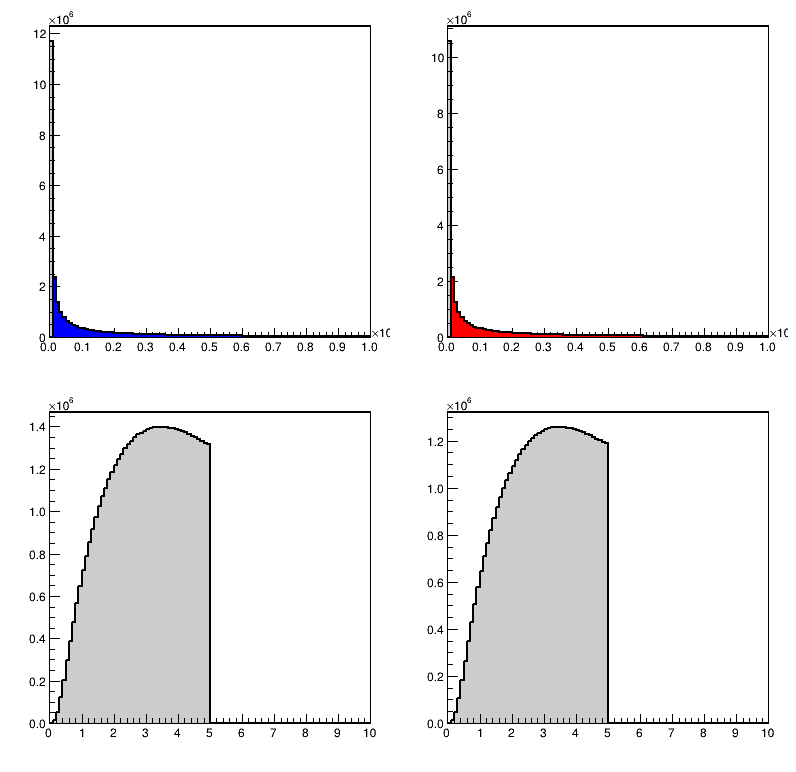

In [84]:
c.Clear()
c.Divide(2,2)

c.cd(1)
hist_kcl_pipkmks.Draw()
hist_kcl_pipkmks_cut.SetFillColor(ROOT.kBlue)
hist_kcl_pipkmks_cut.Draw('same')
c.cd(2)
hist_kcl_pimkpks.Draw()
hist_kcl_pimkpks_cut.SetFillColor(ROOT.kRed)
hist_kcl_pimkpks_cut.Draw('same')
c.cd(3)
hist_x2ndf_pipkmks.Draw()
c.cd(4)
hist_x2ndf_pimkpks.Draw()
c.Draw()

## $M^{2}_{x}(pKK\pi)$

0.0170328768674808


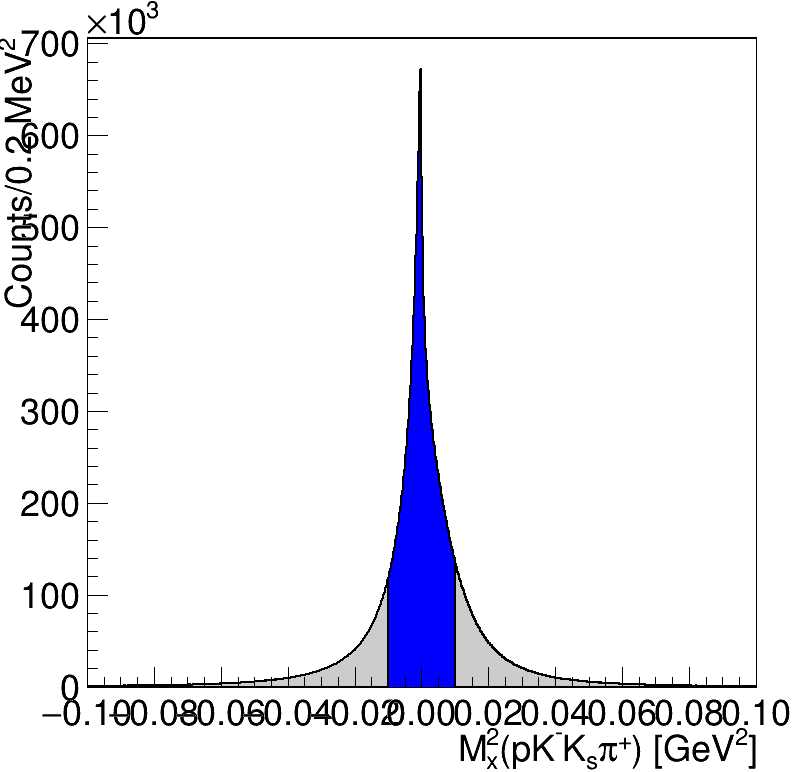

In [85]:
c.Clear()
# c.Divide(2,1)

# mx2all_xtitle = 'M_{x}^{2}(pKK#pi) [GeV^{2}]'
hist_mx2all_pipkmks.GetXaxis().SetTitle('M_{x}^{2}(pK^{-}K_{s}#pi^{+}) [GeV^{2}]')
# mx2all_ytitle = f'Counts/{1000*(mx2_all_xhigh-mx2_all_xlow)/mx2_all_bins:.3f}' + ' MeV^{2}'
hist_mx2all_pipkmks.GetYaxis().SetTitle(f'Counts/{1000*(mx2_all_xhigh-mx2_all_xlow)/mx2_all_bins:.1f}' +  ' MeV^{2}')
hist_mx2all_pipkmks_cut.SetFillColor(ROOT.kBlue)
hist_mx2all_pipkmks.GetYaxis().SetTitleOffset(1.15)
# hist_mx2all_pipkmks.GetXaxis().SetTitleSize(0.05)
hist_mx2all_pipkmks.GetXaxis().SetTitleOffset(1.0)
hist_mx2all_pipkmks.GetYaxis().SetTitleSize(0.05)
hist_mx2all_pipkmks.GetYaxis().SetLabelSize(0.05)
hist_mx2all_pipkmks.GetXaxis().SetLabelSize(0.05)
hist_mx2all_pipkmks.GetXaxis().SetTitleSize(0.05)


# hist_mx2all_pimkpks.GetXaxis().SetTitle('M_{x}^{2}(pK^{+}K_{s}#pi^{-}) [GeV^{2}]')
# hist_mx2all_pimkpks.GetYaxis().SetTitle(f'Counts/{1000*(mx2_all_xhigh-mx2_all_xlow)/mx2_all_bins:.1f}' +  ' MeV^{2}')
# hist_mx2all_pimkpks_cut.SetFillColor(ROOT.kRed)
# hist_mx2all_pimkpks.GetYaxis().SetTitleOffset(1.55)
# hist_mx2all_pimkpks.GetYaxis().SetTitleSize(0.05)
# hist_mx2all_pimkpks.GetYaxis().SetLabelSize(0.05)
# hist_mx2all_pimkpks.GetXaxis().SetLabelSize(0.05)
# hist_mx2all_pimkpks.GetXaxis().SetTitleSize(0.05)

# title_hists([hist_mx2all_pimkpks, hist_mx2all_pipkmks], mx2all_xtitle, mx2all_ytitle)
# title_hists([hist_mx2all_pimkpks_cut, hist_mx2all_pipkmks_cut], mx2all_xtitle, mx2all_ytitle)
c.cd(1)
hist_mx2all_pipkmks.Draw()
hist_mx2all_pipkmks_cut.Draw('same')
# c.cd(2)
# hist_mx2all_pimkpks.Draw()
# hist_mx2all_pimkpks_cut.Draw('same')
print(hist_mx2all_pipkmks.GetStdDev())
ROOT.gPad.RedrawAxis()

c.Draw()


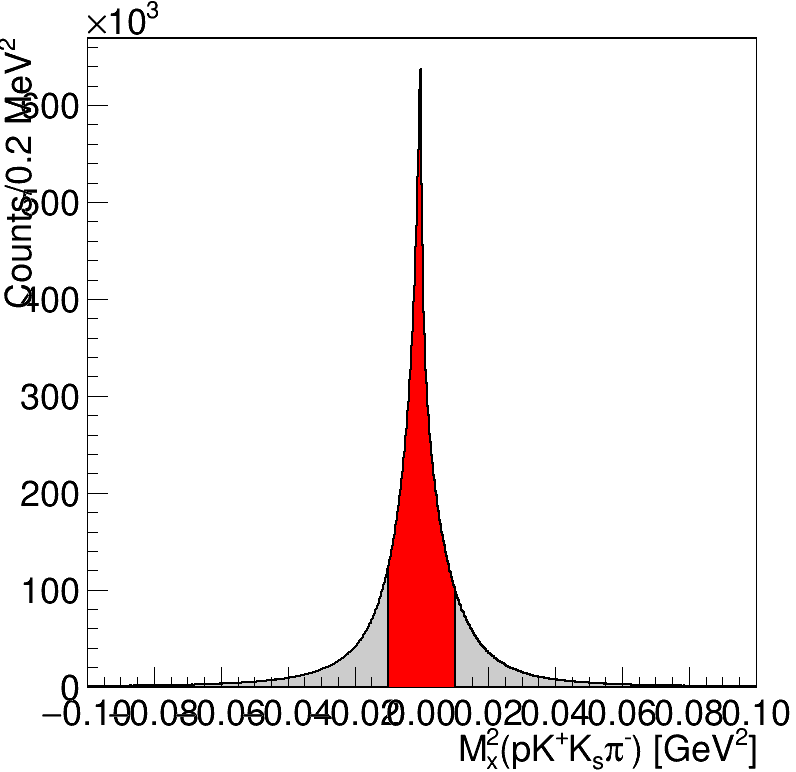

In [86]:
c.Clear()
# c.Divide(2,1)

# # mx2all_xtitle = 'M_{x}^{2}(pKK#pi) [GeV^{2}]'
# hist_mx2all_pipkmks.GetXaxis().SetTitle('M_{x}^{2}(pK^{-}K_{s}#pi^{+}) [GeV^{2}]')
# # mx2all_ytitle = f'Counts/{1000*(mx2_all_xhigh-mx2_all_xlow)/mx2_all_bins:.3f}' + ' MeV^{2}'
# hist_mx2all_pipkmks.GetYaxis().SetTitle(f'Counts/{1000*(mx2_all_xhigh-mx2_all_xlow)/mx2_all_bins:.1f}' +  ' MeV^{2}')
# hist_mx2all_pipkmks_cut.SetFillColor(ROOT.kBlue)
# hist_mx2all_pipkmks.GetYaxis().SetTitleOffset(1.4)
# # hist_mx2all_pipkmks.GetXaxis().SetTitleSize(0.05)
# hist_mx2all_pipkmks.GetXaxis().SetTitleOffset(1.1)


hist_mx2all_pimkpks.GetXaxis().SetTitle('M_{x}^{2}(pK^{+}K_{s}#pi^{-}) [GeV^{2}]')
hist_mx2all_pimkpks.GetYaxis().SetTitle(f'Counts/{1000*(mx2_all_xhigh-mx2_all_xlow)/mx2_all_bins:.1f}' +  ' MeV^{2}')
hist_mx2all_pimkpks_cut.SetFillColor(ROOT.kRed)
hist_mx2all_pimkpks.GetYaxis().SetTitleOffset(1.15)
hist_mx2all_pimkpks.GetXaxis().SetTitleOffset(1.0)
hist_mx2all_pimkpks.GetYaxis().SetTitleSize(0.05)
hist_mx2all_pimkpks.GetYaxis().SetLabelSize(0.05)
hist_mx2all_pimkpks.GetXaxis().SetLabelSize(0.05)
hist_mx2all_pimkpks.GetXaxis().SetTitleSize(0.05)

# title_hists([hist_mx2all_pimkpks, hist_mx2all_pipkmks], mx2all_xtitle, mx2all_ytitle)
# title_hists([hist_mx2all_pimkpks_cut, hist_mx2all_pipkmks_cut], mx2all_xtitle, mx2all_ytitle)
# c.cd(1)
# hist_mx2all_pipkmks.Draw()
# hist_mx2all_pipkmks_cut.Draw('same')
# c.cd(2)
hist_mx2all_pimkpks.Draw()
hist_mx2all_pimkpks_cut.Draw('same')
# print(hist_mx2all_pipkmks.GetStdDev())

c.Draw()

## $\vec{p}(p')$

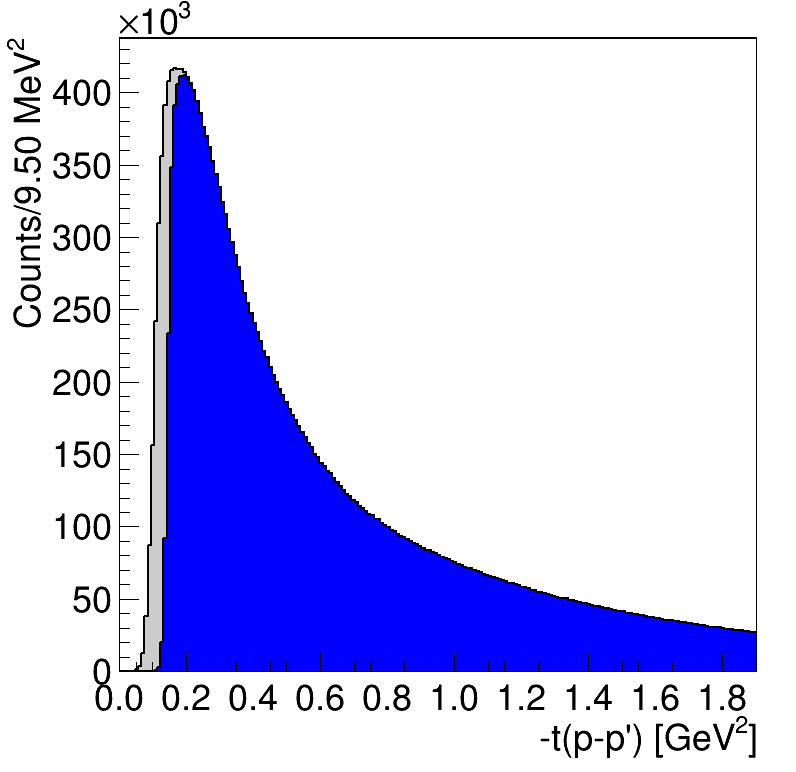

In [87]:
c.Clear()
pad = c.cd()
pad.SetLeftMargin(0.15)
pad.SetBottomMargin(0.13)
pp_xtitle = "-t(p-p') [GeV^{2}]"
pp_ytitle = f'Counts/{1000*(pp_xhigh-pp_xlow)/pp_bins:.2f}' + ' MeV^{2}'

title_hists([hist_trange_pipkmks, hist_trange_pipkmks_cut], pp_xtitle, pp_ytitle, yoffset=1.4)

hist_trange_pipkmks_cut.SetFillColor(ROOT.kBlue)
hist_trange_pipkmks.GetXaxis().SetTitleOffset(1.05)
hist_trange_pipkmks.GetYaxis().SetTitleOffset(1.5)
hist_trange_pipkmks.GetXaxis().SetTitleSize(0.05)
hist_trange_pipkmks.GetXaxis().SetLabelSize(0.05)
hist_trange_pipkmks.GetYaxis().SetLabelSize(0.05)
hist_trange_pipkmks.GetYaxis().SetTitleSize(0.05)

hist_trange_pipkmks.Draw()
hist_trange_pipkmks_cut.Draw('same')
c.Draw()
ROOT.gPad.RedrawAxis()



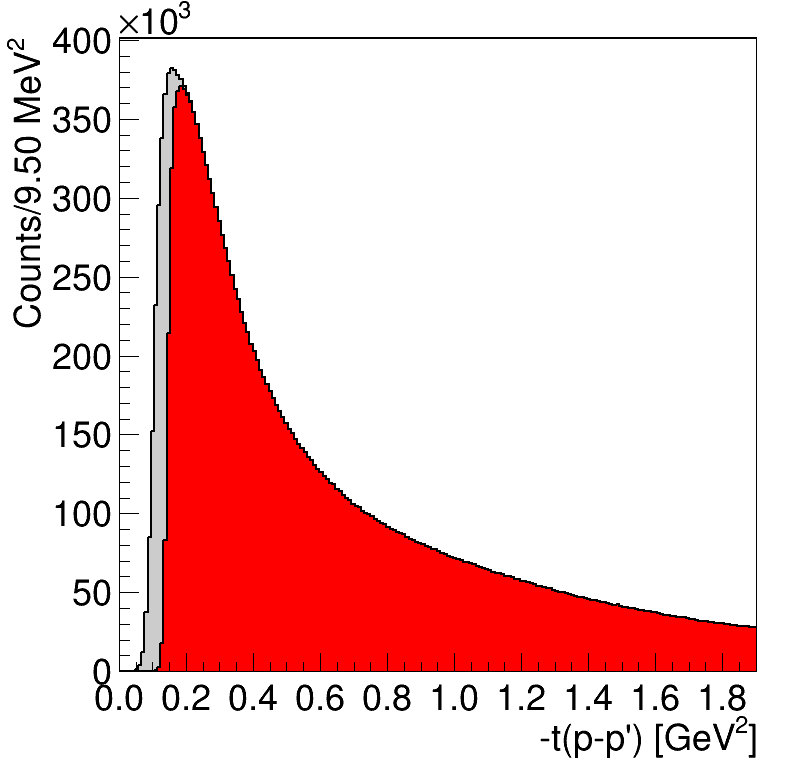

In [88]:
c.Clear()
pad = c.cd()
pad.SetLeftMargin(0.15)
pad.SetBottomMargin(0.13)
pp_xtitle = "-t(p-p') [GeV^{2}]"
pp_ytitle = f'Counts/{1000*(pp_xhigh-pp_xlow)/pp_bins:.2f}' + ' MeV^{2}'

title_hists([hist_trange_pimkpks, hist_trange_pimkpks_cut], pp_xtitle, pp_ytitle, yoffset=1.4)

hist_trange_pimkpks_cut.SetFillColor(ROOT.kRed)
hist_trange_pimkpks.GetXaxis().SetTitleOffset(1.05)
hist_trange_pimkpks.GetYaxis().SetTitleOffset(1.5)
hist_trange_pimkpks.GetXaxis().SetTitleSize(0.05)
hist_trange_pimkpks.GetXaxis().SetLabelSize(0.05)
hist_trange_pimkpks.GetYaxis().SetLabelSize(0.05)
hist_trange_pimkpks.GetYaxis().SetTitleSize(0.05)

hist_trange_pimkpks.Draw()
hist_trange_pimkpks_cut.Draw('same')
c.Draw()
ROOT.gPad.RedrawAxis()


## Pathlength $\Delta r/\sigma_r$

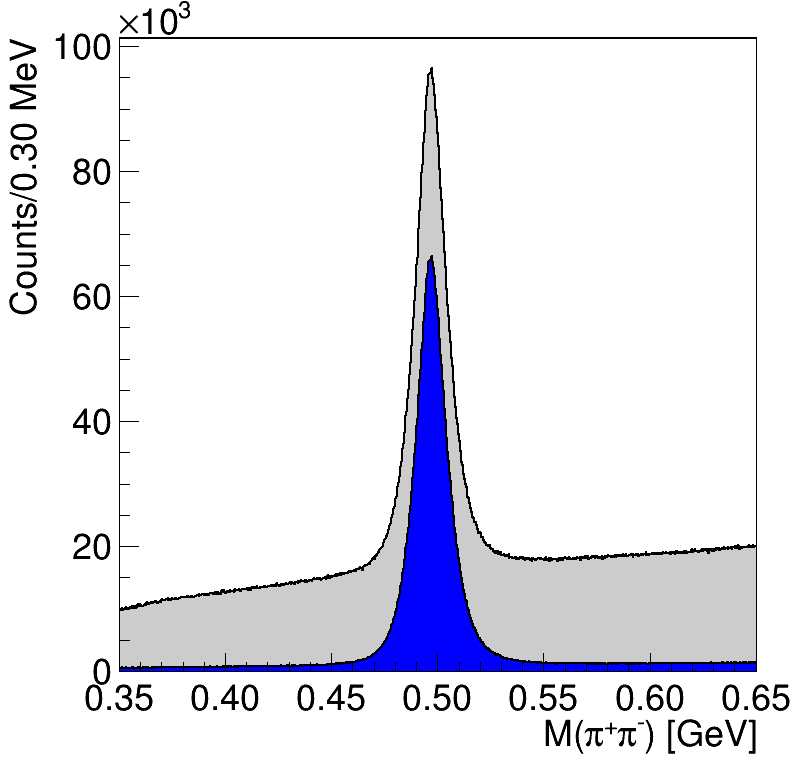

In [89]:
c.Clear()
pad = c.cd()
pad.SetLeftMargin(0.15)
pad.SetBottomMargin(0.13)

ks_xtitle = 'M(#pi^{+}#pi^{-}) [GeV]'
ks_ytitle = f'Counts/{1000*(ks_xhigh-ks_xlow)/ks_bins:.2f}' + ' MeV'

title_hists([hist_ks_pipkmks, hist_ks_pipkmks_cut], ks_xtitle, ks_ytitle, yoffset=1.4)


hist_ks_pipkmks_cut.SetFillColor(ROOT.kBlue)
hist_ks_pipkmks.GetYaxis().SetRangeUser(0, 1.05*hist_ks_pipkmks.GetMaximum())
hist_ks_pipkmks.GetXaxis().SetTitleOffset(1.05)
hist_ks_pipkmks.GetYaxis().SetTitleOffset(1.5)
hist_ks_pipkmks.GetXaxis().SetTitleSize(0.05)
hist_ks_pipkmks.GetXaxis().SetLabelSize(0.05)
hist_ks_pipkmks.GetYaxis().SetLabelSize(0.05)
hist_ks_pipkmks.GetYaxis().SetTitleSize(0.05)

hist_ks_pipkmks.Draw()
hist_ks_pipkmks_cut.Draw('same')
c.Draw()
ROOT.gPad.RedrawAxis()


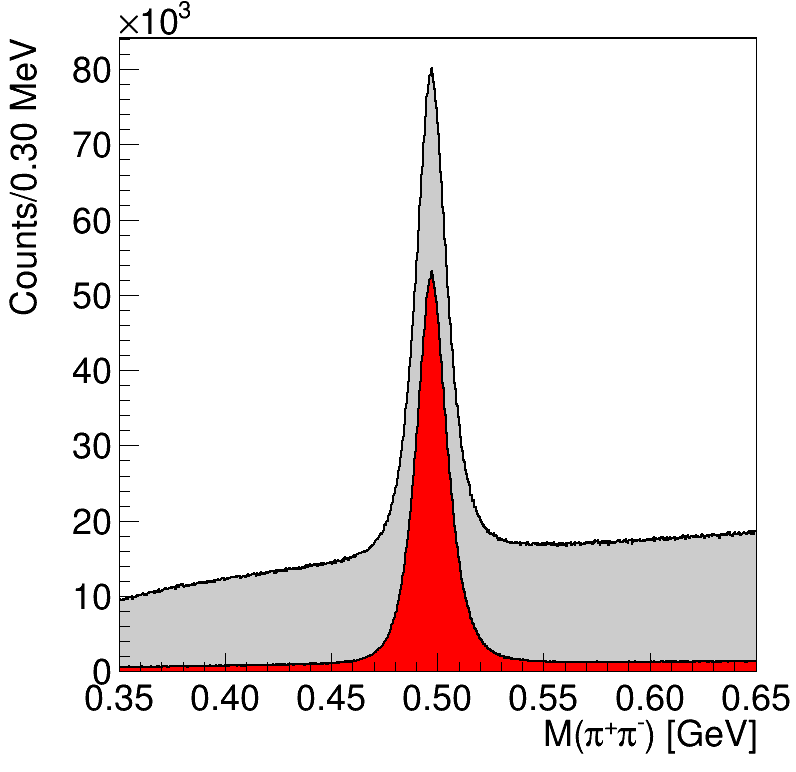

In [90]:
c.Clear()
pad = c.cd()
pad.SetLeftMargin(0.15)
pad.SetBottomMargin(0.13)

ks_xtitle = 'M(#pi^{+}#pi^{-}) [GeV]'
ks_ytitle = f'Counts/{1000*(ks_xhigh-ks_xlow)/ks_bins:.2f}' + ' MeV'

title_hists([hist_ks_pimkpks, hist_ks_pimkpks_cut], ks_xtitle, ks_ytitle, yoffset=1.4)


hist_ks_pimkpks_cut.SetFillColor(ROOT.kRed)
hist_ks_pimkpks.GetYaxis().SetRangeUser(0, 1.05*hist_ks_pimkpks.GetMaximum())
hist_ks_pimkpks.GetXaxis().SetTitleOffset(1.05)
hist_ks_pimkpks.GetYaxis().SetTitleOffset(1.5)
hist_ks_pimkpks.GetXaxis().SetTitleSize(0.05)
hist_ks_pimkpks.GetXaxis().SetLabelSize(0.05)
hist_ks_pimkpks.GetYaxis().SetLabelSize(0.05)
hist_ks_pimkpks.GetYaxis().SetTitleSize(0.05)

hist_ks_pimkpks.Draw()
hist_ks_pimkpks_cut.Draw('same')
c.Draw()
ROOT.gPad.RedrawAxis()


## $\Delta$ and $N^*$

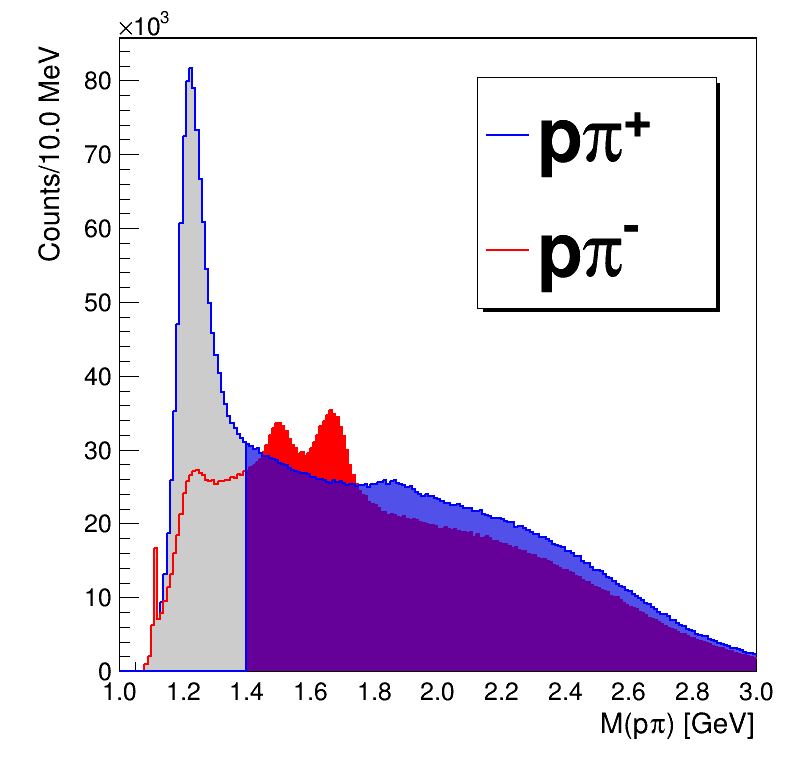

In [91]:
from my_library.common_analysis_tools import sort_hists_by_max


c.Clear()

ppi_xtitle = 'M(p#pi) [GeV]'
ppi_ytitle = f'Counts/{1000*(ppi_xhigh-ppi_xlow)/ppi_bins:.1f}' + ' MeV'

title_hists([hist_ppi_pipkmks, hist_ppi_pipkmks_cut, hist_ppi_pimkpks, hist_ks_pimkpks_cut], ppi_xtitle, ppi_ytitle, yoffset=1.4)

hist_ppi_pipkmks_cut.SetFillColorAlpha(ROOT.kBlue, 0.6)
hist_ppi_pimkpks_cut.SetFillColor(ROOT.kRed)

hist_ppi_pipkmks.SetLineColor(ROOT.kBlue)
hist_ppi_pipkmks_cut.SetLineColor(ROOT.kBlue)
hist_ppi_pimkpks.SetLineColor(ROOT.kRed)
hist_ppi_pimkpks_cut.SetLineColor(ROOT.kRed)

ppi_legend = ROOT.TLegend(0.6, 0.6, 0.9, 0.9)
ppi_legend.AddEntry(hist_ppi_pipkmks.GetPtr(), 'p#pi^{+}', 'l')
# ppi_legend.AddEntry(hist_ppi_pipkmks_cut.GetPtrpK^{-}K_{s}#pi^{+} (cut)', 'f')
ppi_legend.AddEntry(hist_ppi_pimkpks.GetPtr(), 'p#pi^{-}', 'l')
# ppi_legend.AddEntry(hist_ppi_pimkpks_cut.GetPtr(), 'pK^{+}K_{s}#pi^{-} (cut)', 'f')

sorted_hists = sort_hists_by_max([hist_ppi_pipkmks, hist_ppi_pipkmks_cut, hist_ppi_pimkpks, hist_ppi_pimkpks_cut])

sorted_hists[0].Draw()
sorted_hists[1].Draw('same')
sorted_hists[2].Draw('same')
sorted_hists[3].Draw('same')
ppi_legend.Draw()
c.Draw()





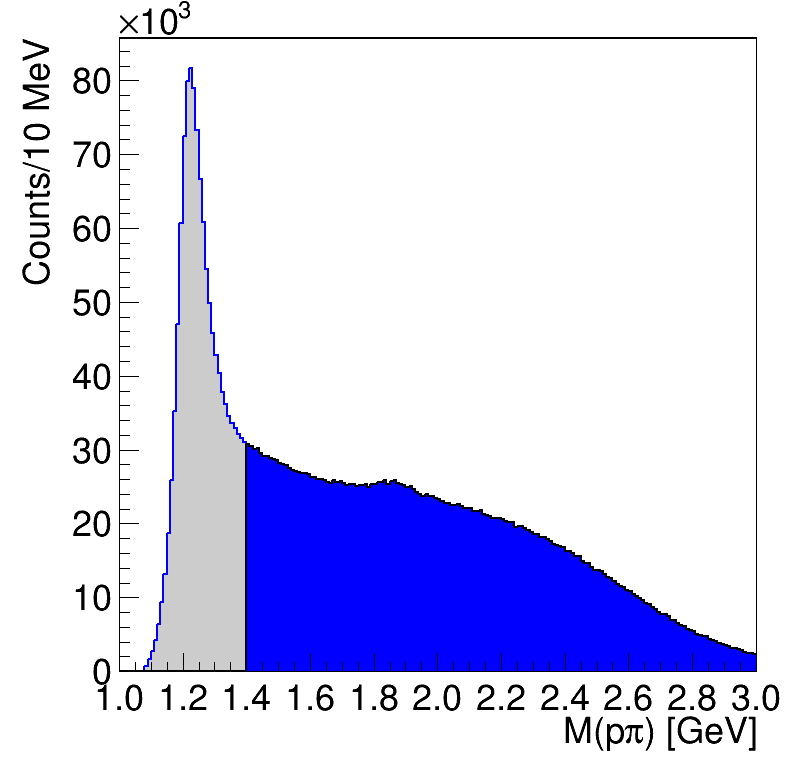

In [92]:
c.Clear()
hist_ppi_pipkmks_cut.SetFillColor(ROOT.kBlue)
hist_ppi_pipkmks_cut.SetLineColor(ROOT.kBlack)

hist_ppi_pipkmks.GetXaxis().SetTitle('M(p#pi) [GeV]')
hist_ppi_pipkmks.GetXaxis().SetTitleSize(0.05)
hist_ppi_pipkmks.GetXaxis().SetLabelSize(0.05)
hist_ppi_pipkmks.GetXaxis().SetTitleOffset(1.0)
hist_ppi_pipkmks.GetYaxis().SetTitle('Counts/10 MeV')
hist_ppi_pipkmks.GetYaxis().SetTitleSize(0.05)
hist_ppi_pipkmks.GetYaxis().SetLabelSize(0.05)
hist_ppi_pipkmks.GetYaxis().SetTitleOffset(1.3)

hist_ppi_pipkmks.Draw()
hist_ppi_pipkmks_cut.Draw("same")
c.Draw()
ROOT.gPad.RedrawAxis()


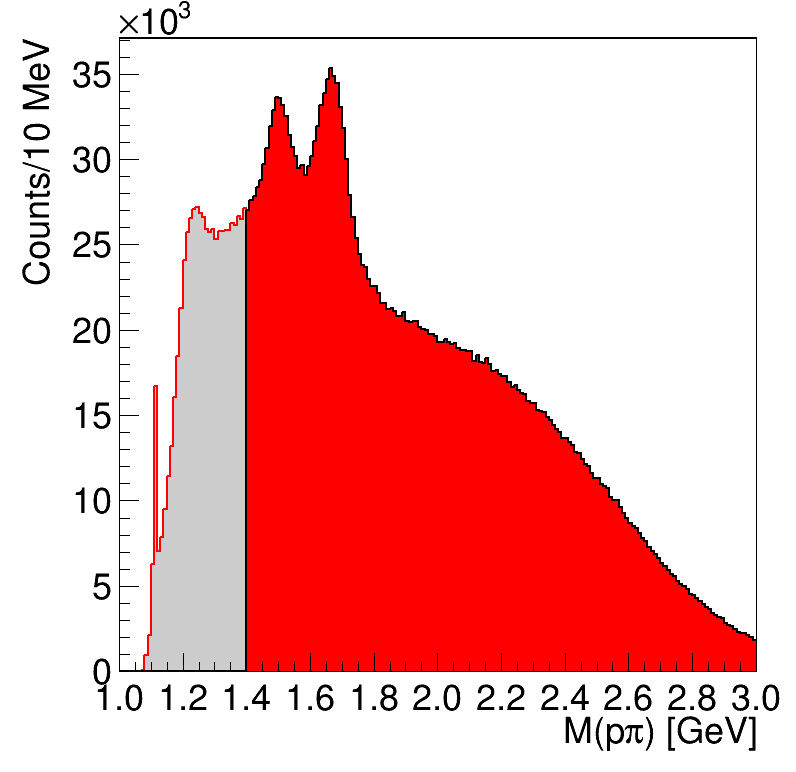

In [93]:
c.Clear()
hist_ppi_pimkpks_cut.SetFillColor(ROOT.kRed)
hist_ppi_pimkpks_cut.SetLineColor(ROOT.kBlack)

hist_ppi_pimkpks.GetXaxis().SetTitle('M(p#pi) [GeV]')
hist_ppi_pimkpks.GetXaxis().SetTitleSize(0.05)
hist_ppi_pimkpks.GetXaxis().SetLabelSize(0.05)
hist_ppi_pimkpks.GetXaxis().SetTitleOffset(1.0)
hist_ppi_pimkpks.GetYaxis().SetTitle('Counts/10 MeV')
hist_ppi_pimkpks.GetYaxis().SetTitleSize(0.05)
hist_ppi_pimkpks.GetYaxis().SetLabelSize(0.05)
hist_ppi_pimkpks.GetYaxis().SetTitleOffset(1.3)

hist_ppi_pimkpks.Draw()
hist_ppi_pimkpks_cut.Draw("same")
c.Draw()
ROOT.gPad.RedrawAxis()


## $\Lambda/\Sigma$

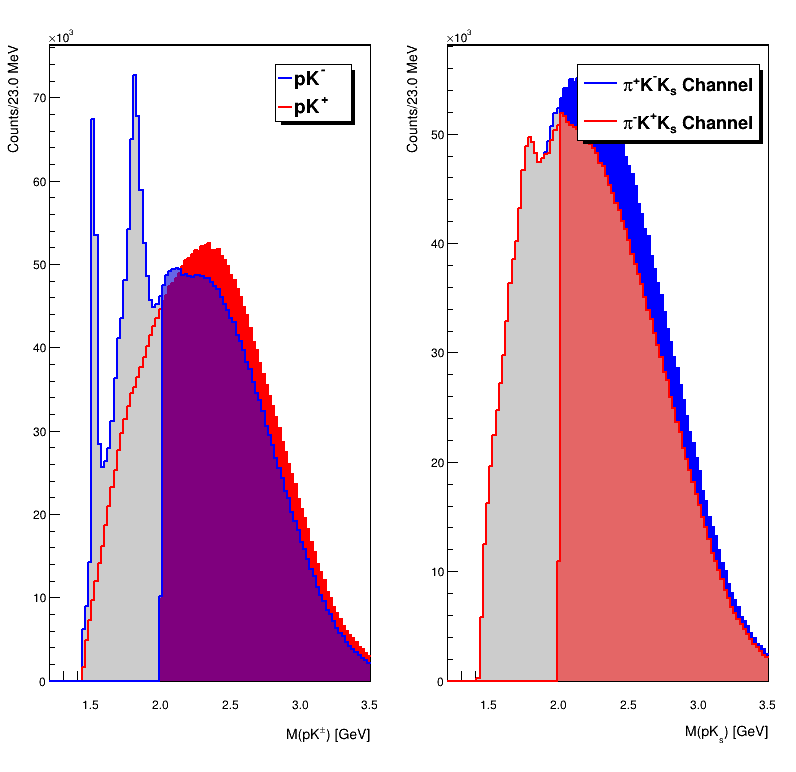

In [94]:
c.Clear()

ksp_xtitle = 'M(pK_{s}) [GeV]'
ksp_ytitle = f'Counts/{1000*(kp_xhigh-kp_xlow)/kp_bins:.1f}' + ' MeV'

kp_xtitle = 'M(pK^{#pm}) [GeV]'
kp_ytitle = f'Counts/{1000*(kp_xhigh-kp_xlow)/kp_bins:.1f}' + ' MeV'

title_hists([hist_pks_pipkmks, hist_pks_pipkmks_cut, hist_pks_pimkpks, hist_pks_pimkpks_cut], ksp_xtitle, ksp_ytitle, yoffset=1.5)
title_hists([hist_pk_pipkmks, hist_pk_pipkmks_cut, hist_pk_pimkpks, hist_pk_pimkpks_cut], kp_xtitle, kp_ytitle, yoffset=1.5)

hist_pks_pipkmks_cut.SetFillColor(ROOT.kBlue)
hist_pks_pimkpks_cut.SetFillColorAlpha(ROOT.kRed, 0.5)
hist_pk_pipkmks_cut.SetFillColorAlpha(ROOT.kBlue, 0.5)
hist_pk_pimkpks_cut.SetFillColor(ROOT.kRed)

hist_pks_pipkmks.SetLineColor(ROOT.kBlue)
hist_pks_pipkmks_cut.SetLineColor(ROOT.kBlue)
hist_pks_pimkpks.SetLineColor(ROOT.kRed)
hist_pks_pimkpks_cut.SetLineColor(ROOT.kRed)
hist_pk_pipkmks.SetLineColor(ROOT.kBlue)
hist_pk_pipkmks_cut.SetLineColor(ROOT.kBlue)
hist_pk_pimkpks.SetLineColor(ROOT.kRed)
hist_pk_pimkpks_cut.SetLineColor(ROOT.kRed)

ksp_legend = ROOT.TLegend(0.45, 0.825, 0.925, 0.925)
ksp_legend.SetTextSize(0.05)
ksp_legend.AddEntry(hist_pks_pipkmks.GetPtr(), '#pi^{+}K^{-}K_{s} Channel', 'l')
ksp_legend.AddEntry(hist_pks_pimkpks.GetPtr(), '#pi^{-}K^{+}K_{s} Channel', 'l')

kp_legend = ROOT.TLegend(0.7, 0.85, 0.9, 0.925)
kp_legend.SetTextSize(0.055)
kp_legend.AddEntry(hist_pk_pipkmks.GetPtr(), 'pK^{-}', 'l')
kp_legend.AddEntry(hist_pk_pimkpks.GetPtr(), 'pK^{+}', 'l')

sorted_pks = sort_hists_by_max([hist_pks_pipkmks, hist_pks_pipkmks_cut, hist_pks_pimkpks, hist_pks_pimkpks_cut])
sorted_pk = sort_hists_by_max([hist_pk_pipkmks, hist_pk_pipkmks_cut, hist_pk_pimkpks, hist_pk_pimkpks_cut])

c.Divide(2,1)
c.cd(1)
sorted_pk[0].Draw()
sorted_pk[1].Draw('same')
sorted_pk[2].Draw('same')
sorted_pk[3].Draw('same')
kp_legend.Draw()

c.cd(2)
sorted_pks[0].Draw()
sorted_pks[1].Draw('same')
sorted_pks[2].Draw('same')
sorted_pks[3].Draw('same')
ksp_legend.Draw()

c.Draw()

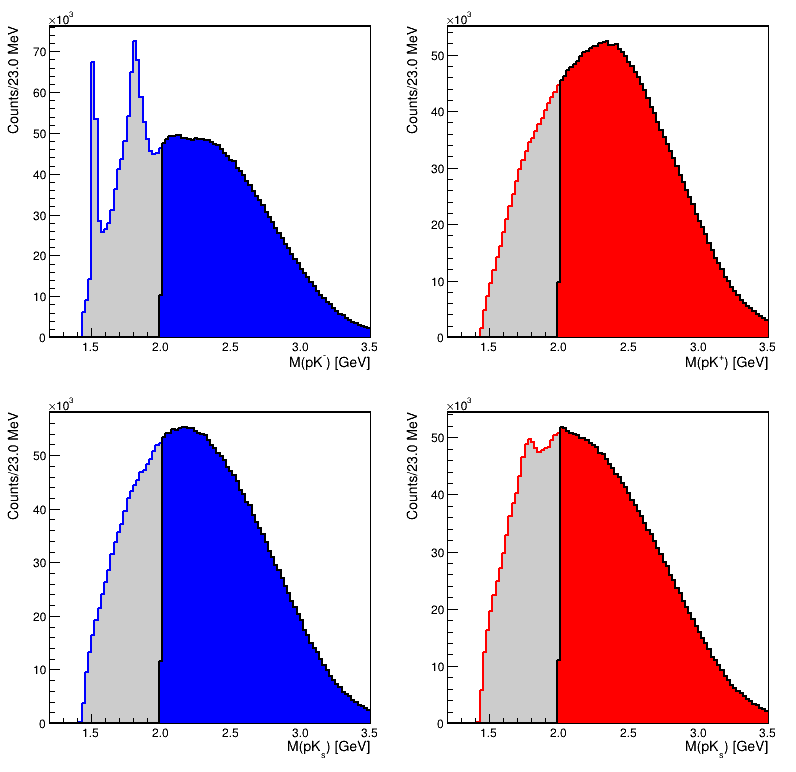

In [95]:
c.Clear()
c.Divide(2,2)

c.cd(1)
hist_pk_pipkmks.GetYaxis().SetTitleOffset(1.5)
hist_pk_pipkmks.GetXaxis().SetTitle('M(pK^{-}) [GeV]')
hist_pk_pipkmks_cut.SetFillColor(ROOT.kBlue)
hist_pk_pipkmks_cut.SetLineColor(ROOT.kBlack)
hist_pk_pipkmks.Draw()
hist_pk_pipkmks_cut.Draw('same')
c.cd(2)
hist_pk_pimkpks.GetYaxis().SetTitleOffset(1.5)
hist_pk_pimkpks.GetXaxis().SetTitle('M(pK^{+}) [GeV]')
hist_pk_pimkpks_cut.SetFillColor(ROOT.kRed)
hist_pk_pimkpks_cut.SetLineColor(ROOT.kBlack)
hist_pk_pimkpks.Draw()
hist_pk_pimkpks_cut.Draw('same')
c.cd(3)
hist_pks_pipkmks.GetYaxis().SetTitleOffset(1.5)
hist_pks_pipkmks.GetXaxis().SetTitle('M(pK_{s}) [GeV]')
hist_pks_pipkmks_cut.SetFillColor(ROOT.kBlue)
hist_pks_pipkmks_cut.SetLineColor(ROOT.kBlack)
hist_pks_pipkmks.Draw()
hist_pks_pipkmks_cut.Draw('same')
c.cd(4)
hist_pks_pimkpks.GetYaxis().SetTitleOffset(1.5)
hist_pks_pimkpks.GetXaxis().SetTitle('M(pK_{s}) [GeV]')
hist_pks_pimkpks_cut.SetFillColor(ROOT.kRed)
hist_pks_pimkpks_cut.SetLineColor(ROOT.kBlack)
hist_pks_pimkpks.Draw()
hist_pks_pimkpks_cut.Draw('same')
c.Draw()

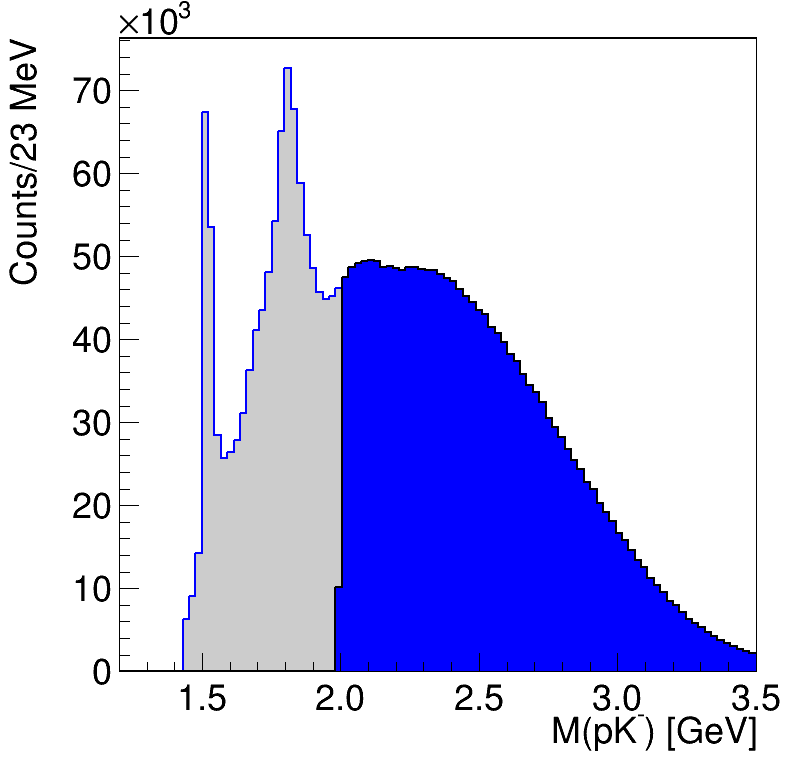

In [96]:
c.Clear()

hist_pk_pipkmks.GetYaxis().SetTitleOffset(1.5)
hist_pk_pipkmks.GetXaxis().SetTitle('M(pK^{-}) [GeV]')
hist_pk_pipkmks.GetXaxis().SetTitleSize(0.05)
hist_pk_pipkmks.GetXaxis().SetLabelSize(0.05)
hist_pk_pipkmks.GetXaxis().SetTitleOffset(1.0)
hist_pk_pipkmks.GetYaxis().SetTitle('Counts/23 MeV')
hist_pk_pipkmks.GetYaxis().SetTitleSize(0.05)
hist_pk_pipkmks.GetYaxis().SetLabelSize(0.05)

hist_pk_pipkmks_cut.SetFillColor(ROOT.kBlue)
hist_pk_pipkmks_cut.SetLineColor(ROOT.kBlack)
hist_pk_pipkmks.Draw()
hist_pk_pipkmks_cut.Draw('same')

c.Draw()
ROOT.gPad.RedrawAxis()


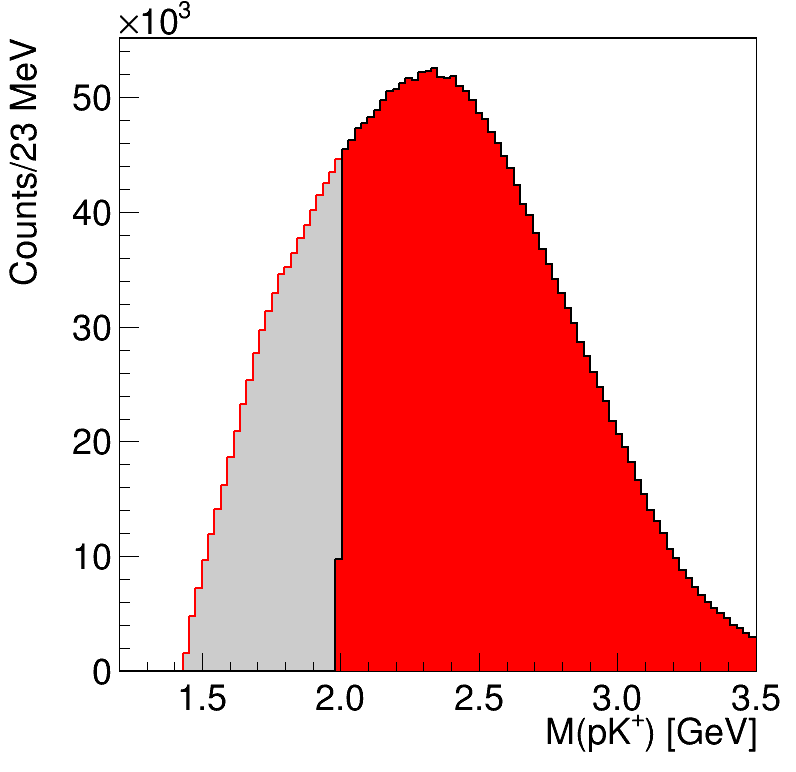

In [97]:
c.Clear()

hist_pk_pimkpks.GetYaxis().SetTitleOffset(1.5)
hist_pk_pimkpks.GetXaxis().SetTitle('M(pK^{+}) [GeV]')
hist_pk_pimkpks.GetXaxis().SetTitleSize(0.05)
hist_pk_pimkpks.GetXaxis().SetLabelSize(0.05)
hist_pk_pimkpks.GetXaxis().SetTitleOffset(1.0)
hist_pk_pimkpks.GetYaxis().SetTitle('Counts/23 MeV')
hist_pk_pimkpks.GetYaxis().SetTitleSize(0.05)
hist_pk_pimkpks.GetYaxis().SetLabelSize(0.05)
hist_pk_pimkpks_cut.SetFillColor(ROOT.kRed)
hist_pk_pimkpks_cut.SetLineColor(ROOT.kBlack)
hist_pk_pimkpks.Draw()
hist_pk_pimkpks_cut.Draw('same')

c.Draw()
ROOT.gPad.RedrawAxis()


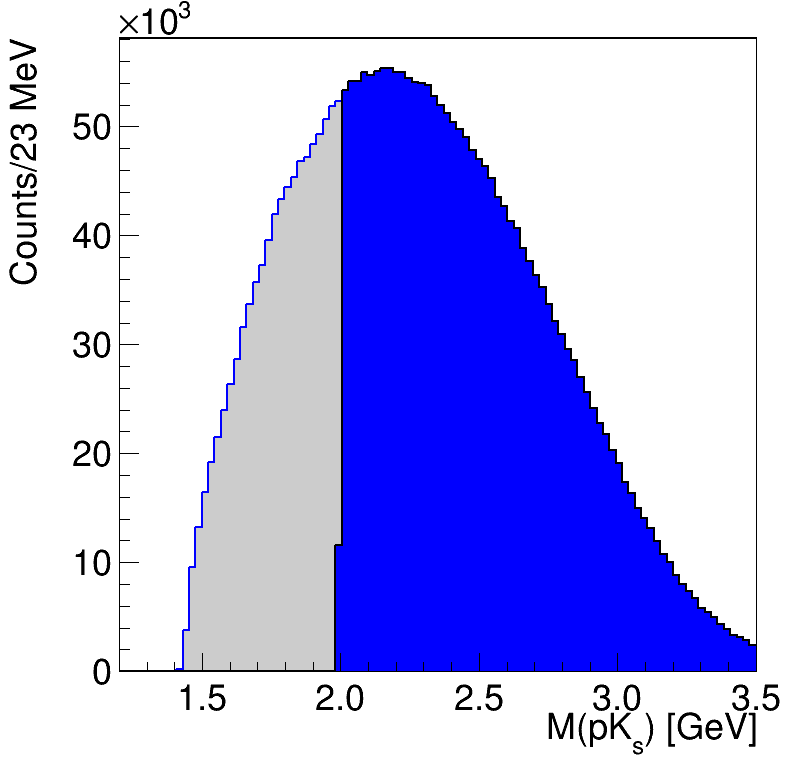

In [98]:
c.Clear()

hist_pks_pipkmks.GetYaxis().SetTitleOffset(1.5)
hist_pks_pipkmks.GetXaxis().SetTitle('M(pK_{s}) [GeV]')
hist_pks_pipkmks.GetXaxis().SetTitleSize(0.05)
hist_pks_pipkmks.GetXaxis().SetLabelSize(0.05)
hist_pks_pipkmks.GetXaxis().SetTitleOffset(1.0)
hist_pks_pipkmks.GetYaxis().SetTitle('Counts/23 MeV')
hist_pks_pipkmks.GetYaxis().SetTitleSize(0.05)
hist_pks_pipkmks.GetYaxis().SetLabelSize(0.05)
hist_pks_pipkmks_cut.SetFillColor(ROOT.kBlue)
hist_pks_pipkmks_cut.SetLineColor(ROOT.kBlack)
hist_pks_pipkmks.Draw()
hist_pks_pipkmks_cut.Draw('same')

c.Draw()
ROOT.gPad.RedrawAxis()


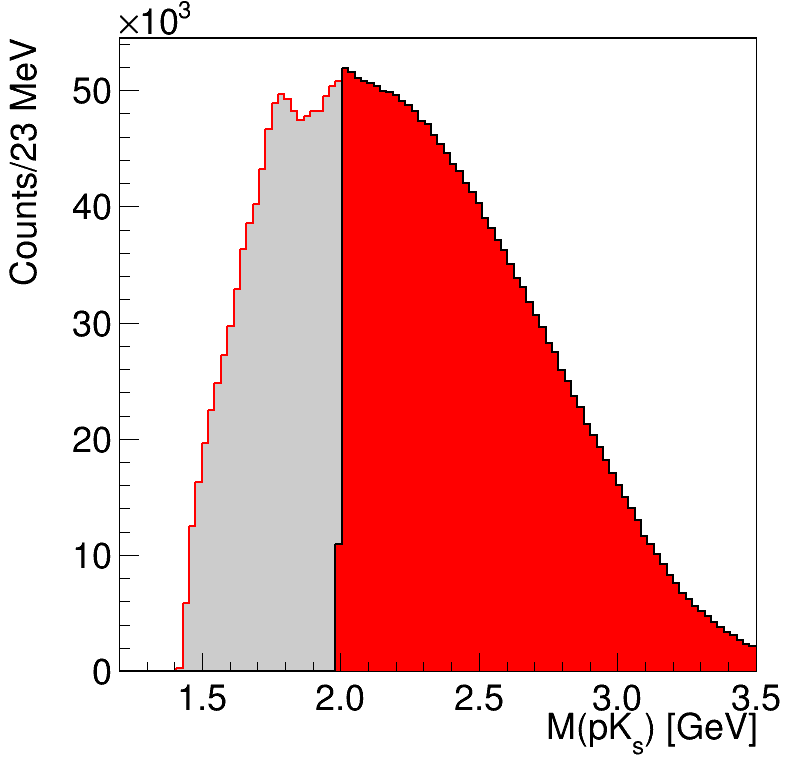

In [99]:
c.Clear()

hist_pks_pimkpks.GetYaxis().SetTitleOffset(1.5)
hist_pks_pimkpks.GetXaxis().SetTitle('M(pK_{s}) [GeV]')
hist_pks_pimkpks.GetXaxis().SetTitleSize(0.05)
hist_pks_pimkpks.GetXaxis().SetLabelSize(0.05)
hist_pks_pimkpks.GetXaxis().SetTitleOffset(1.0)
hist_pks_pimkpks.GetYaxis().SetTitle('Counts/23 MeV')
hist_pks_pimkpks.GetYaxis().SetTitleSize(0.05)
hist_pks_pimkpks.GetYaxis().SetLabelSize(0.05)
hist_pks_pimkpks_cut.SetFillColor(ROOT.kRed)
hist_pks_pimkpks_cut.SetLineColor(ROOT.kBlack)
hist_pks_pimkpks.Draw()
hist_pks_pimkpks_cut.Draw('same')
c.Draw()
ROOT.gPad.RedrawAxis()


## $KK\pi$ After Kinematics Cuts and Before $K^*$ Selection 

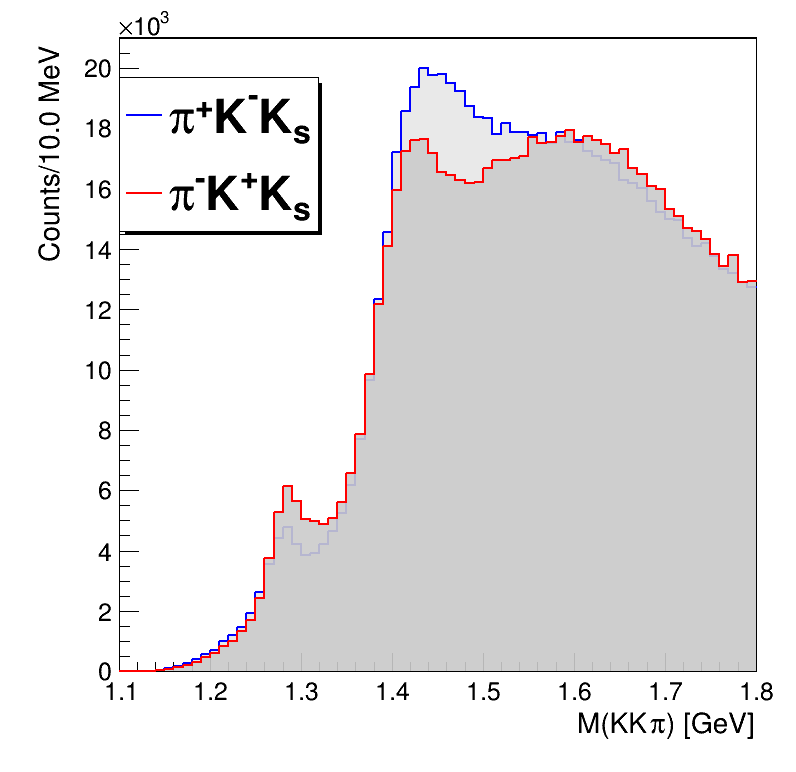

In [100]:
c.Clear()

ROOT.TGaxis.SetMaxDigits(4)

kkpi_xtitle = 'M(KK#pi) [GeV]'
kkpi_ytitle = f'Counts/{1000*(kkpi_xhigh-kkpi_xlow)/kkpi_bins:.1f}' + ' MeV'

title_hists([hist_kkpi_no_kstar_pipkmks, hist_kkpi_no_kstar_pimkpks], kkpi_xtitle, kkpi_ytitle, yoffset=1.4)

hist_kkpi_no_kstar_pipkmks.SetLineColor(ROOT.kBlue)
hist_kkpi_no_kstar_pimkpks.SetLineColor(ROOT.kRed)

hist_kkpi_no_kstar_pimkpks.SetFillColorAlpha(ROOT.kGray, 0.9)
hist_kkpi_no_kstar_pipkmks.SetFillColorAlpha(ROOT.kGray, 0.4)

hist_kkpi_no_kstar_pimkpks.GetYaxis().SetNoExponent(ROOT.kFALSE)

kkpi_legend = ROOT.TLegend(0.15, 0.7, 0.4, 0.9)
kkpi_legend.AddEntry(hist_kkpi_no_kstar_pipkmks.GetPtr(), '#pi^{+}K^{-}K_{s}', 'l')
kkpi_legend.AddEntry(hist_kkpi_no_kstar_pimkpks.GetPtr(), '#pi^{-}K^{+}K_{s}', 'l')

sorted_kkpi = sort_hists_by_max([hist_kkpi_no_kstar_pipkmks, hist_kkpi_no_kstar_pimkpks])

sorted_kkpi[0].Draw()
sorted_kkpi[1].Draw('same')
kkpi_legend.Draw()

c.Draw()

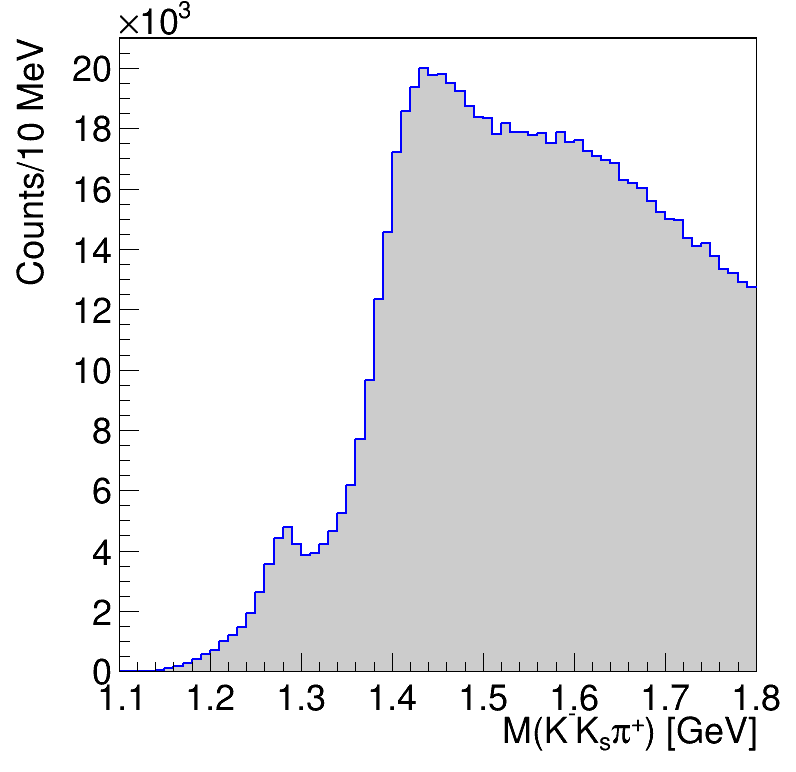

In [101]:
c.Clear()


hist_kkpi_no_kstar_pipkmks.SetLineColor(ROOT.kBlue)
hist_kkpi_no_kstar_pipkmks.SetFillColor(ROOT.kGray)
hist_kkpi_no_kstar_pipkmks.GetXaxis().SetTitle('M(K^{-}K_{s}#pi^{+}) [GeV]')
hist_kkpi_no_kstar_pipkmks.GetXaxis().SetTitleSize(0.05)
hist_kkpi_no_kstar_pipkmks.GetXaxis().SetLabelSize(0.05)
hist_kkpi_no_kstar_pipkmks.GetXaxis().SetTitleOffset(1.0)
hist_kkpi_no_kstar_pipkmks.GetYaxis().SetTitle('Counts/10 MeV')
hist_kkpi_no_kstar_pipkmks.GetYaxis().SetTitleSize(0.05)
hist_kkpi_no_kstar_pipkmks.GetYaxis().SetLabelSize(0.05)

# hist_kkpi_no_kstar_pimkpks.GetYaxis().SetNoExponent(ROOT.kFALSE)
hist_kkpi_no_kstar_pipkmks.Draw()
c.Draw()

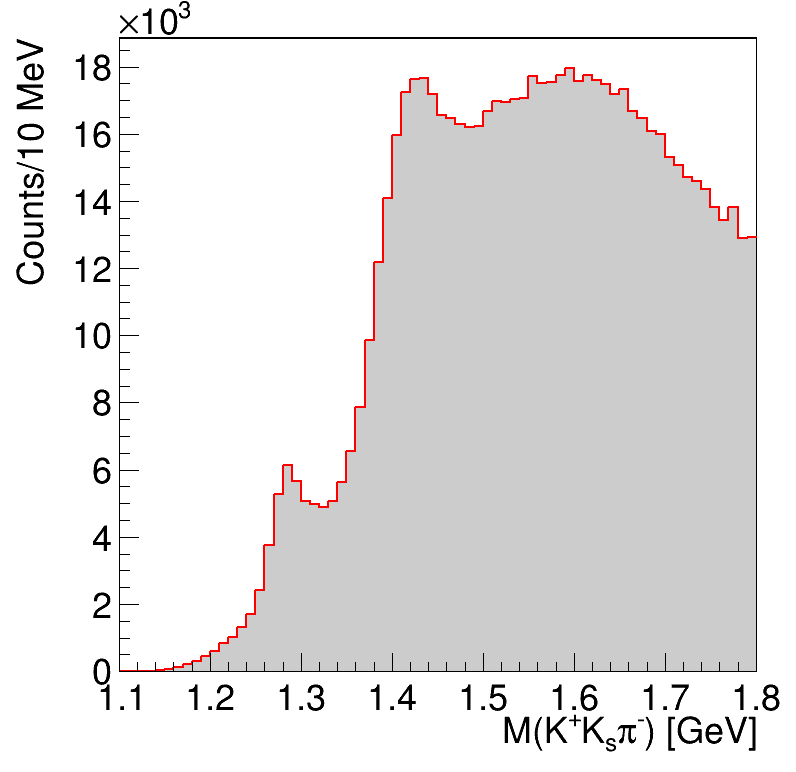

In [102]:
c.Clear()


hist_kkpi_no_kstar_pimkpks.SetLineColor(ROOT.kRed)
hist_kkpi_no_kstar_pimkpks.SetFillColor(ROOT.kGray)
hist_kkpi_no_kstar_pimkpks.GetXaxis().SetTitle('M(K^{+}K_{s}#pi^{-}) [GeV]')
hist_kkpi_no_kstar_pimkpks.GetXaxis().SetTitleSize(0.05)
hist_kkpi_no_kstar_pimkpks.GetXaxis().SetLabelSize(0.05)
hist_kkpi_no_kstar_pimkpks.GetXaxis().SetTitleOffset(1.0)
hist_kkpi_no_kstar_pimkpks.GetYaxis().SetTitle('Counts/10 MeV')
hist_kkpi_no_kstar_pimkpks.GetYaxis().SetTitleSize(0.05)
hist_kkpi_no_kstar_pimkpks.GetYaxis().SetLabelSize(0.05)

# hist_kkpi_no_kstar_pimkpks.GetYaxis().SetNoExponent(ROOT.kFALSE)
hist_kkpi_no_kstar_pimkpks.Draw()
c.Draw()

## $K^*$ Plots

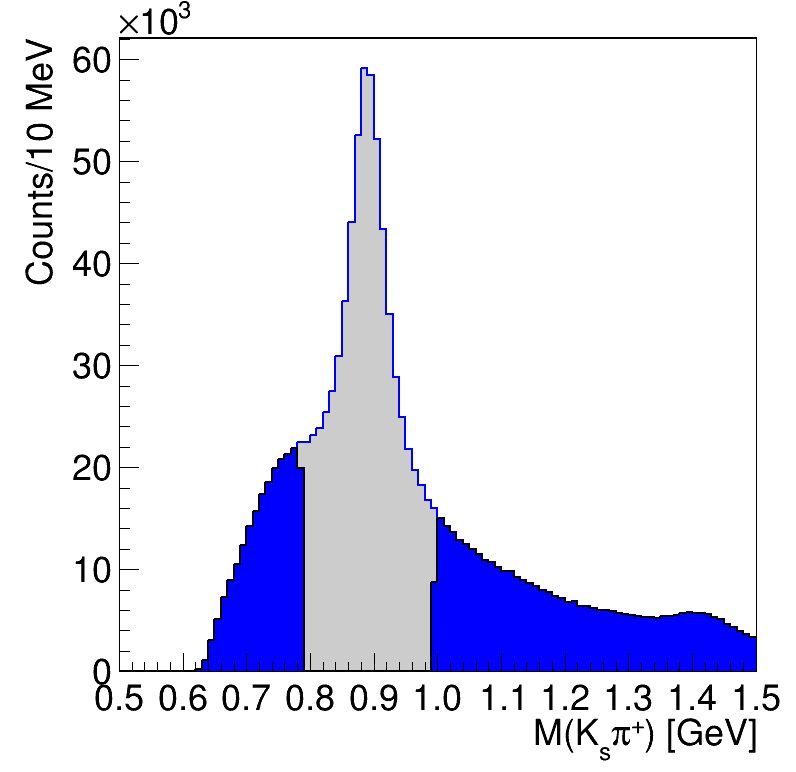

In [103]:
c.Clear()

hist_kstar_charged_pipkmks.SetLineColor(ROOT.kBlue)
hist_kstar_charged_cut_pipkmks.SetFillColor(ROOT.kBlue)
hist_kstar_charged_cut_pipkmks.SetLineColor(ROOT.kBlack)

hist_kstar_charged_pipkmks.GetXaxis().SetTitleSize(0.05)
hist_kstar_charged_pipkmks.GetXaxis().SetLabelSize(0.05)
hist_kstar_charged_pipkmks.GetXaxis().SetTitleOffset(1.1)
hist_kstar_charged_pipkmks.GetYaxis().SetTitle(f'Counts/10 MeV')
hist_kstar_charged_pipkmks.GetYaxis().SetTitleSize(0.05)
hist_kstar_charged_pipkmks.GetYaxis().SetLabelSize(0.05)

hist_kstar_charged_pipkmks.Draw()
hist_kstar_charged_cut_pipkmks.Draw('same')

c.Draw()
ROOT.gPad.RedrawAxis()


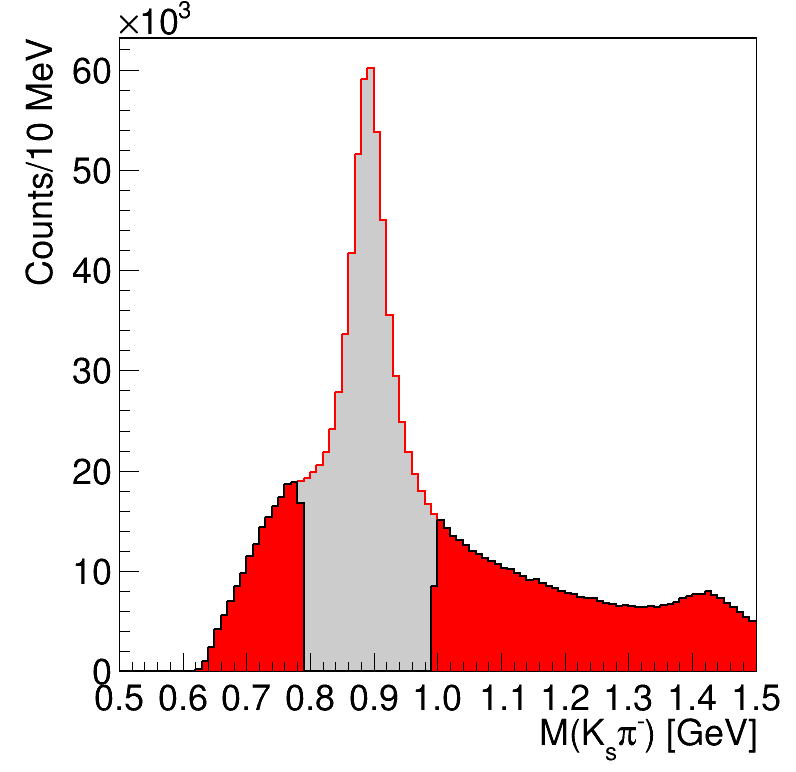

In [104]:
c.Clear()

hist_kstar_charged_pimkpks.SetLineColor(ROOT.kRed)
hist_kstar_charged_cut_pimkpks.SetFillColor(ROOT.kRed)
hist_kstar_charged_cut_pimkpks.SetLineColor(ROOT.kBlack)
hist_kstar_charged_pimkpks.GetXaxis().SetTitleSize(0.05)
hist_kstar_charged_pimkpks.GetXaxis().SetLabelSize(0.05)
hist_kstar_charged_pimkpks.GetXaxis().SetTitleOffset(1.1)
hist_kstar_charged_pimkpks.GetYaxis().SetTitle(f'Counts/10 MeV')
hist_kstar_charged_pimkpks.GetYaxis().SetTitleSize(0.05)
hist_kstar_charged_pimkpks.GetYaxis().SetLabelSize(0.05)

hist_kstar_charged_pimkpks.Draw()
hist_kstar_charged_cut_pimkpks.Draw('same')

c.Draw()
ROOT.gPad.RedrawAxis()


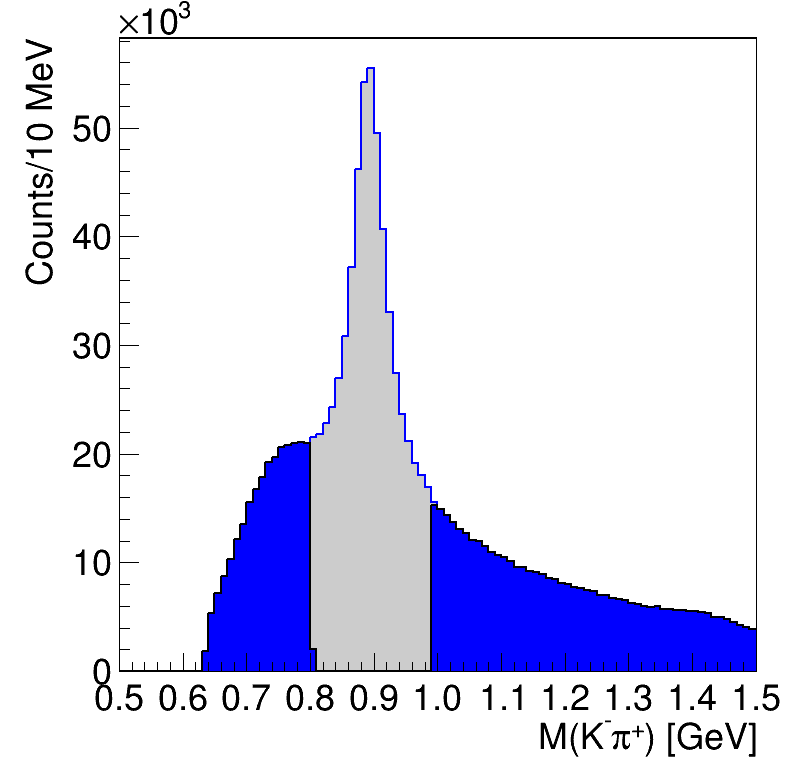

In [105]:
c.Clear()

hist_kstar_zero_pipkmks.SetLineColor(ROOT.kBlue)
hist_kstar_zero_cut_pipkmks.SetFillColor(ROOT.kBlue)
hist_kstar_zero_cut_pipkmks.SetLineColor(ROOT.kBlack)

hist_kstar_zero_pipkmks.GetXaxis().SetTitleSize(0.05)
hist_kstar_zero_pipkmks.GetXaxis().SetLabelSize(0.05)
hist_kstar_zero_pipkmks.GetXaxis().SetTitleOffset(1.1)
hist_kstar_zero_pipkmks.GetYaxis().SetTitle(f'Counts/10 MeV')
hist_kstar_zero_pipkmks.GetYaxis().SetTitleSize(0.05)
hist_kstar_zero_pipkmks.GetYaxis().SetLabelSize(0.05)

hist_kstar_zero_pipkmks.Draw()
hist_kstar_zero_cut_pipkmks.Draw('same')

c.Draw()
ROOT.gPad.RedrawAxis()


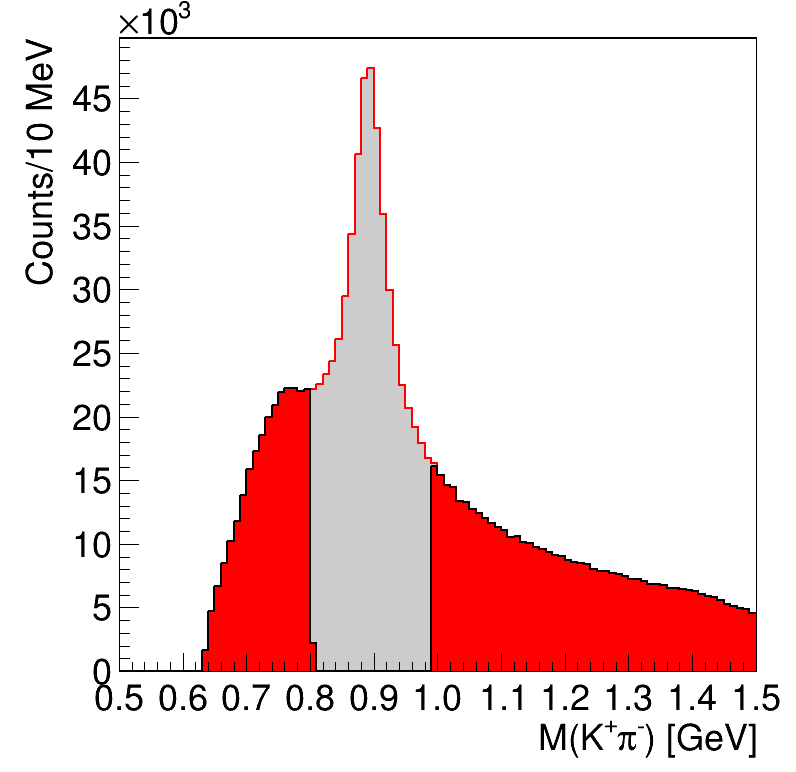

In [106]:
c.Clear()

hist_kstar_zero_pimkpks.SetLineColor(ROOT.kRed)
hist_kstar_zero_cut_pimkpks.SetFillColor(ROOT.kRed)
hist_kstar_zero_cut_pimkpks.SetLineColor(ROOT.kBlack)

hist_kstar_zero_pimkpks.GetXaxis().SetTitleSize(0.05)
hist_kstar_zero_pimkpks.GetXaxis().SetLabelSize(0.05)
hist_kstar_zero_pimkpks.GetXaxis().SetTitleOffset(1.1)
hist_kstar_zero_pimkpks.GetYaxis().SetTitle(f'Counts/10 MeV')
hist_kstar_zero_pimkpks.GetYaxis().SetTitleSize(0.05)
hist_kstar_zero_pimkpks.GetYaxis().SetLabelSize(0.05)

hist_kstar_zero_pimkpks.Draw()
hist_kstar_zero_cut_pimkpks.Draw('same')

c.Draw()
ROOT.gPad.RedrawAxis()


## $K\pi$ Dalitz Plots

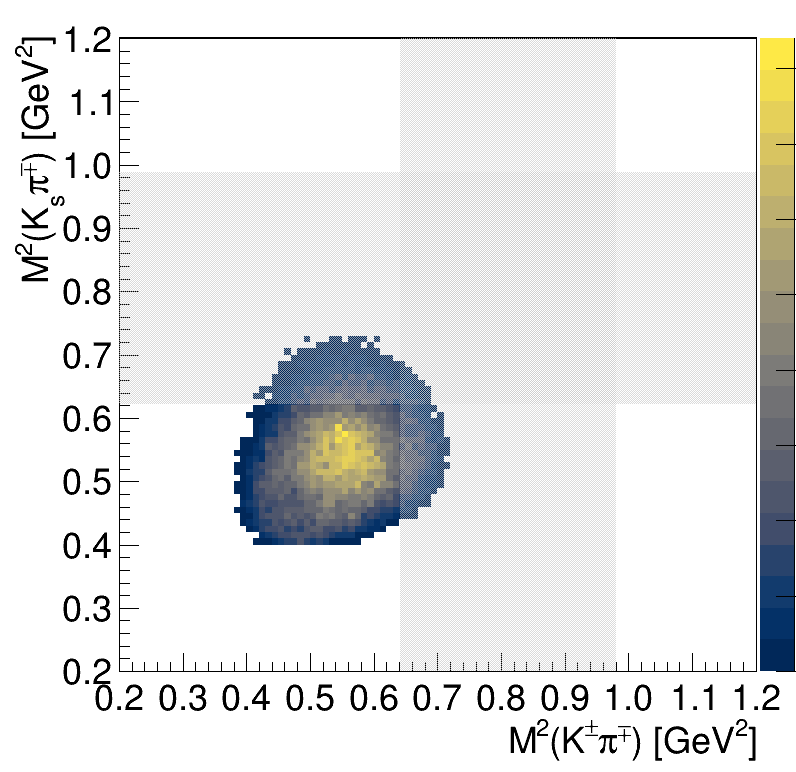

In [107]:
c.Clear()


kstar_dalitz_ylow = (cuts.CHARGED_KSTAR_MASS - 2*cuts.CHARGED_KSTAR_WIDTH)*(cuts.CHARGED_KSTAR_MASS - 2*cuts.CHARGED_KSTAR_WIDTH)
kstar_dalitz_yhigh = (cuts.CHARGED_KSTAR_MASS + 2*cuts.CHARGED_KSTAR_WIDTH)*(cuts.CHARGED_KSTAR_MASS + 2*cuts.CHARGED_KSTAR_WIDTH)
kstar_dalitz_xlow = (cuts.NEUTRAL_KSTAR_MASS - 2*cuts.NEUTRAL_KSTAR_WIDTH)*(cuts.NEUTRAL_KSTAR_MASS - 2*cuts.NEUTRAL_KSTAR_WIDTH)
kstar_dalitz_xhigh = (cuts.NEUTRAL_KSTAR_MASS + 2*cuts.NEUTRAL_KSTAR_WIDTH)*(cuts.NEUTRAL_KSTAR_MASS + 2*cuts.NEUTRAL_KSTAR_WIDTH)
kstar_neutral_box = ROOT.TBox(kstar_dalitz_xlow, 0.2, kstar_dalitz_xhigh, 1.2)
kstar_neutral_box.SetFillColorAlpha(ROOT.kGray, 0.7)
kstar_neutral_box.SetFillStyle(3001)
kstar_charged_box = ROOT.TBox(0.2,kstar_dalitz_ylow, 1.2, kstar_dalitz_yhigh)
kstar_charged_box.SetFillColorAlpha(ROOT.kGray, 0.7)
kstar_charged_box.SetFillStyle(3001)
                                                                          
hist_kstar_dalitz_pipkmks_1285.GetXaxis().SetTitle('M^{2}(K^{#pm}#pi^{#mp}) [GeV^{2}]')
hist_kstar_dalitz_pipkmks_1285.GetXaxis().SetTitleSize(0.05)
hist_kstar_dalitz_pipkmks_1285.GetXaxis().SetLabelSize(0.05)
hist_kstar_dalitz_pipkmks_1285.GetYaxis().SetTitle('M^{2}(K_{s}#pi^{#mp}) [GeV^{2}]')
hist_kstar_dalitz_pipkmks_1285.GetYaxis().SetTitleSize(0.05)
hist_kstar_dalitz_pipkmks_1285.GetYaxis().SetLabelSize(0.05)
hist_kstar_dalitz_pipkmks_1285.Draw('colz')
kstar_neutral_box.Draw()
kstar_charged_box.Draw()
c.Draw()

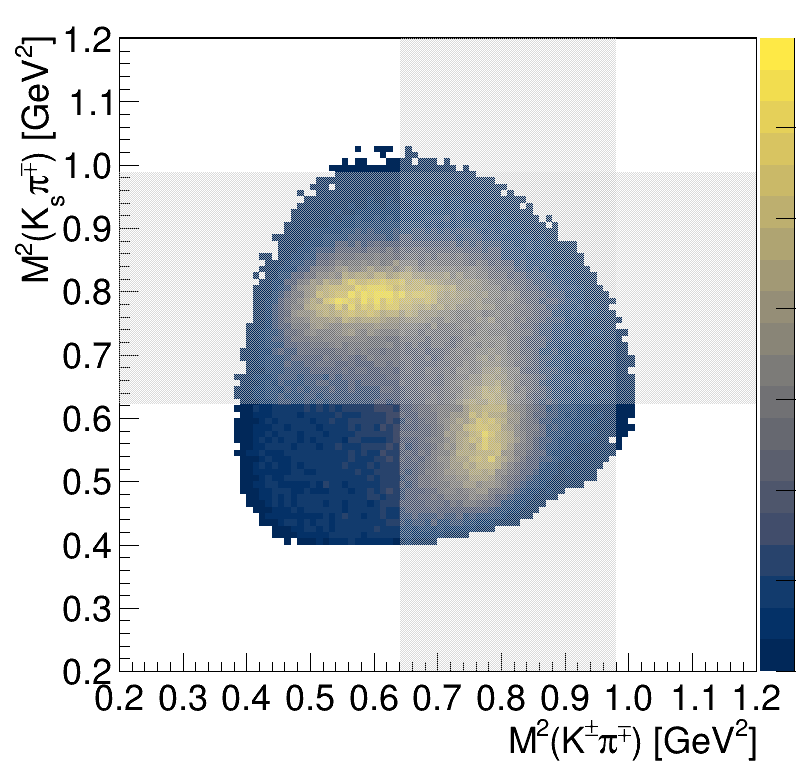

In [108]:
c.Clear()
                                                                          
hist_kstar_dalitz_pipkmks_1400.GetXaxis().SetTitle('M^{2}(K^{#pm}#pi^{#mp}) [GeV^{2}]')
hist_kstar_dalitz_pipkmks_1400.GetXaxis().SetTitleSize(0.05)
hist_kstar_dalitz_pipkmks_1400.GetXaxis().SetLabelSize(0.05)
hist_kstar_dalitz_pipkmks_1400.GetYaxis().SetTitle('M^{2}(K_{s}#pi^{#mp}) [GeV^{2}]')
hist_kstar_dalitz_pipkmks_1400.GetYaxis().SetTitleSize(0.05)
hist_kstar_dalitz_pipkmks_1400.GetYaxis().SetLabelSize(0.05)
hist_kstar_dalitz_pipkmks_1400.Draw('colz')
kstar_neutral_box.Draw()
kstar_charged_box.Draw()
c.Draw()

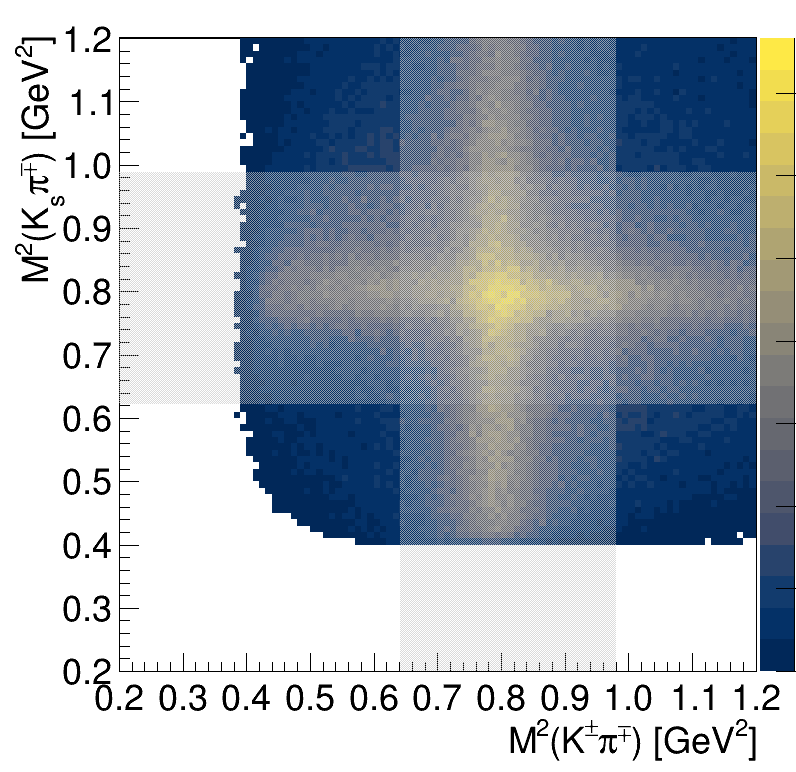

In [109]:
c.Clear()
                                                                          
hist_kstar_dalitz_pipkmks_1500.GetXaxis().SetTitle('M^{2}(K^{#pm}#pi^{#mp}) [GeV^{2}]')
hist_kstar_dalitz_pipkmks_1500.GetXaxis().SetTitleSize(0.05)
hist_kstar_dalitz_pipkmks_1500.GetXaxis().SetLabelSize(0.05)
hist_kstar_dalitz_pipkmks_1500.GetYaxis().SetTitle('M^{2}(K_{s}#pi^{#mp}) [GeV^{2}]')
hist_kstar_dalitz_pipkmks_1500.GetYaxis().SetTitleSize(0.05)
hist_kstar_dalitz_pipkmks_1500.GetYaxis().SetLabelSize(0.05)
hist_kstar_dalitz_pipkmks_1500.Draw('colz')
kstar_neutral_box.Draw()
kstar_charged_box.Draw()
c.Draw()

## $K^*$ Rejection

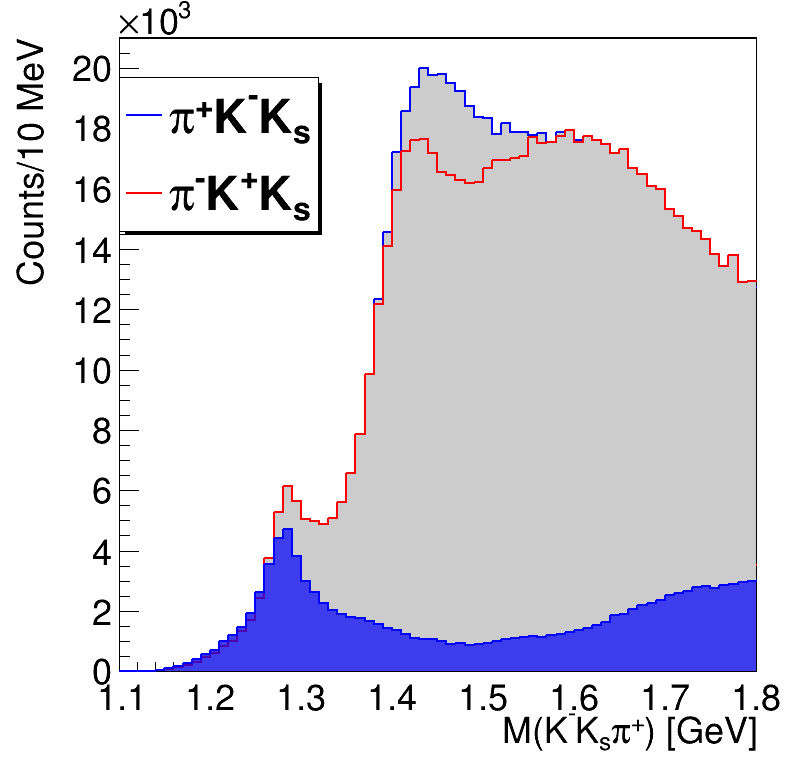

In [110]:
c.Clear()

title_hists([hist_kkpi_kstar_rejected_pipkmks, hist_kkpi_kstar_rejected_pimkpks], kkpi_xtitle, kkpi_ytitle, yoffset=1.4)

hist_kkpi_kstar_rejected_pipkmks.SetFillColorAlpha(ROOT.kBlue, 0.7)
hist_kkpi_kstar_rejected_pimkpks.SetFillColor(ROOT.kRed)
hist_kkpi_kstar_rejected_pipkmks.SetLineColor(ROOT.kBlue)
hist_kkpi_kstar_rejected_pimkpks.SetLineColor(ROOT.kRed)

sorted_kstar_reject_hists = sort_hists_by_max([hist_kkpi_kstar_rejected_pipkmks, hist_kkpi_kstar_rejected_pimkpks, hist_kkpi_no_kstar_pipkmks, hist_kkpi_no_kstar_pimkpks])

sorted_kstar_reject_hists[0].Draw()
sorted_kstar_reject_hists[2].Draw('same')
sorted_kstar_reject_hists[1].Draw('same')
sorted_kstar_reject_hists[3].Draw('same')
kkpi_legend.Draw()

c.Draw()



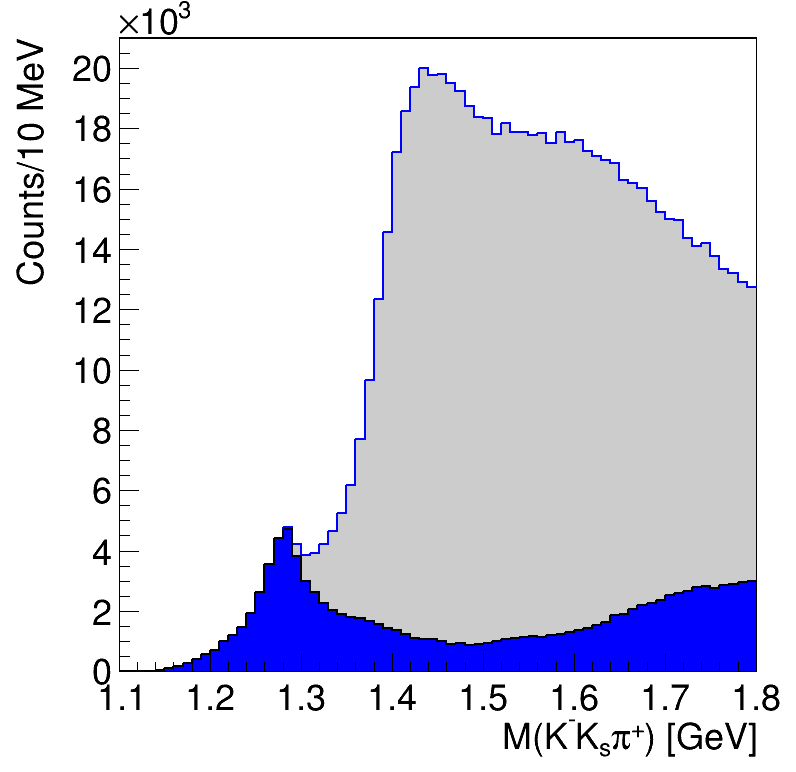

In [111]:
c.Clear()
hist_kkpi_no_kstar_pipkmks.SetFillColor(ROOT.kGray)
hist_kkpi_no_kstar_pipkmks.SetLineColor(ROOT.kBlue)
hist_kkpi_kstar_rejected_pipkmks.SetFillColor(ROOT.kBlue)
hist_kkpi_kstar_rejected_pipkmks.SetLineColor(ROOT.kBlack)

hist_kkpi_no_kstar_pipkmks.GetXaxis().SetTitleSize(0.05)
hist_kkpi_no_kstar_pipkmks.GetXaxis().SetLabelSize(0.05)
hist_kkpi_no_kstar_pipkmks.GetXaxis().SetTitleOffset(1.1)
hist_kkpi_no_kstar_pipkmks.GetYaxis().SetTitle(f'Counts/10 MeV')
hist_kkpi_no_kstar_pipkmks.GetYaxis().SetTitleSize(0.05)
hist_kkpi_no_kstar_pipkmks.GetYaxis().SetLabelSize(0.05)

hist_kkpi_no_kstar_pipkmks.Draw()
hist_kkpi_kstar_rejected_pipkmks.Draw("same")

c.Draw()
ROOT.gPad.RedrawAxis()


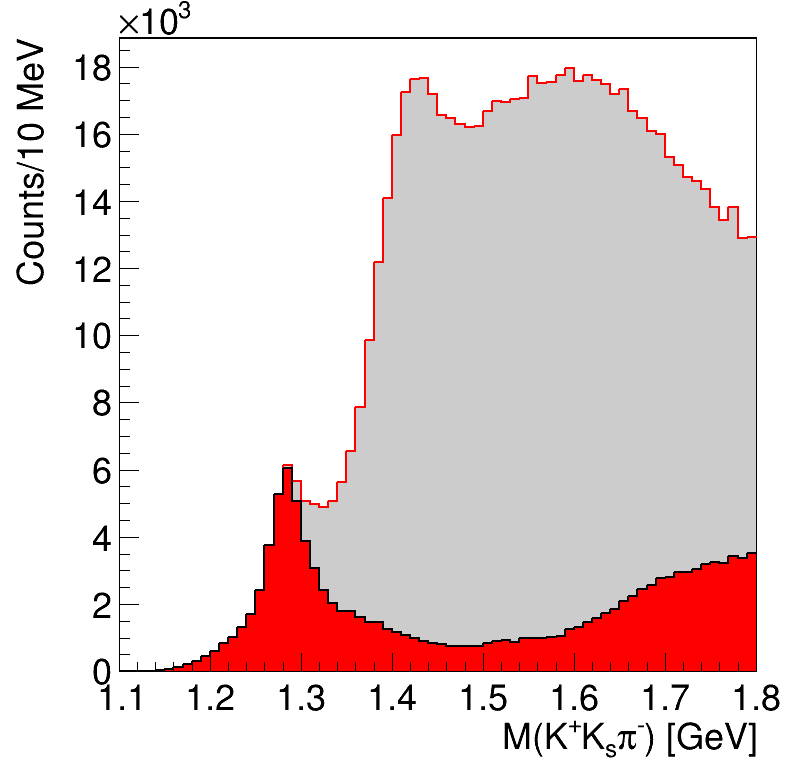

In [112]:
c.Clear()
hist_kkpi_no_kstar_pimkpks.SetFillColor(ROOT.kGray)
hist_kkpi_no_kstar_pimkpks.SetLineColor(ROOT.kRed)
hist_kkpi_kstar_rejected_pimkpks.SetFillColor(ROOT.kRed)
hist_kkpi_kstar_rejected_pimkpks.SetLineColor(ROOT.kBlack)

hist_kkpi_no_kstar_pimkpks.GetXaxis().SetTitleSize(0.05)
hist_kkpi_no_kstar_pimkpks.GetXaxis().SetLabelSize(0.05)
hist_kkpi_no_kstar_pimkpks.GetXaxis().SetTitleOffset(1.1)
hist_kkpi_no_kstar_pimkpks.GetYaxis().SetTitle(f'Counts/10 MeV')
hist_kkpi_no_kstar_pimkpks.GetYaxis().SetTitleSize(0.05)
hist_kkpi_no_kstar_pimkpks.GetYaxis().SetLabelSize(0.05)

hist_kkpi_no_kstar_pimkpks.Draw()
hist_kkpi_kstar_rejected_pimkpks.Draw("same")

c.Draw()
ROOT.gPad.RedrawAxis()


## Charged $K^*$ Selection

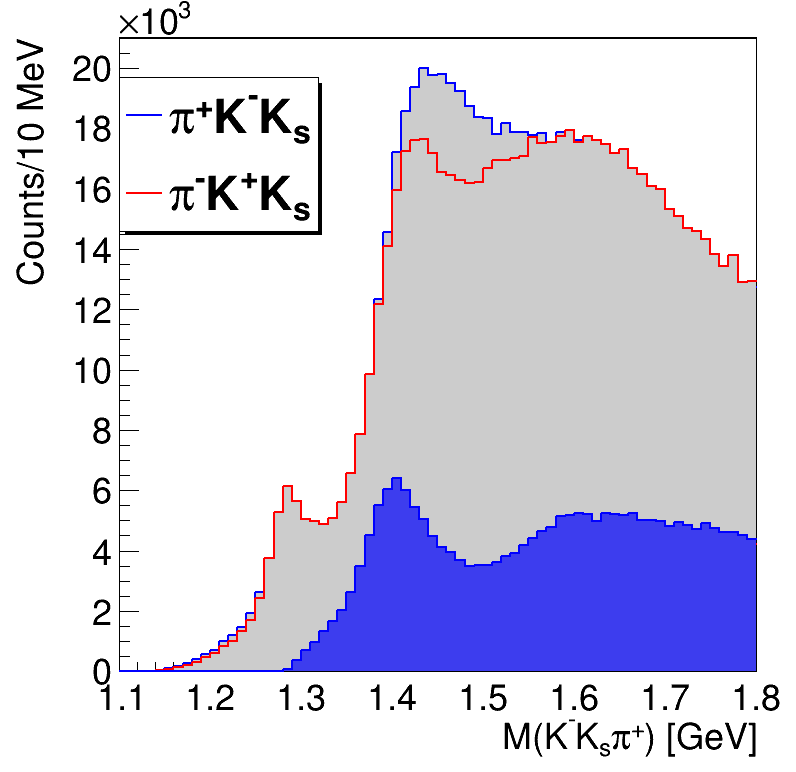

In [113]:
c.Clear()

title_hists([hist_kkpi_kstar_charged_selected_pipkmks, hist_kkpi_kstar_charged_selected_pimkpks], kkpi_xtitle, kkpi_ytitle, yoffset=1.4)

hist_kkpi_kstar_charged_selected_pipkmks.SetFillColorAlpha(ROOT.kBlue, 0.7)
hist_kkpi_kstar_charged_selected_pimkpks.SetFillColor(ROOT.kRed)
hist_kkpi_kstar_charged_selected_pipkmks.SetLineColor(ROOT.kBlue)
hist_kkpi_kstar_charged_selected_pimkpks.SetLineColor(ROOT.kRed)

sorted_kstar_select_charged_hists = sort_hists_by_max([hist_kkpi_kstar_charged_selected_pipkmks, hist_kkpi_kstar_charged_selected_pimkpks, hist_kkpi_no_kstar_pipkmks, hist_kkpi_no_kstar_pimkpks])

sorted_kstar_select_charged_hists[0].Draw()
sorted_kstar_select_charged_hists[2].Draw('same')
sorted_kstar_select_charged_hists[1].Draw('same')
sorted_kstar_select_charged_hists[3].Draw('same')
kkpi_legend.Draw()

c.Draw()

## Neutral $K^*$ Selection

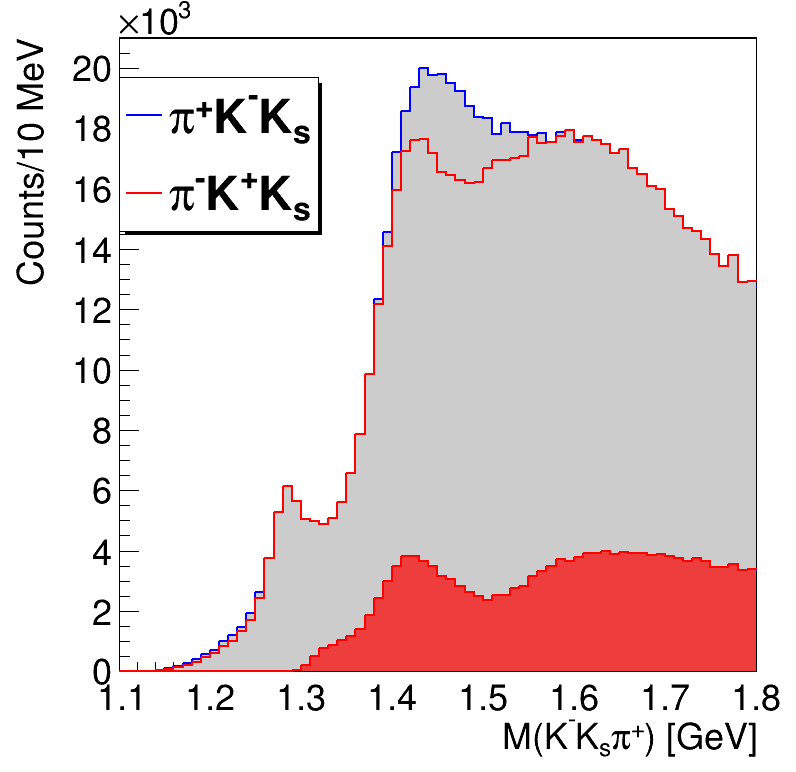

In [114]:
c.Clear()

title_hists([hist_kkpi_kstar_neutral_selected_pipkmks, hist_kkpi_kstar_neutral_selected_pimkpks], kkpi_xtitle, kkpi_ytitle, yoffset=1.4)

hist_kkpi_kstar_neutral_selected_pipkmks.SetFillColor(ROOT.kBlue)
hist_kkpi_kstar_neutral_selected_pimkpks.SetFillColorAlpha(ROOT.kRed, 0.7)
hist_kkpi_kstar_neutral_selected_pipkmks.SetLineColor(ROOT.kBlue)
hist_kkpi_kstar_neutral_selected_pimkpks.SetLineColor(ROOT.kRed)

sorted_kstar_select_neutral_hists = sort_hists_by_max([hist_kkpi_kstar_neutral_selected_pipkmks, hist_kkpi_kstar_neutral_selected_pimkpks, hist_kkpi_no_kstar_pipkmks, hist_kkpi_no_kstar_pimkpks])

sorted_kstar_select_neutral_hists[0].Draw()
sorted_kstar_select_neutral_hists[2].Draw('same')
sorted_kstar_select_neutral_hists[1].Draw('same')
sorted_kstar_select_neutral_hists[3].Draw('same')
kkpi_legend.Draw()

c.Draw()

## Phasespace efficiency for $K^*$ Rejection 

In [115]:
# code found at: /work/halld/home/viducic/scripts/crosssection/kstar_rejection_dalitz_efficiency.ipynb

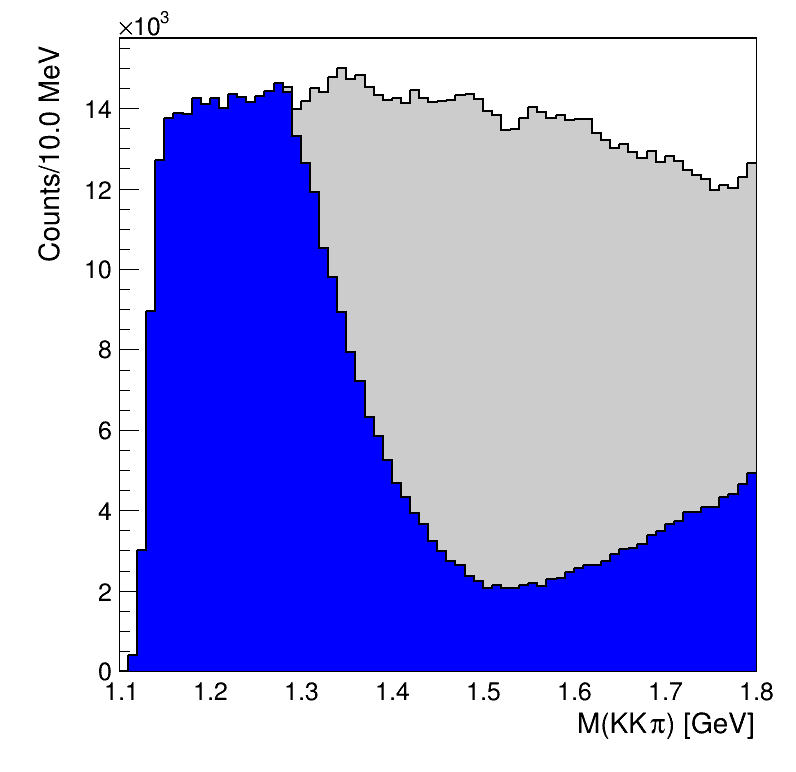

In [116]:
c.Clear()

title_hists([hist_ps_kkpi_before, hist_ps_kkpi_after], kkpi_xtitle, kkpi_ytitle, yoffset=1.4)

hist_ps_kkpi_after.SetFillColor(ROOT.kBlue)

hist_ps_kkpi_before.Draw()
hist_ps_kkpi_after.Draw('same')

c.Draw()

## $K^*$ efficiency correction thrown MC

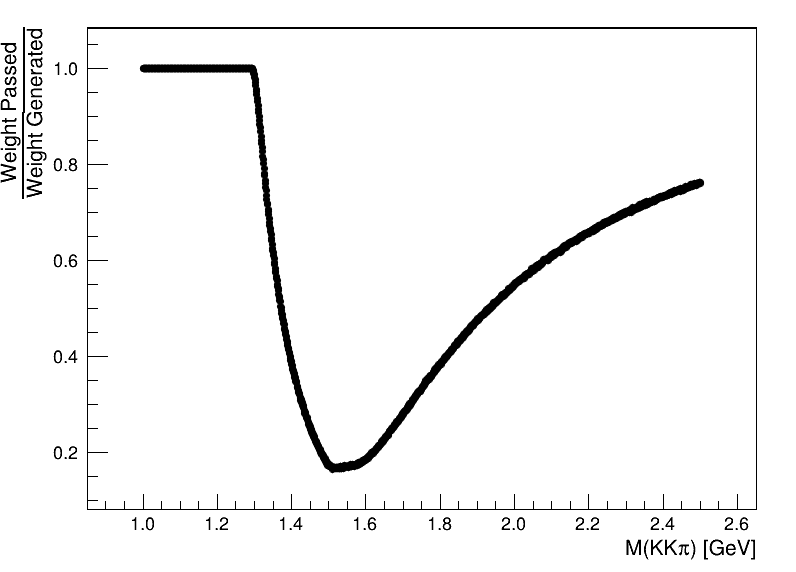

In [117]:
c.Clear()
graph.GetXaxis().SetTitle("M(KK#pi) [GeV]")
graph.GetYaxis().SetTitle("#frac{Weight Passed}{Weight Generated}")
graph.SetMarkerStyle(20)
graph.SetMarkerSize(0.75)
graph.SetMarkerColor(ROOT.kBlack)

c = ROOT.TCanvas()
graph.Draw("AP")
c.Update()
c.Draw()

## $\epsilon$ corrected $KK\pi$ Distributions 

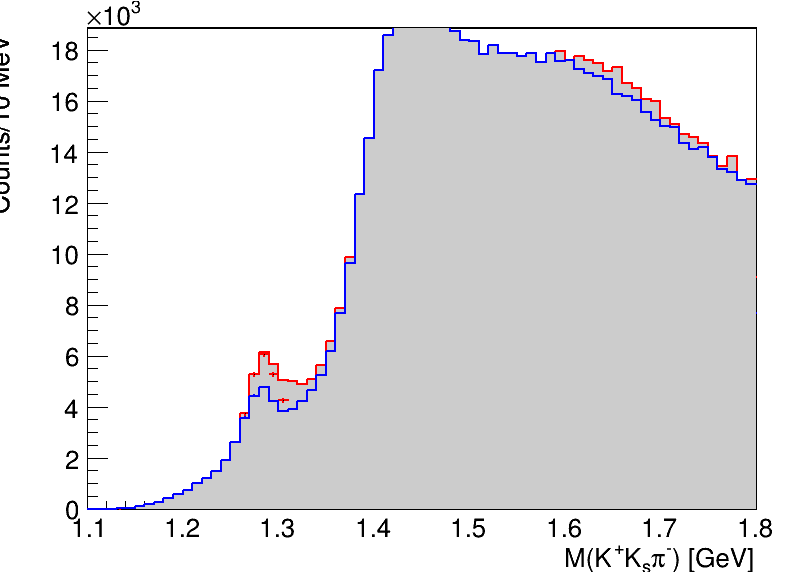

In [118]:
c.Clear()


hist_eff_corrected_pipkmks.SetLineColor(ROOT.kBlue)
hist_eff_corrected_pimkpks.SetLineColor(ROOT.kRed)

hist_eff_corrected_pimkpks.GetXaxis().SetRangeUser(1.1, 1.8)
hist_eff_corrected_pipkmks.GetXaxis().SetRangeUser(1.1, 1.8)


hist_kkpi_no_kstar_pimkpks.Draw()
hist_eff_corrected_pimkpks.Draw('same')
hist_eff_corrected_pipkmks.Draw('same')
hist_kkpi_no_kstar_pipkmks.Draw('same')


c.Draw()

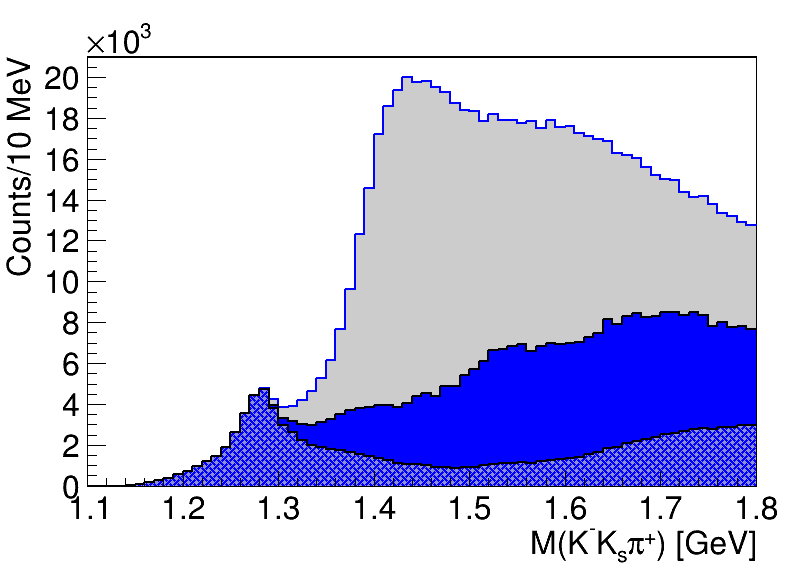

In [132]:
c.Clear()
pad = c.cd()
pad.SetTopMargin(0.1)
pad.SetBottomMargin(0.15)



hist_eff_corrected_pipkmks.GetXaxis().SetTitle('M(K^{-}K_{s}#pi^{+}) [GeV]')
hist_eff_corrected_pipkmks.GetXaxis().SetTitleSize(0.05)
hist_eff_corrected_pipkmks.GetXaxis().SetLabelSize(0.05)
hist_eff_corrected_pipkmks.GetYaxis().SetTitle('Counts/10 MeV')
hist_eff_corrected_pipkmks.GetYaxis().SetTitleSize(0.05)
hist_eff_corrected_pipkmks.GetYaxis().SetLabelSize(0.05)
hist_kkpi_kstar_rejected_pipkmks.SetFillColorAlpha(ROOT.kGray, 0.7)
hist_eff_corrected_pipkmks.SetFillColorAlpha(ROOT.kBlue, 1.0)
hist_kkpi_kstar_rejected_pipkmks.SetLineColor(ROOT.kBlack)
hist_kkpi_kstar_rejected_pipkmks.SetFillStyle(3008)
hist_eff_corrected_pipkmks.SetLineColor(ROOT.kBlack)
hist_kkpi_no_kstar_pipkmks.SetFillColor(ROOT.kGray)

hist_kkpi_no_kstar_pipkmks.GetXaxis().SetTitle('M(K^{-}K_{s}#pi^{+}) [GeV]')
hist_kkpi_no_kstar_pipkmks.GetXaxis().SetTitleSize(0.06)
hist_kkpi_no_kstar_pipkmks.GetXaxis().SetLabelSize(0.06)
hist_kkpi_no_kstar_pipkmks.GetXaxis().SetTitleOffset(1.1)
hist_kkpi_no_kstar_pipkmks.GetYaxis().SetTitleOffset(0.9)
hist_kkpi_no_kstar_pipkmks.GetYaxis().SetTitle(f'Counts/10 MeV')
hist_kkpi_no_kstar_pipkmks.GetYaxis().SetTitleSize(0.06)
hist_kkpi_no_kstar_pipkmks.GetYaxis().SetLabelSize(0.06)



hist_kkpi_no_kstar_pipkmks.Draw('hist')
hist_eff_corrected_pipkmks.Draw('same hist')
hist_kkpi_kstar_rejected_pipkmks.Draw('same hist')

# hist_kkpi_kstar_rejected_pipkmks.GetYaxis().SetRangeUser(0, 1.05*hist_eff_corrected_pipkmks.GetMaximum())
# hist_kkpi_kstar_rejected_pipkmks.Draw('hist')
# hist_eff_corrected_pipkmks.Draw('same hist')


c.Draw()
ROOT.gPad.RedrawAxis()


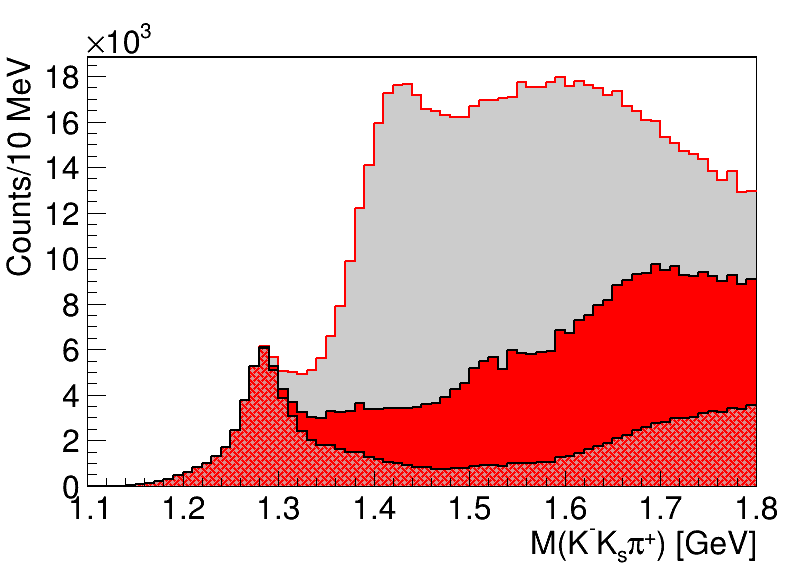

In [134]:
c.Clear()


hist_eff_corrected_pimkpks.GetXaxis().SetTitle('M(K^{+}K_{s}#pi^{-}) [GeV]')
hist_eff_corrected_pimkpks.GetYaxis().SetTitle('Counts/10 MeV')
hist_kkpi_kstar_rejected_pimkpks.SetFillColorAlpha(ROOT.kGray, 0.7)
hist_eff_corrected_pimkpks.SetFillColorAlpha(ROOT.kRed, 1.0)
hist_kkpi_kstar_rejected_pimkpks.SetLineColor(ROOT.kBlack)
hist_kkpi_kstar_rejected_pimkpks.SetFillStyle(3008)
hist_eff_corrected_pimkpks.SetLineColor(ROOT.kBlack)
hist_kkpi_no_kstar_pimkpks.SetFillColor(ROOT.kGray)

hist_kkpi_no_kstar_pimkpks.GetXaxis().SetTitle('M(K^{-}K_{s}#pi^{+}) [GeV]')
hist_kkpi_no_kstar_pimkpks.GetXaxis().SetTitleSize(0.06)
hist_kkpi_no_kstar_pimkpks.GetXaxis().SetLabelSize(0.06)
hist_kkpi_no_kstar_pimkpks.GetXaxis().SetTitleOffset(1.1)
hist_kkpi_no_kstar_pimkpks.GetYaxis().SetTitleOffset(0.9)
hist_kkpi_no_kstar_pimkpks.GetYaxis().SetTitle(f'Counts/10 MeV')
hist_kkpi_no_kstar_pimkpks.GetYaxis().SetTitleSize(0.06)
hist_kkpi_no_kstar_pimkpks.GetYaxis().SetLabelSize(0.06)


hist_kkpi_no_kstar_pimkpks.Draw('hist')
hist_eff_corrected_pimkpks.Draw('same hist')
hist_kkpi_kstar_rejected_pimkpks.Draw('same hist')

# hist_kkpi_kstar_rejected_pimkpks.GetYaxis().SetRangeUser(0, 1.05*hist_eff_corrected_pimkpks.GetMaximum())
# hist_kkpi_kstar_rejected_pimkpks.Draw('hist')
# hist_eff_corrected_pimkpks.Draw('same hist')


c.Draw()
ROOT.gPad.RedrawAxis()


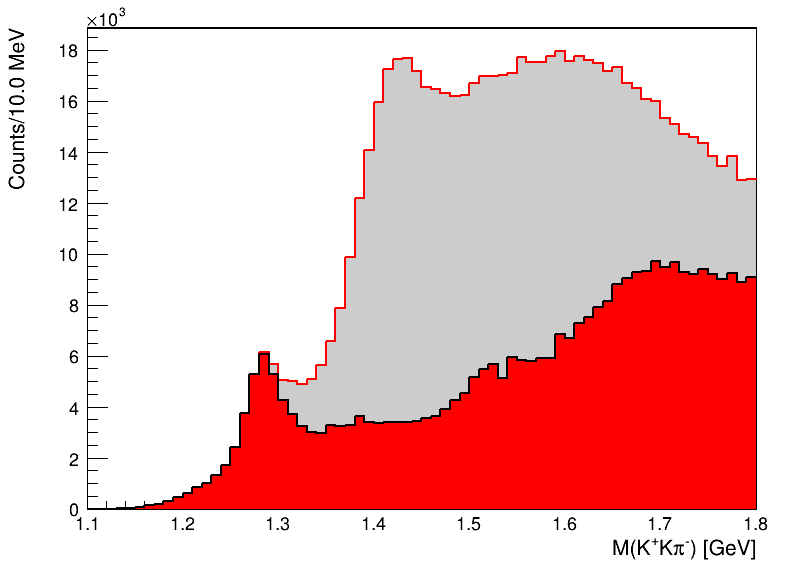

In [65]:
c.Clear()

hist_kkpi_no_kstar_pimkpks.GetXaxis().SetTitle('M(K^{+}K#pi^{-}) [GeV]')
hist_kkpi_no_kstar_pimkpks.SetFillColor(ROOT.kGray)
hist_eff_corrected_pimkpks.SetFillColor(ROOT.kRed)
hist_eff_corrected_pimkpks.SetLineColor(ROOT.kBlack)

hist_kkpi_no_kstar_pimkpks.Draw()
hist_eff_corrected_pimkpks.Draw('same hist')


c.Draw()

## Acceptance 

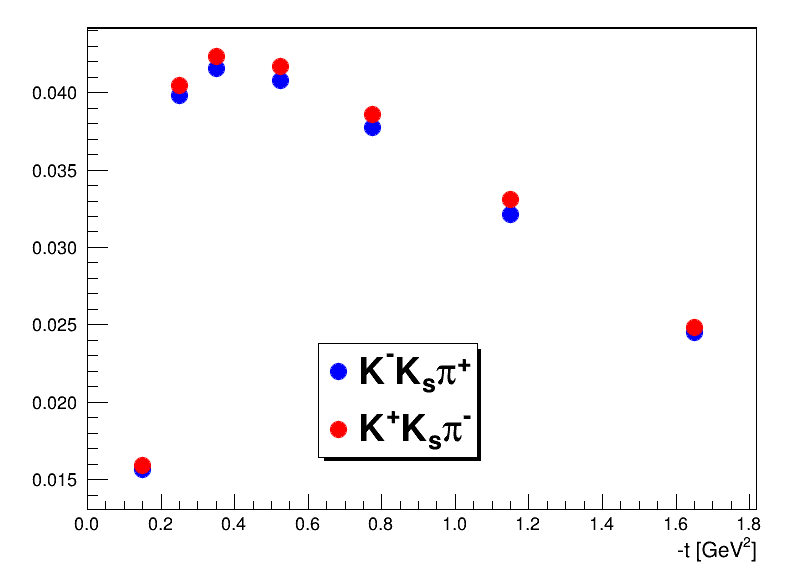

In [66]:
c.Clear()
# graph_pipkmks = ROOT.TGraphErrors()
# graph_pimkpks = ROOT.TGraphErrors()

pipkmks_bin_middles = []
pipkmks_effs = []
pimkpks_bin_middles = []
pimkpks_effs = []

for pipeff, pimeff in zip(pipkmks_eff, pimkpks_eff):

    e = pipeff[1]
    t = pipeff[2]

    if e != 8:
        continue

    t_bin_middle = (constants.T_CUT_DICT[t][0] + constants.T_CUT_DICT[t][1])/2.0
    pipkmks_effs.append(pipeff[0][0])
    pipkmks_bin_middles.append(t_bin_middle)
    pimkpks_effs.append(pimeff[0][0])
    pimkpks_bin_middles.append(t_bin_middle)

graph_pipkmks = ROOT.TGraph(len(np.array(pipkmks_bin_middles)), np.array(pipkmks_bin_middles), np.array(pipkmks_effs))
graph_pipkmks.SetMarkerSize(2)
graph_pipkmks.SetMarkerStyle(20)
graph_pipkmks.SetMarkerColor(ROOT.kBlue)

graph_pimkpks = ROOT.TGraph(len(np.array(pimkpks_bin_middles)), np.array(pimkpks_bin_middles), np.array(pimkpks_effs))
graph_pimkpks.SetMarkerSize(2)
graph_pimkpks.SetMarkerStyle(20)
graph_pimkpks.SetMarkerColor(ROOT.kRed)

acceptance_legend = ROOT.TLegend(0.4, 0.2, 0.6, 0.4)
acceptance_legend.AddEntry(graph_pipkmks, 'K^{-}K_{s}#pi^{+}', 'p')
acceptance_legend.AddEntry(graph_pimkpks, 'K^{+}K_{s}#pi^{-}', 'p')

graph_pipkmks.GetXaxis().SetRangeUser(0, 2.0)
graph_pipkmks.GetXaxis().SetTitle('-t [GeV^{2}]')
graph_pipkmks.SetTitle("E_{#gamme} = 8 GeV")
graph_pimkpks.SetTitle("E_{#gamme} = 8 GeV")

graph_pipkmks.Draw("AP")
graph_pimkpks.Draw("P")
acceptance_legend.Draw()
c.Draw()
    

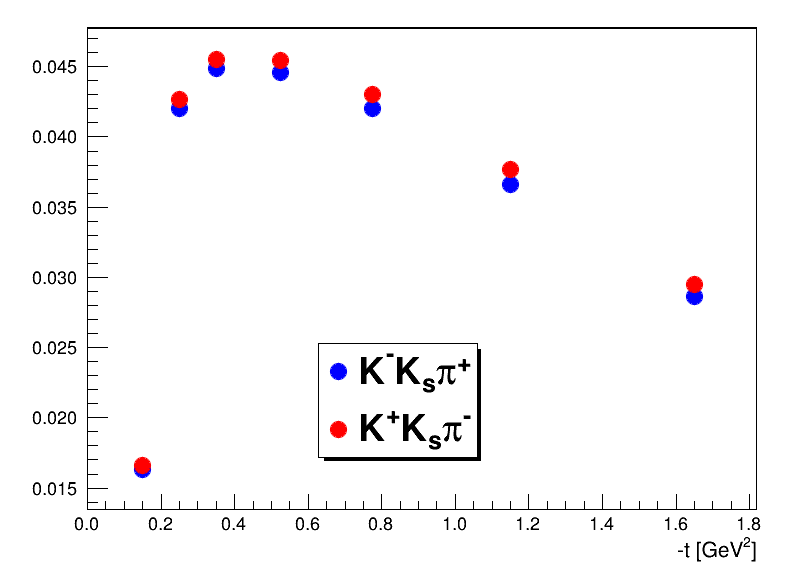

In [67]:
c.Clear()
# graph_pipkmks = ROOT.TGraphErrors()
# graph_pimkpks = ROOT.TGraphErrors()

pipkmks_bin_middles = []
pipkmks_effs = []
pimkpks_bin_middles = []
pimkpks_effs = []

for pipeff, pimeff in zip(pipkmks_eff, pimkpks_eff):

    e = pipeff[1]
    t = pipeff[2]

    if e != 9:
        continue

    t_bin_middle = (constants.T_CUT_DICT[t][0] + constants.T_CUT_DICT[t][1])/2.0
    pipkmks_effs.append(pipeff[0][0])
    pipkmks_bin_middles.append(t_bin_middle)
    pimkpks_effs.append(pimeff[0][0])
    pimkpks_bin_middles.append(t_bin_middle)

graph_pipkmks = ROOT.TGraph(len(np.array(pipkmks_bin_middles)), np.array(pipkmks_bin_middles), np.array(pipkmks_effs))
graph_pipkmks.SetMarkerSize(2)
graph_pipkmks.SetMarkerStyle(20)
graph_pipkmks.SetMarkerColor(ROOT.kBlue)

graph_pimkpks = ROOT.TGraph(len(np.array(pimkpks_bin_middles)), np.array(pimkpks_bin_middles), np.array(pimkpks_effs))
graph_pimkpks.SetMarkerSize(2)
graph_pimkpks.SetMarkerStyle(20)
graph_pimkpks.SetMarkerColor(ROOT.kRed)

acceptance_legend = ROOT.TLegend(0.4, 0.2, 0.6, 0.4)
acceptance_legend.AddEntry(graph_pipkmks, 'K^{-}K_{s}#pi^{+}', 'p')
acceptance_legend.AddEntry(graph_pimkpks, 'K^{+}K_{s}#pi^{-}', 'p')

graph_pipkmks.GetXaxis().SetRangeUser(0, 2.0)
graph_pipkmks.GetXaxis().SetTitle('-t [GeV^{2}]')
graph_pipkmks.SetTitle("E_{#gamme} = 8 GeV")
graph_pimkpks.SetTitle("E_{#gamme} = 8 GeV")

graph_pipkmks.Draw("AP")
graph_pimkpks.Draw("P")
acceptance_legend.Draw()
c.Draw()

## Data and MC Comparison

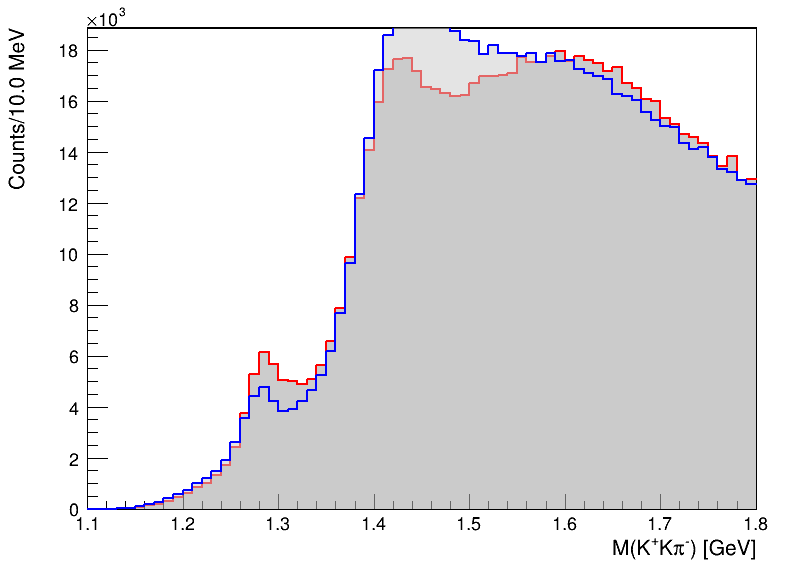

In [68]:
c.Clear()

hist_kkpi_no_kstar_pipkmks.SetFillColorAlpha(ROOT.kGray, 0.5)
hist_kkpi_no_kstar_pimkpks.Draw()
hist_kkpi_no_kstar_pipkmks.Draw('same')

c.Draw()

## $K_s$ Width Extraction

0.4785070971796697
0.516362529388674
 FCN=4537.54 FROM MIGRAD    STATUS=CONVERGED     482 CALLS         483 TOTAL
                     EDM=2.53206e-07    STRATEGY= 1  ERROR MATRIX UNCERTAINTY   2.5 per cent
  EXT PARAMETER                                   STEP         FIRST   
  NO.   NAME      VALUE            ERROR          SIZE      DERIVATIVE 
   1  p0           4.83636e+04   1.04239e+02   4.64224e-01   4.27008e-06
   2  p1           4.97023e-01   6.51154e-06   2.41321e-08  -4.38854e+01
   3  p2           6.44905e-03   1.29235e-05   8.09912e-07  -3.35364e+00
   4  p3           1.39810e+04   1.15482e+02  -6.16948e-01  -5.33885e-06
   5  p4           4.98081e-01   1.78036e-05   1.16884e-07   2.09156e+01
   6  p5           1.42002e-02   3.74445e-05   1.90370e-06  -1.87304e+00
   7  p6          -3.10147e+02   1.14841e+01  -2.50691e-02   7.37359e-05
   8  p7           2.82216e+03   2.33257e+01   4.23112e-02   3.51448e-05
                               ERR DEF= 0.5


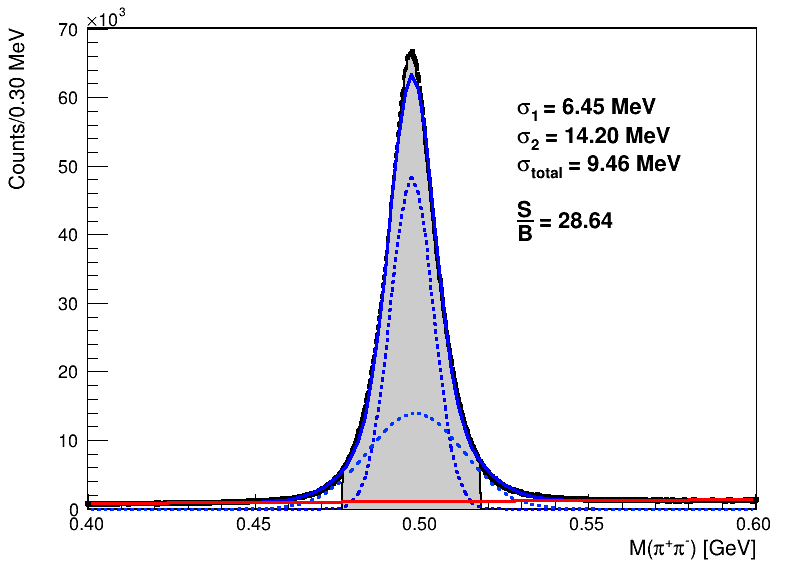

In [69]:
ks_fit = ROOT.TF1('ks_fit', '[0] * TMath::Gaus(x, [1], [2]) + [3] * TMath::Gaus(x, [4], [5]) + [6] + [7]*x', 0.4, 0.6)
ks_fit.SetParameter(0, 60000)
ks_fit.SetParameter(1, 0.5)
ks_fit.SetParameter(2, 0.01)
ks_fit.SetParLimits(2, 0.0, 1)
ks_fit.SetParameter(3, 10000)
ks_fit.SetParameter(4, 0.5)
ks_fit.SetParameter(5, 0.01)
ks_fit.SetParLimits(5, 0.0, 1)
ks_fit.SetParameter(6, 10)
ks_fit.SetParameter(7, 5000)

result = hist_ks_pipkmks_cut.Fit(ks_fit, 'LSR0')

g1 = ROOT.TF1('gaus1', '[0] * TMath::Gaus(x, [1], [2])', 0.4, 0.6)
g2 = ROOT.TF1('gaus2', '[0] * TMath::Gaus(x, [1], [2])', 0.4, 0.6)
p1 = ROOT.TF1('pol1', '[0] + [1]*x', 0.4, 0.6)

g1.SetParameters(ks_fit.GetParameter(0), ks_fit.GetParameter(1), ks_fit.GetParameter(2))
g2.SetParameters(ks_fit.GetParameter(3), ks_fit.GetParameter(4), ks_fit.GetParameter(5))
p1.SetParameters(ks_fit.GetParameter(6), ks_fit.GetParameter(7))

ks_fit.SetLineColor(ROOT.kBlue)


g1.SetLineColor(ROOT.kBlue)
g1.SetLineStyle(2)
g2.SetLineColor(ROOT.kAzure)
g2.SetLineStyle(4)
p1.SetLineColor(ROOT.kRed)

integral1 = g1.Integral(0.4, 0.6)
integral2 = g2.Integral(0.4, 0.6)
integral_bkg = p1.Integral(0.4, 0.6)

frac = integral1/(integral1 + integral2)

sigma1 = g1.GetParameter(2)
sigma2 = g2.GetParameter(2)

mean1 = g1.GetParameter(1)
mean2 = g2.GetParameter(1)

sigma_total = sigma1 * frac + sigma2 * (1.0 - frac)
mean_total = mean1 * frac + mean2 * (1.0 - frac)

int_region_low = mean_total - 2 * sigma_total
int_region_high = mean_total + 2 * sigma_total

print(int_region_low)
print(int_region_high)

s_over_b = (g1.Integral(int_region_low, int_region_high) + g2.Integral(int_region_low, int_region_high))/p1.Integral(int_region_low, int_region_high)

c.Clear()
hist_ks_pipkmks_cut.SetFillColor(ROOT.kWhite)
hist_ks_pipkmks_cut.SetLineWidth(5)
hist_ks_pipkmks_cut.GetXaxis().SetRangeUser(0.4, 0.6)
hist_ks_pipkmks_cut.Draw("E1")
hist_ks_pipkmks_cut_2.Draw("same")
ks_fit.Draw('same')
g1.Draw('same')
g2.Draw('same')
p1.Draw('same')

fit_params = ROOT.TLatex()
fit_params.SetTextSize(0.0425)
fit_params.DrawLatexNDC(0.65, 0.8, "#sigma_{1} = " + '{:.2f}'.format(sigma1 * 1000) + ' MeV')
fit_params.DrawLatexNDC(0.65, 0.75, "#sigma_{2} = " + '{:.2f}'.format(sigma2 * 1000) + ' MeV')
fit_params.DrawLatexNDC(0.65, 0.7, "#sigma_{total} = " + '{:.2f}'.format(sigma_total * 1000) + ' MeV')
fit_params.DrawLatexNDC(0.65, 0.6, "#frac{S}{B} = " + '{:.2f}'.format(s_over_b))

c.Draw()

## Selected Binned Fit Examples

In [70]:
print("fuck you idiot.")

fuck you idiot.


## Systematic Variations

In [71]:
sys_hist_filename = '/work/halld/home/viducic/systematic_errors/hists_to_show_variations_{}.root'
variations = ['kinfit_cl', 'pathlength', 'ks_m', 'ppi', 'kp', 'ksp', 'pp', 'neutral_kstar', 'charged_kstar', 'mx2_all']
root_file_pipkmks = ROOT.TFile.Open(sys_hist_filename.format('pipkmks'))
root_file_pimkpks = ROOT.TFile.Open(sys_hist_filename.format('pimkpks'))
sys_hist_dict_pipkmks = {}
sys_hist_dict_pimkpks = {}
for var in variations:
    hist_pipkmks = root_file_pipkmks.Get(var)
    hist_pimkpks = root_file_pimkpks.Get(var)
    hist_pipkmks.SetDirectory(0)
    hist_pipkmks.SetFillColor(ROOT.kGray)
    hist_pimkpks.SetDirectory(0)
    hist_pimkpks.SetFillColor(ROOT.kGray)
    hist_pimkpks.SetLineColor(ROOT.kRed)
    sys_hist_dict_pipkmks[var] = hist_pipkmks
    sys_hist_dict_pimkpks[var] = hist_pimkpks
root_file_pipkmks.Close()
root_file_pimkpks.Close()


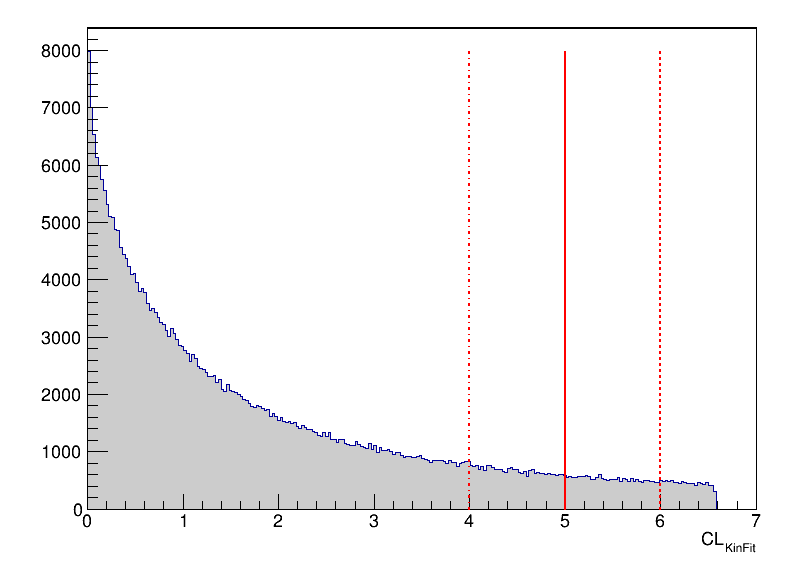

In [72]:
c.Clear()

var_cut = 'kinfit_cl'
sys_hist_dict_pipkmks[var_cut].Draw()
c.Update()
nominal, loose, tight = 5, 6, 4
line_nominal = ROOT.TLine(nominal, sys_hist_dict_pipkmks[var_cut].GetMinimum(), nominal, sys_hist_dict_pipkmks[var_cut].GetMaximum())
line_nominal.SetLineColor(ROOT.kRed)
line_nominal.SetLineWidth(2)
line_loose = ROOT.TLine(loose, sys_hist_dict_pipkmks[var_cut].GetMinimum(), loose, sys_hist_dict_pipkmks[var_cut].GetMaximum())
line_loose.SetLineStyle(2)
line_loose.SetLineColor(ROOT.kRed)
line_loose.SetLineWidth(2)
line_tight = ROOT.TLine(tight, sys_hist_dict_pipkmks[var_cut].GetMinimum(), tight, sys_hist_dict_pipkmks[var_cut].GetMaximum())
line_tight.SetLineStyle(4)
line_tight.SetLineColor(ROOT.kRed)
line_tight.SetLineWidth(2)
line_nominal.Draw()
line_loose.Draw()
line_tight.Draw()

c.Draw()

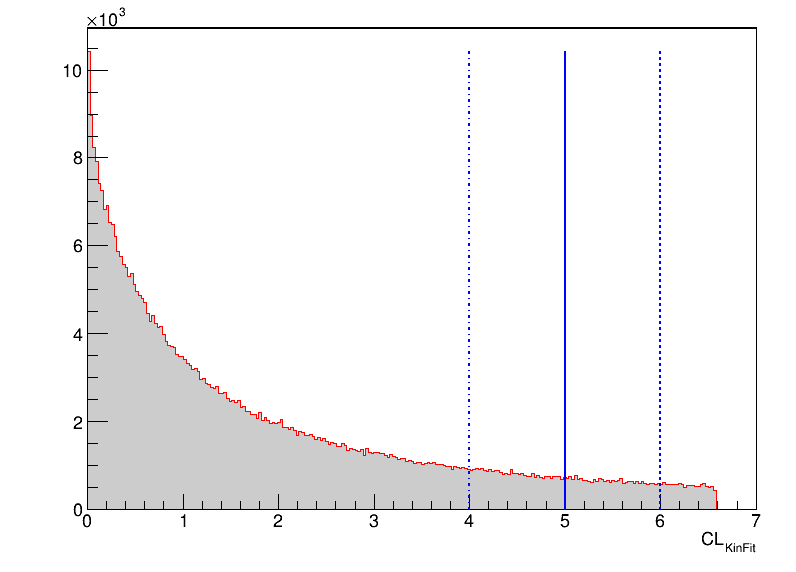

In [73]:
c.Clear()

var_cut = 'kinfit_cl'
sys_hist_dict_pimkpks[var_cut].Draw()
c.Update()
nominal, loose, tight = 5, 6, 4
line_nominal = ROOT.TLine(nominal, sys_hist_dict_pimkpks[var_cut].GetMinimum(), nominal, sys_hist_dict_pimkpks[var_cut].GetMaximum())
line_nominal.SetLineColor(ROOT.kBlue)
line_nominal.SetLineWidth(2)
line_loose = ROOT.TLine(loose, sys_hist_dict_pimkpks[var_cut].GetMinimum(), loose, sys_hist_dict_pimkpks[var_cut].GetMaximum())
line_loose.SetLineStyle(2)
line_loose.SetLineColor(ROOT.kBlue)
line_loose.SetLineWidth(2)
line_tight = ROOT.TLine(tight, sys_hist_dict_pimkpks[var_cut].GetMinimum(), tight, sys_hist_dict_pimkpks[var_cut].GetMaximum())
line_tight.SetLineStyle(4)
line_tight.SetLineColor(ROOT.kBlue)
line_tight.SetLineWidth(2)
line_nominal.Draw()
line_loose.Draw()
line_tight.Draw()

c.Draw()

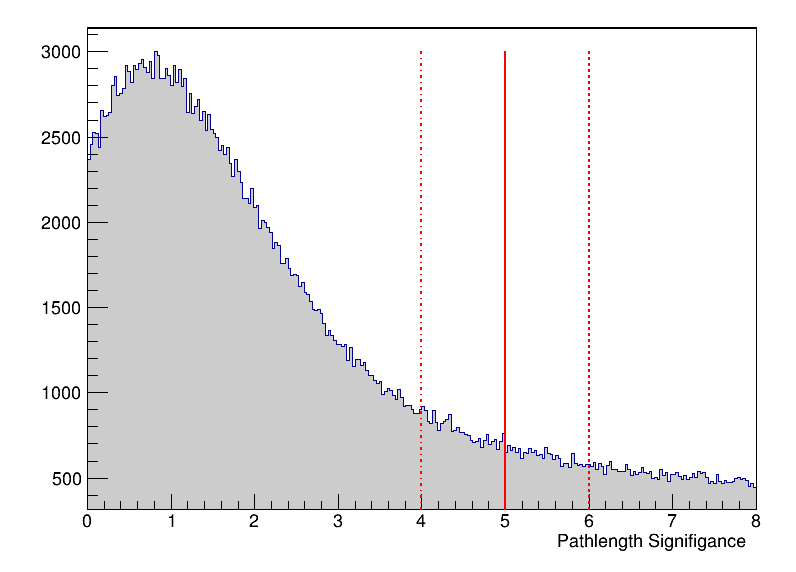

In [74]:
c.Clear()

var_cut = 'pathlength'
sys_hist_dict_pipkmks[var_cut].Draw()
c.Update()
nominal, loose, tight = 5, 6, 4
line_nominal = ROOT.TLine(nominal, ROOT.gPad.GetUymin(), nominal, sys_hist_dict_pipkmks[var_cut].GetMaximum())
line_nominal.SetLineColor(ROOT.kRed)
line_nominal.SetLineWidth(2)
line_loose = ROOT.TLine(loose, ROOT.gPad.GetUymin(), loose, sys_hist_dict_pipkmks[var_cut].GetMaximum())
line_loose.SetLineStyle(2)
line_loose.SetLineColor(ROOT.kRed)
line_loose.SetLineWidth(2)
line_tight = ROOT.TLine(tight, ROOT.gPad.GetUymin(), tight, sys_hist_dict_pipkmks[var_cut].GetMaximum())
line_tight.SetLineStyle(4)
line_tight.SetLineColor(ROOT.kRed)
line_tight.SetLineWidth(2)
line_nominal.Draw()
line_loose.Draw()
line_tight.Draw()

c.Draw()

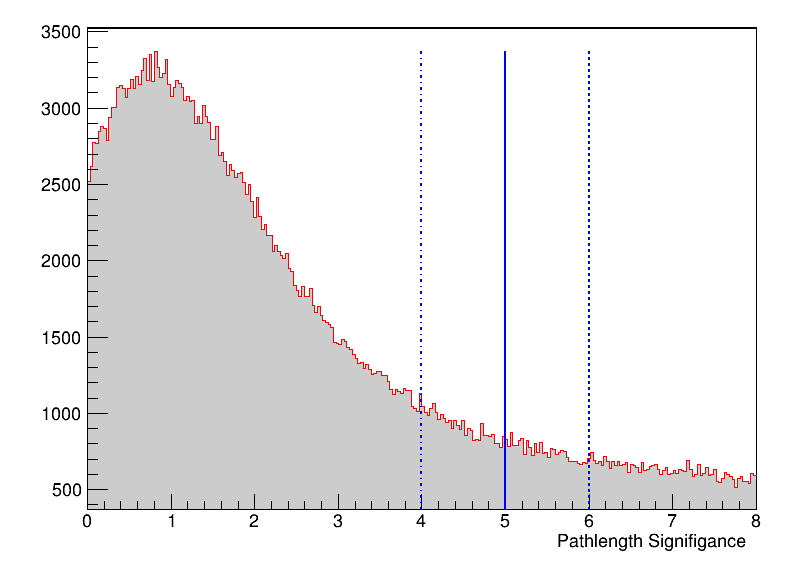

In [75]:
c.Clear()

var_cut = 'pathlength'
sys_hist_dict_pimkpks[var_cut].Draw()
c.Update()
nominal, loose, tight = 5, 6, 4
line_nominal = ROOT.TLine(nominal, ROOT.gPad.GetUymin(), nominal, sys_hist_dict_pimkpks[var_cut].GetMaximum())
line_nominal.SetLineColor(ROOT.kBlue)
line_nominal.SetLineWidth(2)
line_loose = ROOT.TLine(loose, ROOT.gPad.GetUymin(), loose, sys_hist_dict_pimkpks[var_cut].GetMaximum())
line_loose.SetLineStyle(2)
line_loose.SetLineColor(ROOT.kBlue)
line_loose.SetLineWidth(2)
line_tight = ROOT.TLine(tight, ROOT.gPad.GetUymin(), tight, sys_hist_dict_pimkpks[var_cut].GetMaximum())
line_tight.SetLineStyle(4)
line_tight.SetLineColor(ROOT.kBlue)
line_tight.SetLineWidth(2)
line_nominal.Draw()
line_loose.Draw()
line_tight.Draw()

c.Draw()

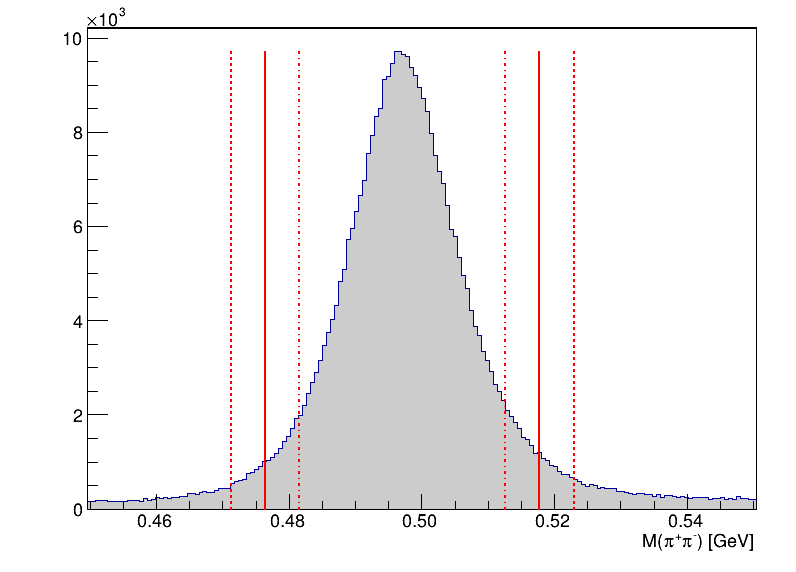

In [76]:
c.Clear()

var_cut = 'ks_m'
sys_hist_dict_pipkmks[var_cut].GetXaxis().SetRangeUser(0.45, 0.55)
sys_hist_dict_pipkmks[var_cut].Draw()
c.Update()
nominal, loose, tight = constants.KSHORT_FIT_MEAN + 2*constants.KSHORT_FIT_WIDTH, constants.KSHORT_FIT_MEAN + 2.5*constants.KSHORT_FIT_WIDTH, constants.KSHORT_FIT_MEAN + 1.5*constants.KSHORT_FIT_WIDTH
nominal_left, loose_left, tight_left = constants.KSHORT_FIT_MEAN - 2*constants.KSHORT_FIT_WIDTH, constants.KSHORT_FIT_MEAN - 2.5*constants.KSHORT_FIT_WIDTH, constants.KSHORT_FIT_MEAN - 1.5*constants.KSHORT_FIT_WIDTH
line_nominal = ROOT.TLine(nominal, ROOT.gPad.GetUymin(), nominal, sys_hist_dict_pipkmks[var_cut].GetMaximum())
line_nominal.SetLineColor(ROOT.kRed)
line_nominal.SetLineWidth(2)
line_nominal_left = ROOT.TLine(nominal_left, ROOT.gPad.GetUymin(), nominal_left, sys_hist_dict_pipkmks[var_cut].GetMaximum())
line_nominal_left.SetLineColor(ROOT.kRed)
line_nominal_left.SetLineWidth(2)
line_loose = ROOT.TLine(loose, ROOT.gPad.GetUymin(), loose, sys_hist_dict_pipkmks[var_cut].GetMaximum())
line_loose.SetLineStyle(2)
line_loose.SetLineColor(ROOT.kRed)
line_loose.SetLineWidth(2)
line_loose_left = ROOT.TLine(loose_left, ROOT.gPad.GetUymin(), loose_left, sys_hist_dict_pipkmks[var_cut].GetMaximum())
line_loose_left.SetLineStyle(2)
line_loose_left.SetLineColor(ROOT.kRed)
line_loose_left.SetLineWidth(2)
line_tight = ROOT.TLine(tight, ROOT.gPad.GetUymin(), tight, sys_hist_dict_pipkmks[var_cut].GetMaximum())
line_tight.SetLineStyle(4)
line_tight.SetLineColor(ROOT.kRed)
line_tight.SetLineWidth(2)
line_tight_left = ROOT.TLine(tight_left, ROOT.gPad.GetUymin(), tight_left, sys_hist_dict_pipkmks[var_cut].GetMaximum())
line_tight_left.SetLineStyle(4)
line_tight_left.SetLineColor(ROOT.kRed)
line_tight_left.SetLineWidth(2)
line_nominal.Draw()
line_nominal_left.Draw()
line_loose.Draw()
line_loose_left.Draw()
line_tight.Draw()
line_tight_left.Draw()
c.Update()
c.Draw()

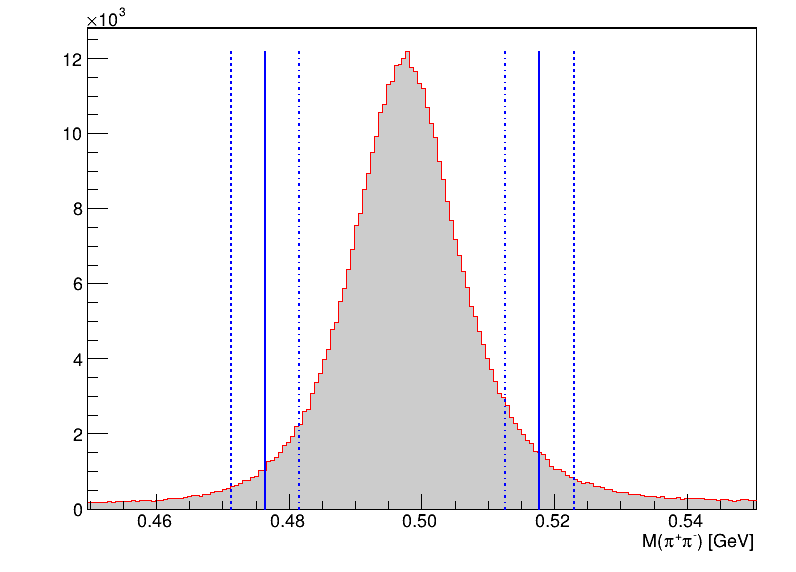

In [77]:
var_cut = 'ks_m'
sys_hist_dict_pimkpks[var_cut].GetXaxis().SetRangeUser(0.45, 0.55)
sys_hist_dict_pimkpks[var_cut].Draw()
c.Update()
nominal, loose, tight = constants.KSHORT_FIT_MEAN + 2*constants.KSHORT_FIT_WIDTH, constants.KSHORT_FIT_MEAN + 2.5*constants.KSHORT_FIT_WIDTH, constants.KSHORT_FIT_MEAN + 1.5*constants.KSHORT_FIT_WIDTH
nominal_left, loose_left, tight_left = constants.KSHORT_FIT_MEAN - 2*constants.KSHORT_FIT_WIDTH, constants.KSHORT_FIT_MEAN - 2.5*constants.KSHORT_FIT_WIDTH, constants.KSHORT_FIT_MEAN - 1.5*constants.KSHORT_FIT_WIDTH
line_nominal = ROOT.TLine(nominal, ROOT.gPad.GetUymin(), nominal, sys_hist_dict_pimkpks[var_cut].GetMaximum())
line_nominal.SetLineColor(ROOT.kBlue)
line_nominal.SetLineWidth(2)
line_nominal_left = ROOT.TLine(nominal_left, ROOT.gPad.GetUymin(), nominal_left, sys_hist_dict_pimkpks[var_cut].GetMaximum())
line_nominal_left.SetLineColor(ROOT.kBlue)
line_nominal_left.SetLineWidth(2)
line_loose = ROOT.TLine(loose, ROOT.gPad.GetUymin(), loose, sys_hist_dict_pimkpks[var_cut].GetMaximum())
line_loose.SetLineStyle(2)
line_loose.SetLineColor(ROOT.kBlue)
line_loose.SetLineWidth(2)
line_loose_left = ROOT.TLine(loose_left, ROOT.gPad.GetUymin(), loose_left, sys_hist_dict_pimkpks[var_cut].GetMaximum())
line_loose_left.SetLineStyle(2)
line_loose_left.SetLineColor(ROOT.kBlue)
line_loose_left.SetLineWidth(2)
line_tight = ROOT.TLine(tight, ROOT.gPad.GetUymin(), tight, sys_hist_dict_pimkpks[var_cut].GetMaximum())
line_tight.SetLineStyle(4)
line_tight.SetLineColor(ROOT.kBlue)
line_tight.SetLineWidth(2)
line_tight_left = ROOT.TLine(tight_left, ROOT.gPad.GetUymin(), tight_left, sys_hist_dict_pimkpks[var_cut].GetMaximum())
line_tight_left.SetLineStyle(4)
line_tight_left.SetLineColor(ROOT.kBlue)
line_tight_left.SetLineWidth(2)
line_nominal.Draw()
line_nominal_left.Draw()
line_loose.Draw()
line_loose_left.Draw()
line_tight.Draw()
line_tight_left.Draw()
c.Update()
c.Draw()

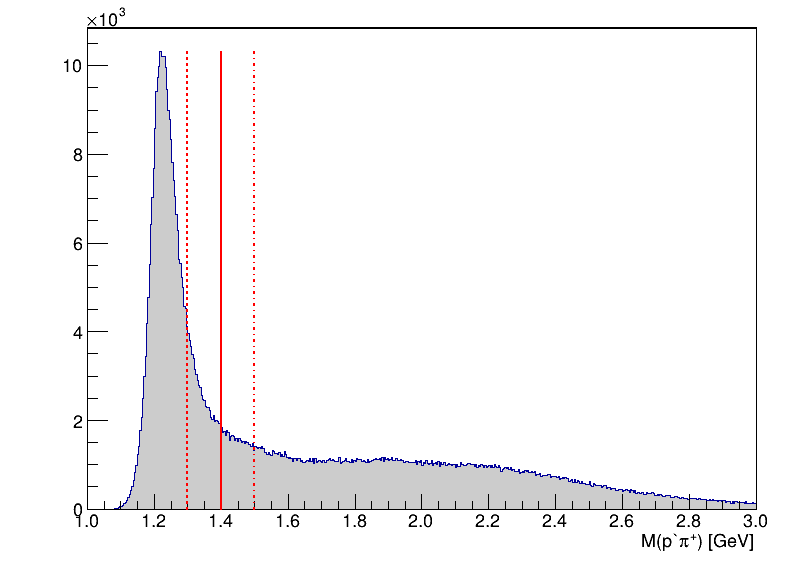

In [78]:
c.Clear()

var_cut = 'ppi'
sys_hist_dict_pipkmks[var_cut].Draw()
c.Update()
nominal, loose, tight = 1.4, 1.3, 1.5
line_nominal = ROOT.TLine(nominal, ROOT.gPad.GetUymin(), nominal, sys_hist_dict_pipkmks[var_cut].GetMaximum())
line_nominal.SetLineColor(ROOT.kRed)
line_nominal.SetLineWidth(2)
line_loose = ROOT.TLine(loose, ROOT.gPad.GetUymin(), loose, sys_hist_dict_pipkmks[var_cut].GetMaximum())
line_loose.SetLineStyle(2)
line_loose.SetLineColor(ROOT.kRed)
line_loose.SetLineWidth(2)
line_tight = ROOT.TLine(tight, ROOT.gPad.GetUymin(), tight, sys_hist_dict_pipkmks[var_cut].GetMaximum())
line_tight.SetLineStyle(4)
line_tight.SetLineColor(ROOT.kRed)
line_tight.SetLineWidth(2)
line_nominal.Draw()
line_loose.Draw()
line_tight.Draw()

c.Draw()

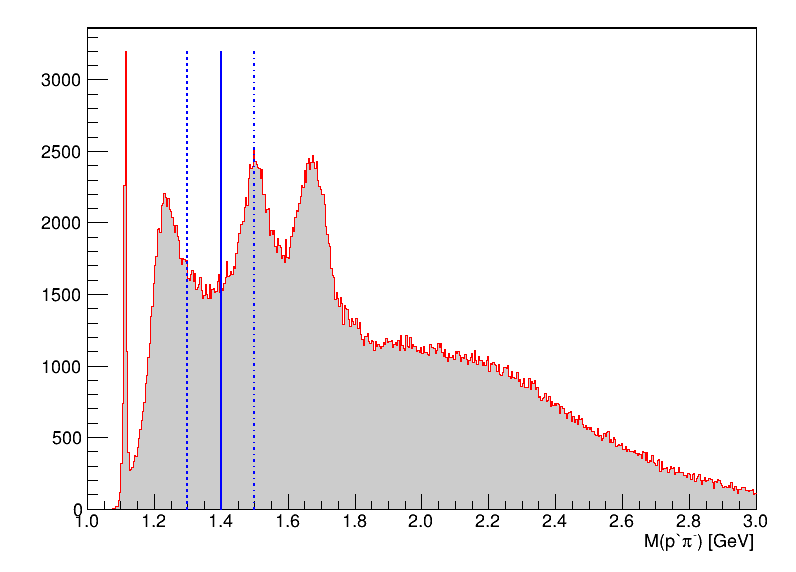

In [79]:
c.Clear()

var_cut = 'ppi'
sys_hist_dict_pimkpks[var_cut].Draw()
c.Update()
nominal, loose, tight = 1.4, 1.3, 1.5
line_nominal = ROOT.TLine(nominal, ROOT.gPad.GetUymin(), nominal, sys_hist_dict_pimkpks[var_cut].GetMaximum())
line_nominal.SetLineColor(ROOT.kBlue)
line_nominal.SetLineWidth(2)
line_loose = ROOT.TLine(loose, ROOT.gPad.GetUymin(), loose, sys_hist_dict_pimkpks[var_cut].GetMaximum())
line_loose.SetLineStyle(2)
line_loose.SetLineColor(ROOT.kBlue)
line_loose.SetLineWidth(2)
line_tight = ROOT.TLine(tight, ROOT.gPad.GetUymin(), tight, sys_hist_dict_pimkpks[var_cut].GetMaximum())
line_tight.SetLineStyle(4)
line_tight.SetLineColor(ROOT.kBlue)
line_tight.SetLineWidth(2)
line_nominal.Draw()
line_loose.Draw()
line_tight.Draw()

c.Draw()

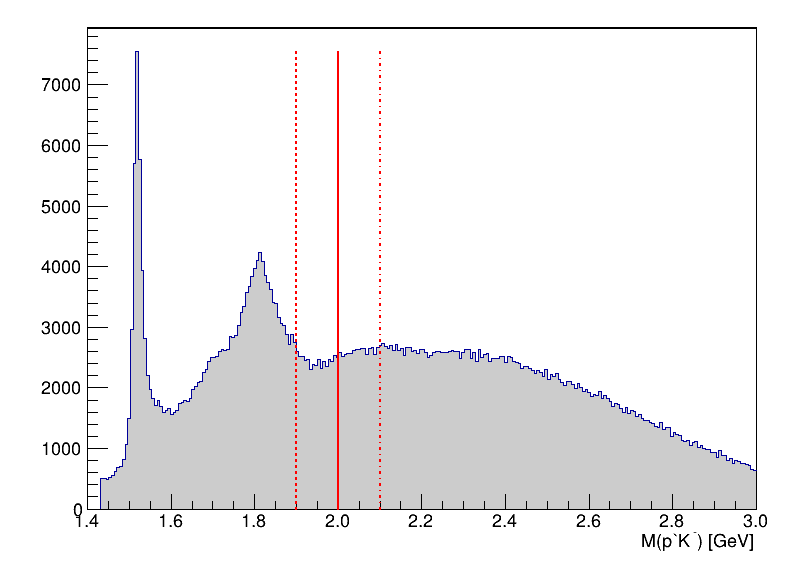

In [80]:
c.Clear()

var_cut = 'kp'
sys_hist_dict_pipkmks[var_cut].Draw()
c.Update()
nominal, loose, tight = 2.0, 1.9, 2.1
line_nominal = ROOT.TLine(nominal, ROOT.gPad.GetUymin(), nominal, sys_hist_dict_pipkmks[var_cut].GetMaximum())
line_nominal.SetLineColor(ROOT.kRed)
line_nominal.SetLineWidth(2)
line_loose = ROOT.TLine(loose, ROOT.gPad.GetUymin(), loose, sys_hist_dict_pipkmks[var_cut].GetMaximum())
line_loose.SetLineStyle(2)
line_loose.SetLineColor(ROOT.kRed)
line_loose.SetLineWidth(2)
line_tight = ROOT.TLine(tight, ROOT.gPad.GetUymin(), tight, sys_hist_dict_pipkmks[var_cut].GetMaximum())
line_tight.SetLineStyle(4)
line_tight.SetLineColor(ROOT.kRed)
line_tight.SetLineWidth(2)
line_nominal.Draw()
line_loose.Draw()
line_tight.Draw()

c.Draw()

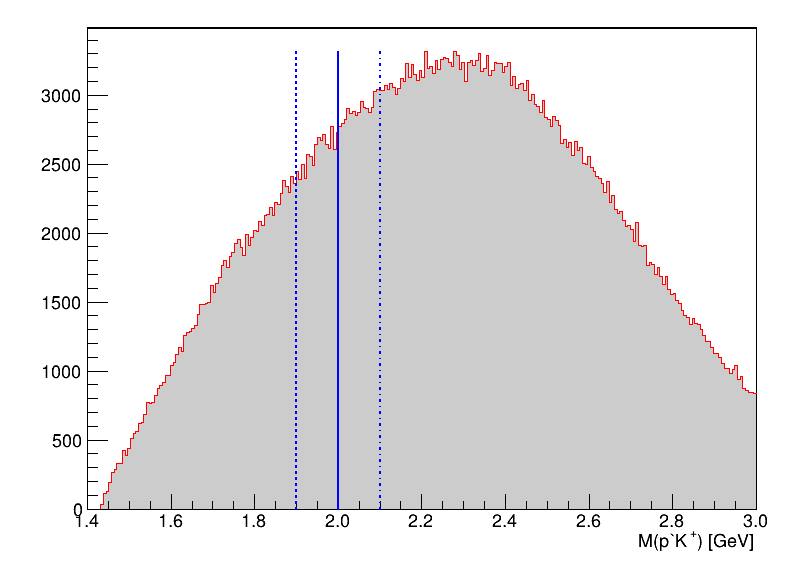

In [81]:
c.Clear()

var_cut = 'kp'
sys_hist_dict_pimkpks[var_cut].Draw()
c.Update()
nominal, loose, tight = 2.0, 1.9, 2.1
line_nominal = ROOT.TLine(nominal, ROOT.gPad.GetUymin(), nominal, sys_hist_dict_pimkpks[var_cut].GetMaximum())
line_nominal.SetLineColor(ROOT.kBlue)
line_nominal.SetLineWidth(2)
line_loose = ROOT.TLine(loose, ROOT.gPad.GetUymin(), loose, sys_hist_dict_pimkpks[var_cut].GetMaximum())
line_loose.SetLineStyle(2)
line_loose.SetLineColor(ROOT.kBlue)
line_loose.SetLineWidth(2)
line_tight = ROOT.TLine(tight, ROOT.gPad.GetUymin(), tight, sys_hist_dict_pimkpks[var_cut].GetMaximum())
line_tight.SetLineStyle(4)
line_tight.SetLineColor(ROOT.kBlue)
line_tight.SetLineWidth(2)
line_nominal.Draw()
line_loose.Draw()
line_tight.Draw()

c.Draw()

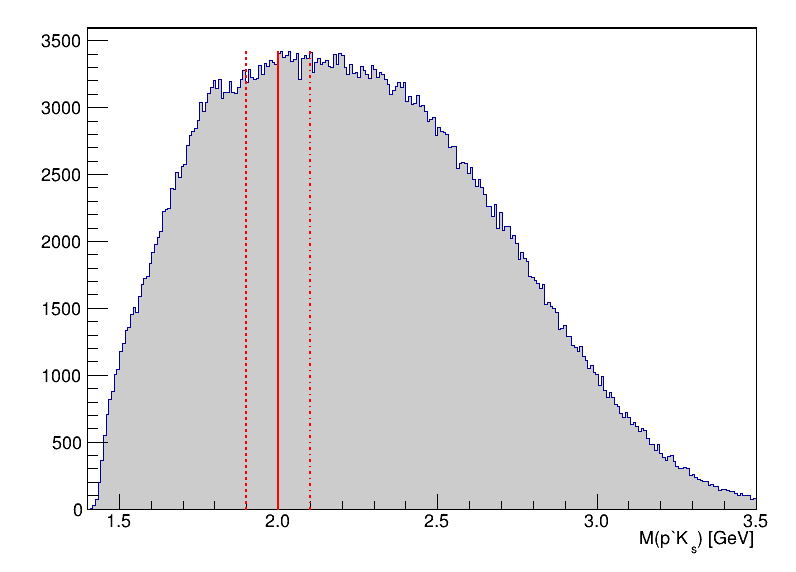

In [82]:
c.Clear()

var_cut = 'ksp'
sys_hist_dict_pipkmks[var_cut].Draw()
c.Update()
nominal, loose, tight = 2.0, 1.9, 2.1
line_nominal = ROOT.TLine(nominal, ROOT.gPad.GetUymin(), nominal, sys_hist_dict_pipkmks[var_cut].GetMaximum())
line_nominal.SetLineColor(ROOT.kRed)
line_nominal.SetLineWidth(2)
line_loose = ROOT.TLine(loose, ROOT.gPad.GetUymin(), loose, sys_hist_dict_pipkmks[var_cut].GetMaximum())
line_loose.SetLineStyle(2)
line_loose.SetLineColor(ROOT.kRed)
line_loose.SetLineWidth(2)
line_tight = ROOT.TLine(tight, ROOT.gPad.GetUymin(), tight, sys_hist_dict_pipkmks[var_cut].GetMaximum())
line_tight.SetLineStyle(4)
line_tight.SetLineColor(ROOT.kRed)
line_tight.SetLineWidth(2)
line_nominal.Draw()
line_loose.Draw()
line_tight.Draw()

c.Draw()

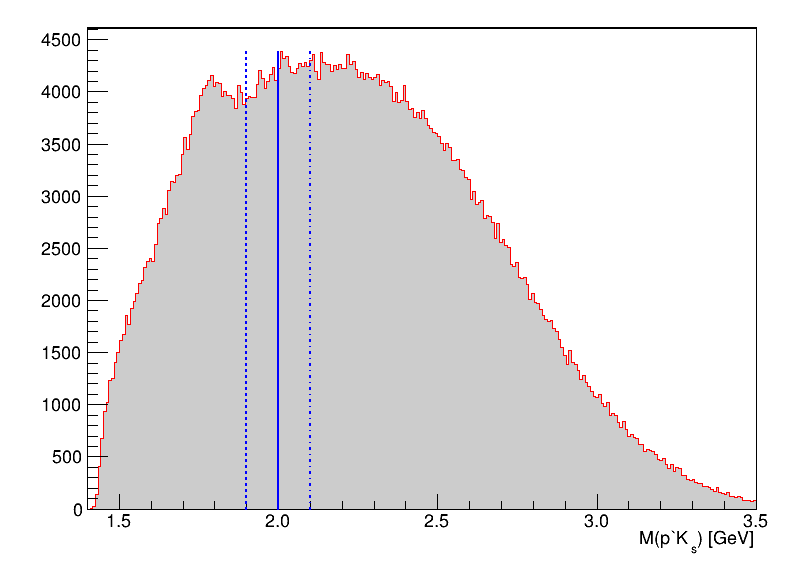

In [83]:
c.Clear()

var_cut = 'ksp'
sys_hist_dict_pimkpks[var_cut].Draw()
c.Update()
nominal, loose, tight = 2.0, 1.9, 2.1
line_nominal = ROOT.TLine(nominal, ROOT.gPad.GetUymin(), nominal, sys_hist_dict_pimkpks[var_cut].GetMaximum())
line_nominal.SetLineColor(ROOT.kBlue)
line_nominal.SetLineWidth(2)
line_loose = ROOT.TLine(loose, ROOT.gPad.GetUymin(), loose, sys_hist_dict_pimkpks[var_cut].GetMaximum())
line_loose.SetLineStyle(2)
line_loose.SetLineColor(ROOT.kBlue)
line_loose.SetLineWidth(2)
line_tight = ROOT.TLine(tight, ROOT.gPad.GetUymin(), tight, sys_hist_dict_pimkpks[var_cut].GetMaximum())
line_tight.SetLineStyle(4)
line_tight.SetLineColor(ROOT.kBlue)
line_tight.SetLineWidth(2)
line_nominal.Draw()
line_loose.Draw()
line_tight.Draw()

c.Draw()

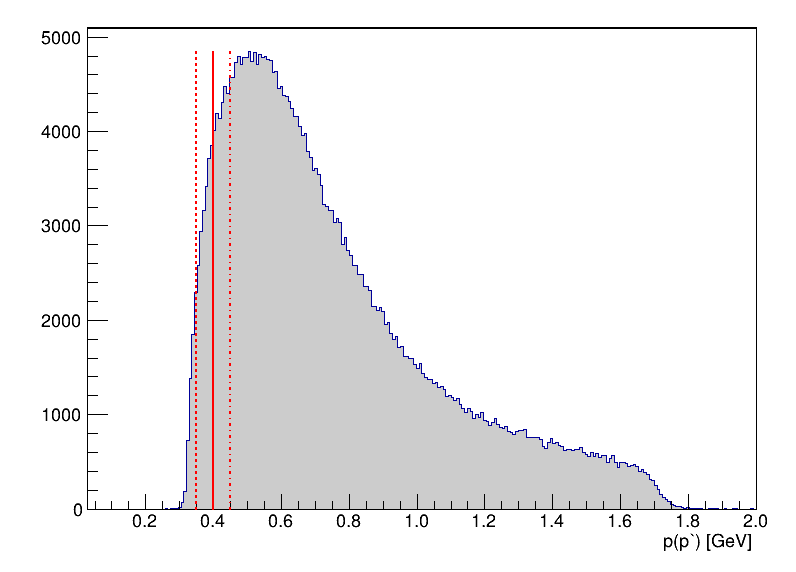

In [84]:
c.Clear()

var_cut = 'pp'
sys_hist_dict_pipkmks[var_cut].Draw()
c.Update()
nominal, loose, tight = 0.4, 0.35, 0.45
line_nominal = ROOT.TLine(nominal, ROOT.gPad.GetUymin(), nominal, sys_hist_dict_pipkmks[var_cut].GetMaximum())
line_nominal.SetLineColor(ROOT.kRed)
line_nominal.SetLineWidth(2)
line_loose = ROOT.TLine(loose, ROOT.gPad.GetUymin(), loose, sys_hist_dict_pipkmks[var_cut].GetMaximum())
line_loose.SetLineStyle(2)
line_loose.SetLineColor(ROOT.kRed)
line_loose.SetLineWidth(2)
line_tight = ROOT.TLine(tight, ROOT.gPad.GetUymin(), tight, sys_hist_dict_pipkmks[var_cut].GetMaximum())
line_tight.SetLineStyle(4)
line_tight.SetLineColor(ROOT.kRed)
line_tight.SetLineWidth(2)
line_nominal.Draw()
line_loose.Draw()
line_tight.Draw()

c.Draw()

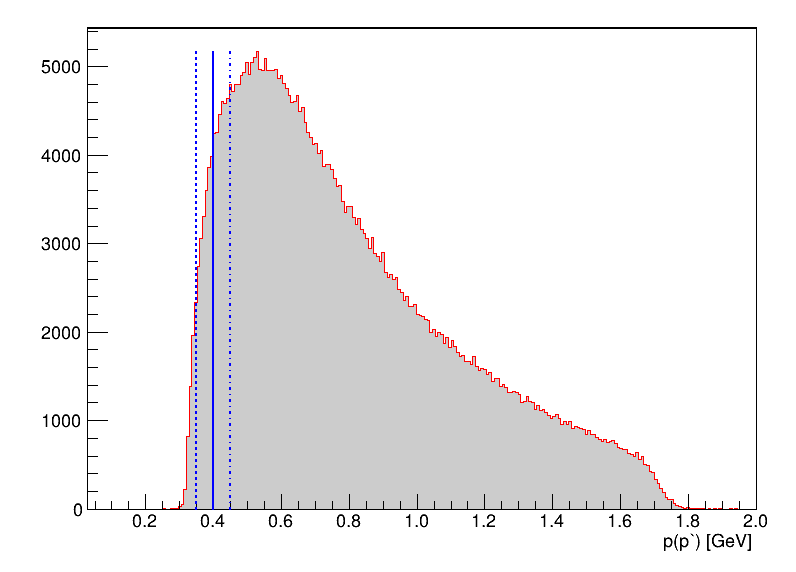

In [85]:
c.Clear()

var_cut = 'pp'
sys_hist_dict_pimkpks[var_cut].Draw()
c.Update()
nominal, loose, tight = 0.4, 0.35, 0.45
line_nominal = ROOT.TLine(nominal, ROOT.gPad.GetUymin(), nominal, sys_hist_dict_pimkpks[var_cut].GetMaximum())
line_nominal.SetLineColor(ROOT.kBlue)
line_nominal.SetLineWidth(2)
line_loose = ROOT.TLine(loose, ROOT.gPad.GetUymin(), loose, sys_hist_dict_pimkpks[var_cut].GetMaximum())
line_loose.SetLineStyle(2)
line_loose.SetLineColor(ROOT.kBlue)
line_loose.SetLineWidth(2)
line_tight = ROOT.TLine(tight, ROOT.gPad.GetUymin(), tight, sys_hist_dict_pimkpks[var_cut].GetMaximum())
line_tight.SetLineStyle(4)
line_tight.SetLineColor(ROOT.kBlue)
line_tight.SetLineWidth(2)
line_nominal.Draw()
line_loose.Draw()
line_tight.Draw()

c.Draw()

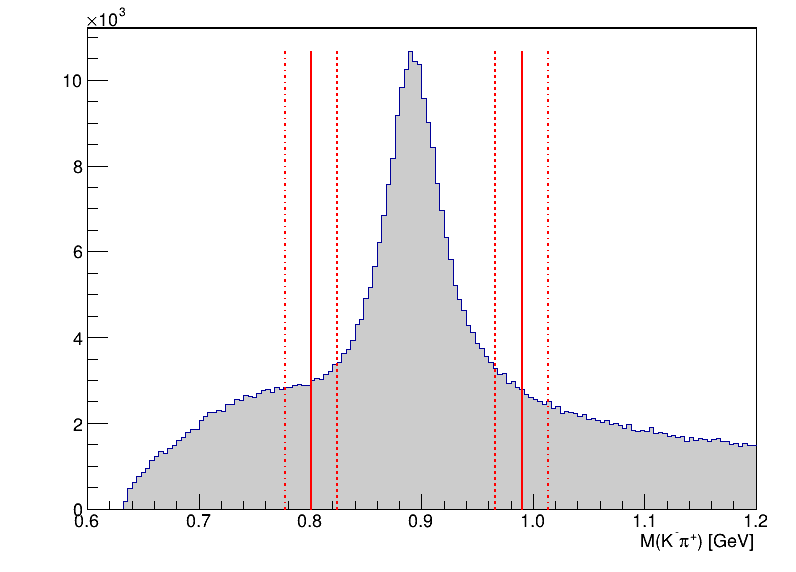

In [86]:
c.Clear()

var_cut = 'neutral_kstar'
# sys_hist_dict_pipkmks[var_cut].GetXaxis().SetRangeUser(0.45, 0.55)
sys_hist_dict_pipkmks[var_cut].Draw()
c.Update()
nominal, loose, tight = cuts.NEUTRAL_KSTAR_MASS + 2*cuts.NEUTRAL_KSTAR_WIDTH, cuts.NEUTRAL_KSTAR_MASS + 1.5*cuts.NEUTRAL_KSTAR_WIDTH, cuts.NEUTRAL_KSTAR_MASS + 2.5*cuts.NEUTRAL_KSTAR_WIDTH
nominal_left, loose_left, tight_left = cuts.NEUTRAL_KSTAR_MASS - 2*cuts.NEUTRAL_KSTAR_WIDTH, cuts.NEUTRAL_KSTAR_MASS - 1.5*cuts.NEUTRAL_KSTAR_WIDTH, cuts.NEUTRAL_KSTAR_MASS - 2.5*cuts.NEUTRAL_KSTAR_WIDTH
line_nominal = ROOT.TLine(nominal, ROOT.gPad.GetUymin(), nominal, sys_hist_dict_pipkmks[var_cut].GetMaximum())
line_nominal.SetLineColor(ROOT.kRed)
line_nominal.SetLineWidth(2)
line_nominal_left = ROOT.TLine(nominal_left, ROOT.gPad.GetUymin(), nominal_left, sys_hist_dict_pipkmks[var_cut].GetMaximum())
line_nominal_left.SetLineColor(ROOT.kRed)
line_nominal_left.SetLineWidth(2)
line_loose = ROOT.TLine(loose, ROOT.gPad.GetUymin(), loose, sys_hist_dict_pipkmks[var_cut].GetMaximum())
line_loose.SetLineStyle(2)
line_loose.SetLineColor(ROOT.kRed)
line_loose.SetLineWidth(2)
line_loose_left = ROOT.TLine(loose_left, ROOT.gPad.GetUymin(), loose_left, sys_hist_dict_pipkmks[var_cut].GetMaximum())
line_loose_left.SetLineStyle(2)
line_loose_left.SetLineColor(ROOT.kRed)
line_loose_left.SetLineWidth(2)
line_tight = ROOT.TLine(tight, ROOT.gPad.GetUymin(), tight, sys_hist_dict_pipkmks[var_cut].GetMaximum())
line_tight.SetLineStyle(4)
line_tight.SetLineColor(ROOT.kRed)
line_tight.SetLineWidth(2)
line_tight_left = ROOT.TLine(tight_left, ROOT.gPad.GetUymin(), tight_left, sys_hist_dict_pipkmks[var_cut].GetMaximum())
line_tight_left.SetLineStyle(4)
line_tight_left.SetLineColor(ROOT.kRed)
line_tight_left.SetLineWidth(2)
line_nominal.Draw()
line_nominal_left.Draw()
line_loose.Draw()
line_loose_left.Draw()
line_tight.Draw()
line_tight_left.Draw()
c.Update()
c.Draw()

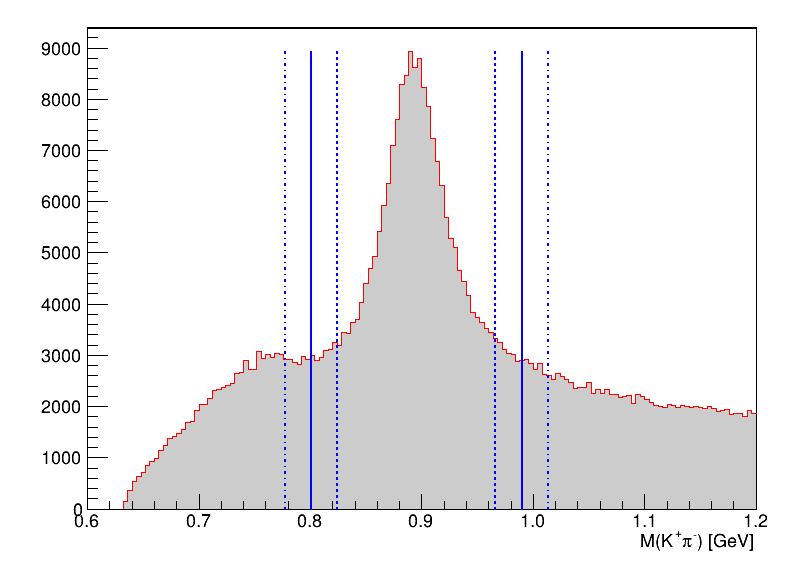

In [87]:
c.Clear()

var_cut = 'neutral_kstar'
# sys_hist_dict_pimkpks[var_cut].GetXaxis().SetRangeUser(0.45, 0.55)
sys_hist_dict_pimkpks[var_cut].Draw()
c.Update()
nominal, loose, tight = cuts.NEUTRAL_KSTAR_MASS + 2*cuts.NEUTRAL_KSTAR_WIDTH, cuts.NEUTRAL_KSTAR_MASS + 1.5*cuts.NEUTRAL_KSTAR_WIDTH, cuts.NEUTRAL_KSTAR_MASS + 2.5*cuts.NEUTRAL_KSTAR_WIDTH
nominal_left, loose_left, tight_left = cuts.NEUTRAL_KSTAR_MASS - 2*cuts.NEUTRAL_KSTAR_WIDTH, cuts.NEUTRAL_KSTAR_MASS - 1.5*cuts.NEUTRAL_KSTAR_WIDTH, cuts.NEUTRAL_KSTAR_MASS - 2.5*cuts.NEUTRAL_KSTAR_WIDTH
line_nominal = ROOT.TLine(nominal, ROOT.gPad.GetUymin(), nominal, sys_hist_dict_pimkpks[var_cut].GetMaximum())
line_nominal.SetLineColor(ROOT.kBlue)
line_nominal.SetLineWidth(2)
line_nominal_left = ROOT.TLine(nominal_left, ROOT.gPad.GetUymin(), nominal_left, sys_hist_dict_pimkpks[var_cut].GetMaximum())
line_nominal_left.SetLineColor(ROOT.kBlue)
line_nominal_left.SetLineWidth(2)
line_loose = ROOT.TLine(loose, ROOT.gPad.GetUymin(), loose, sys_hist_dict_pimkpks[var_cut].GetMaximum())
line_loose.SetLineStyle(2)
line_loose.SetLineColor(ROOT.kBlue)
line_loose.SetLineWidth(2)
line_loose_left = ROOT.TLine(loose_left, ROOT.gPad.GetUymin(), loose_left, sys_hist_dict_pimkpks[var_cut].GetMaximum())
line_loose_left.SetLineStyle(2)
line_loose_left.SetLineColor(ROOT.kBlue)
line_loose_left.SetLineWidth(2)
line_tight = ROOT.TLine(tight, ROOT.gPad.GetUymin(), tight, sys_hist_dict_pimkpks[var_cut].GetMaximum())
line_tight.SetLineStyle(4)
line_tight.SetLineColor(ROOT.kBlue)
line_tight.SetLineWidth(2)
line_tight_left = ROOT.TLine(tight_left, ROOT.gPad.GetUymin(), tight_left, sys_hist_dict_pimkpks[var_cut].GetMaximum())
line_tight_left.SetLineStyle(4)
line_tight_left.SetLineColor(ROOT.kBlue)
line_tight_left.SetLineWidth(2)
line_nominal.Draw()
line_nominal_left.Draw()
line_loose.Draw()
line_loose_left.Draw()
line_tight.Draw()
line_tight_left.Draw()
c.Update()
c.Draw()

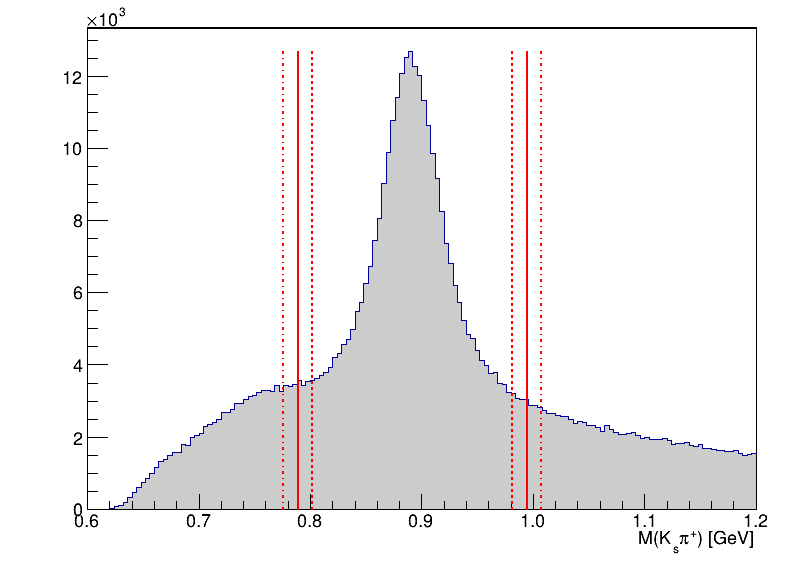

In [88]:
c.Clear()

var_cut = 'charged_kstar'
# sys_hist_dict_pipkmks[var_cut].GetXaxis().SetRangeUser(0.45, 0.55)
sys_hist_dict_pipkmks[var_cut].Draw()
c.Update()
nominal, loose, tight = cuts.CHARGED_KSTAR_MASS + 2*cuts.CHARGED_KSTAR_WIDTH, cuts.CHARGED_KSTAR_MASS + 1.75*cuts.CHARGED_KSTAR_WIDTH, cuts.CHARGED_KSTAR_MASS + 2.25*cuts.CHARGED_KSTAR_WIDTH
nominal_left, loose_left, tight_left = cuts.CHARGED_KSTAR_MASS - 2*cuts.CHARGED_KSTAR_WIDTH, cuts.CHARGED_KSTAR_MASS - 1.75*cuts.CHARGED_KSTAR_WIDTH, cuts.CHARGED_KSTAR_MASS - 2.25*cuts.CHARGED_KSTAR_WIDTH
line_nominal = ROOT.TLine(nominal, ROOT.gPad.GetUymin(), nominal, sys_hist_dict_pipkmks[var_cut].GetMaximum())
line_nominal.SetLineColor(ROOT.kRed)
line_nominal.SetLineWidth(2)
line_nominal_left = ROOT.TLine(nominal_left, ROOT.gPad.GetUymin(), nominal_left, sys_hist_dict_pipkmks[var_cut].GetMaximum())
line_nominal_left.SetLineColor(ROOT.kRed)
line_nominal_left.SetLineWidth(2)
line_loose = ROOT.TLine(loose, ROOT.gPad.GetUymin(), loose, sys_hist_dict_pipkmks[var_cut].GetMaximum())
line_loose.SetLineStyle(2)
line_loose.SetLineColor(ROOT.kRed)
line_loose.SetLineWidth(2)
line_loose_left = ROOT.TLine(loose_left, ROOT.gPad.GetUymin(), loose_left, sys_hist_dict_pipkmks[var_cut].GetMaximum())
line_loose_left.SetLineStyle(2)
line_loose_left.SetLineColor(ROOT.kRed)
line_loose_left.SetLineWidth(2)
line_tight = ROOT.TLine(tight, ROOT.gPad.GetUymin(), tight, sys_hist_dict_pipkmks[var_cut].GetMaximum())
line_tight.SetLineStyle(4)
line_tight.SetLineColor(ROOT.kRed)
line_tight.SetLineWidth(2)
line_tight_left = ROOT.TLine(tight_left, ROOT.gPad.GetUymin(), tight_left, sys_hist_dict_pipkmks[var_cut].GetMaximum())
line_tight_left.SetLineStyle(4)
line_tight_left.SetLineColor(ROOT.kRed)
line_tight_left.SetLineWidth(2)
line_nominal.Draw()
line_nominal_left.Draw()
line_loose.Draw()
line_loose_left.Draw()
line_tight.Draw()
line_tight_left.Draw()
c.Update()
c.Draw()

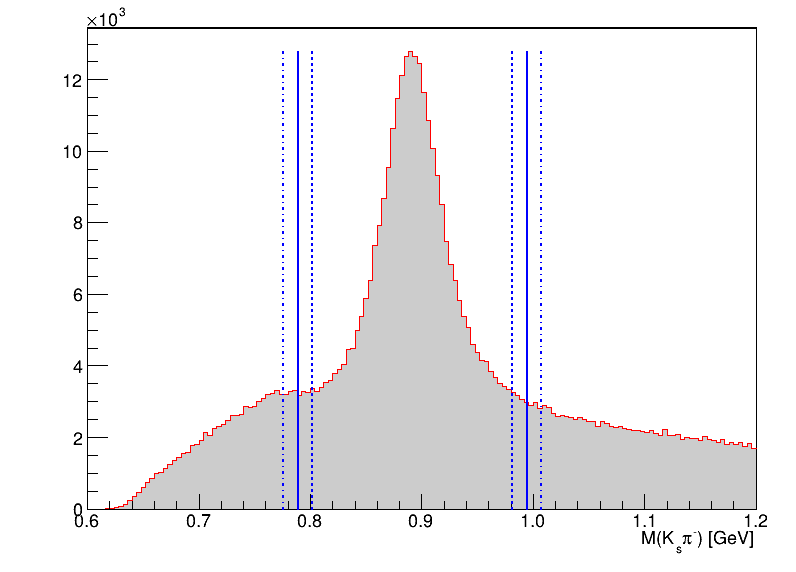

In [89]:
c.Clear()

var_cut = 'charged_kstar'
# sys_hist_dict_pimkpks[var_cut].GetXaxis().SetRangeUser(0.45, 0.55)
sys_hist_dict_pimkpks[var_cut].Draw()
c.Update()
nominal, loose, tight = cuts.CHARGED_KSTAR_MASS + 2*cuts.CHARGED_KSTAR_WIDTH, cuts.CHARGED_KSTAR_MASS + 1.75*cuts.CHARGED_KSTAR_WIDTH, cuts.CHARGED_KSTAR_MASS + 2.25*cuts.CHARGED_KSTAR_WIDTH
nominal_left, loose_left, tight_left = cuts.CHARGED_KSTAR_MASS - 2*cuts.CHARGED_KSTAR_WIDTH, cuts.CHARGED_KSTAR_MASS - 1.75*cuts.CHARGED_KSTAR_WIDTH, cuts.CHARGED_KSTAR_MASS - 2.25*cuts.CHARGED_KSTAR_WIDTH
line_nominal = ROOT.TLine(nominal, ROOT.gPad.GetUymin(), nominal, sys_hist_dict_pimkpks[var_cut].GetMaximum())
line_nominal.SetLineColor(ROOT.kBlue)
line_nominal.SetLineWidth(2)
line_nominal_left = ROOT.TLine(nominal_left, ROOT.gPad.GetUymin(), nominal_left, sys_hist_dict_pimkpks[var_cut].GetMaximum())
line_nominal_left.SetLineColor(ROOT.kBlue)
line_nominal_left.SetLineWidth(2)
line_loose = ROOT.TLine(loose, ROOT.gPad.GetUymin(), loose, sys_hist_dict_pimkpks[var_cut].GetMaximum())
line_loose.SetLineStyle(2)
line_loose.SetLineColor(ROOT.kBlue)
line_loose.SetLineWidth(2)
line_loose_left = ROOT.TLine(loose_left, ROOT.gPad.GetUymin(), loose_left, sys_hist_dict_pimkpks[var_cut].GetMaximum())
line_loose_left.SetLineStyle(2)
line_loose_left.SetLineColor(ROOT.kBlue)
line_loose_left.SetLineWidth(2)
line_tight = ROOT.TLine(tight, ROOT.gPad.GetUymin(), tight, sys_hist_dict_pimkpks[var_cut].GetMaximum())
line_tight.SetLineStyle(4)
line_tight.SetLineColor(ROOT.kBlue)
line_tight.SetLineWidth(2)
line_tight_left = ROOT.TLine(tight_left, ROOT.gPad.GetUymin(), tight_left, sys_hist_dict_pimkpks[var_cut].GetMaximum())
line_tight_left.SetLineStyle(4)
line_tight_left.SetLineColor(ROOT.kBlue)
line_tight_left.SetLineWidth(2)
line_nominal.Draw()
line_nominal_left.Draw()
line_loose.Draw()
line_loose_left.Draw()
line_tight.Draw()
line_tight_left.Draw()
c.Update()
c.Draw()

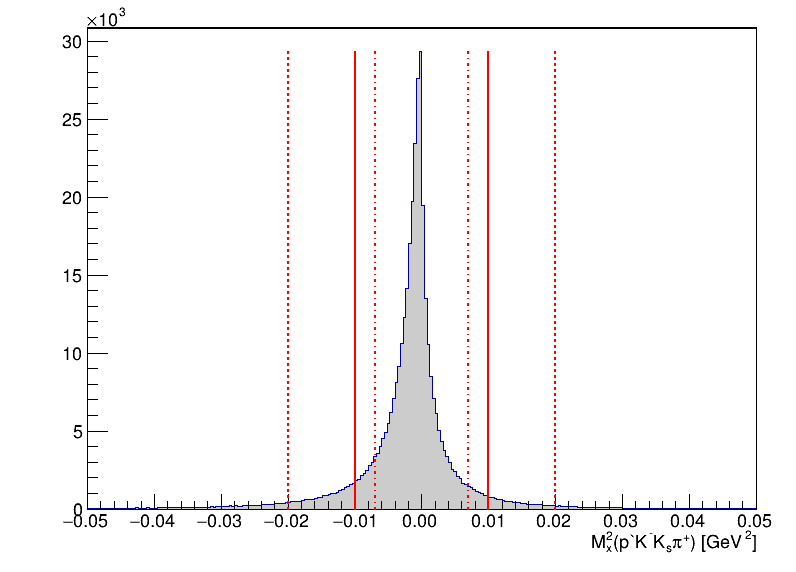

In [90]:
c.Clear()

var_cut = 'mx2_all'
# sys_hist_dict_pipkmks[var_cut].GetXaxis().SetRangeUser(0.45, 0.55)
sys_hist_dict_pipkmks[var_cut].Draw()
c.Update()
nominal, loose, tight = 0.01, 0.02, 0.007
nominal_left, loose_left, tight_left = -0.01, -0.02, -0.007
line_nominal = ROOT.TLine(nominal, ROOT.gPad.GetUymin(), nominal, sys_hist_dict_pipkmks[var_cut].GetMaximum())
line_nominal.SetLineColor(ROOT.kRed)
line_nominal.SetLineWidth(2)
line_nominal_left = ROOT.TLine(nominal_left, ROOT.gPad.GetUymin(), nominal_left, sys_hist_dict_pipkmks[var_cut].GetMaximum())
line_nominal_left.SetLineColor(ROOT.kRed)
line_nominal_left.SetLineWidth(2)
line_loose = ROOT.TLine(loose, ROOT.gPad.GetUymin(), loose, sys_hist_dict_pipkmks[var_cut].GetMaximum())
line_loose.SetLineStyle(2)
line_loose.SetLineColor(ROOT.kRed)
line_loose.SetLineWidth(2)
line_loose_left = ROOT.TLine(loose_left, ROOT.gPad.GetUymin(), loose_left, sys_hist_dict_pipkmks[var_cut].GetMaximum())
line_loose_left.SetLineStyle(2)
line_loose_left.SetLineColor(ROOT.kRed)
line_loose_left.SetLineWidth(2)
line_tight = ROOT.TLine(tight, ROOT.gPad.GetUymin(), tight, sys_hist_dict_pipkmks[var_cut].GetMaximum())
line_tight.SetLineStyle(4)
line_tight.SetLineColor(ROOT.kRed)
line_tight.SetLineWidth(2)
line_tight_left = ROOT.TLine(tight_left, ROOT.gPad.GetUymin(), tight_left, sys_hist_dict_pipkmks[var_cut].GetMaximum())
line_tight_left.SetLineStyle(4)
line_tight_left.SetLineColor(ROOT.kRed)
line_tight_left.SetLineWidth(2)
line_nominal.Draw()
line_nominal_left.Draw()
line_loose.Draw()
line_loose_left.Draw()
line_tight.Draw()
line_tight_left.Draw()
c.Update()
c.Draw()

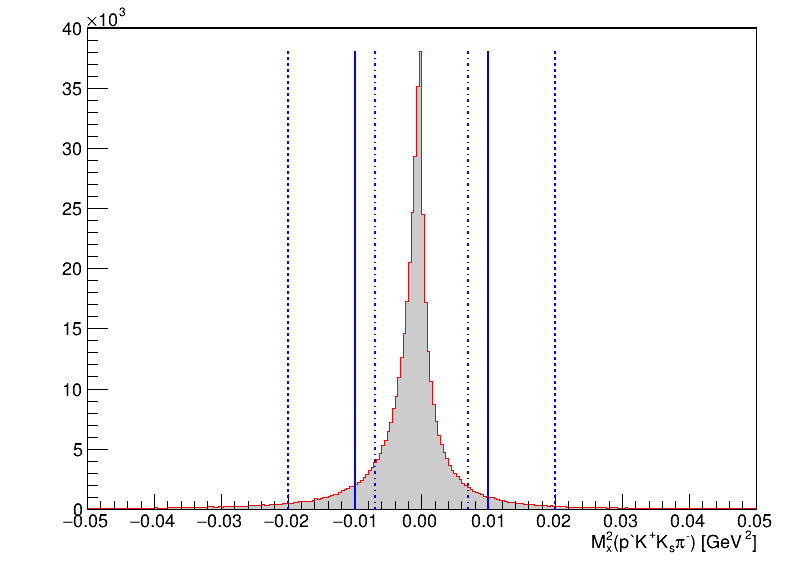

In [91]:
c.Clear()

var_cut = 'mx2_all'
# sys_hist_dict_pimkpks[var_cut].GetXaxis().SetRangeUser(0.45, 0.55)
sys_hist_dict_pimkpks[var_cut].Draw()
c.Update()
nominal, loose, tight = 0.01, 0.02, 0.007
nominal_left, loose_left, tight_left = -0.01, -0.02, -0.007
line_nominal = ROOT.TLine(nominal, ROOT.gPad.GetUymin(), nominal, sys_hist_dict_pimkpks[var_cut].GetMaximum())
line_nominal.SetLineColor(ROOT.kBlue)
line_nominal.SetLineWidth(2)
line_nominal_left = ROOT.TLine(nominal_left, ROOT.gPad.GetUymin(), nominal_left, sys_hist_dict_pimkpks[var_cut].GetMaximum())
line_nominal_left.SetLineColor(ROOT.kBlue)
line_nominal_left.SetLineWidth(2)
line_loose = ROOT.TLine(loose, ROOT.gPad.GetUymin(), loose, sys_hist_dict_pimkpks[var_cut].GetMaximum())
line_loose.SetLineStyle(2)
line_loose.SetLineColor(ROOT.kBlue)
line_loose.SetLineWidth(2)
line_loose_left = ROOT.TLine(loose_left, ROOT.gPad.GetUymin(), loose_left, sys_hist_dict_pimkpks[var_cut].GetMaximum())
line_loose_left.SetLineStyle(2)
line_loose_left.SetLineColor(ROOT.kBlue)
line_loose_left.SetLineWidth(2)
line_tight = ROOT.TLine(tight, ROOT.gPad.GetUymin(), tight, sys_hist_dict_pimkpks[var_cut].GetMaximum())
line_tight.SetLineStyle(4)
line_tight.SetLineColor(ROOT.kBlue)
line_tight.SetLineWidth(2)
line_tight_left = ROOT.TLine(tight_left, ROOT.gPad.GetUymin(), tight_left, sys_hist_dict_pimkpks[var_cut].GetMaximum())
line_tight_left.SetLineStyle(4)
line_tight_left.SetLineColor(ROOT.kBlue)
line_tight_left.SetLineWidth(2)
line_nominal.Draw()
line_nominal_left.Draw()
line_loose.Draw()
line_loose_left.Draw()
line_tight.Draw()
line_tight_left.Draw()
c.Update()
c.Draw()